### Librerias


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator
import seaborn as sns

import statsmodels.api as sm

import yfinance as yf

from pypfopt import EfficientFrontier, expected_returns
from pypfopt import risk_models
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt.risk_models import CovarianceShrinkage

import riskfolio as rp

import quantstats as qs

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Funciones


###### Originales

In [3]:
"""
# Función para calcular el portafolio con máximo Sharpe (devuelve valores ponderados)
def calculate_max_sharpe(prices, risk_free=0.05, save_weights=False):
    prices = prices.dropna()    
    mu = expected_returns.mean_historical_return(prices)
    S = risk_models.sample_cov(prices)
    ef = EfficientFrontier(mu, S)
    ef.max_sharpe(risk_free_rate=risk_free)
    weights = ef.clean_weights()
    if save_weights:
        return weights
    # Multiplica precios históricos por los pesos para obtener valores ponderados
    return prices.mul(weights, axis=1).sum(axis=1)

# Función para calcular el portafolio de mínima volatilidad
def calculate_min_volatility(prices, save_weights=False):
    prices = prices.dropna()    
    mu = expected_returns.mean_historical_return(prices)
    S = risk_models.sample_cov(prices)
    ef = EfficientFrontier(mu, S)
    ef.min_volatility()
    weights = ef.clean_weights()
    if save_weights:
        return weights
    # Multiplica precios históricos por los pesos para obtener valores ponderados
    return prices.mul(weights, axis=1).sum(axis=1)


# Función para calcular el portafolio de máximo rendimiento esperado
def calculate_max_return(prices, save_weights=False):
    prices = prices.dropna()    
    mu = expected_returns.mean_historical_return(prices)
    S = risk_models.sample_cov(prices)
    ef = EfficientFrontier(mu, S)
    ef.max_quadratic_utility()
    weights = ef.clean_weights()
    if save_weights:
        return weights
    # Multiplica precios históricos por los pesos para obtener valores ponderados
    return prices.mul(weights, axis=1).sum(axis=1)

# Funcion para calcular un portafolio de pesos iguales con pyportfolioopt
def calculate_equal_weights(prices, save_weights=False):
    prices = prices.dropna()
    num_assets = len(prices.columns)
    # Calcular pesos iguales
    weight = 1.0 / num_assets
    weights = {asset: weight for asset in prices.columns}
    if save_weights:
        return weights
    return prices.mul(weights, axis=1).sum(axis=1)


# Funcion para calculrar portafolio con un riesgo fijo usando pyportfolioopt
def calculate_risk_limit(prices, risk_limit=0.02, save_weights=False):
    prices = prices.dropna()    
    mu = expected_returns.mean_historical_return(prices)
    S = risk_models.sample_cov(prices)
    ef = EfficientFrontier(mu, S)
    ef.efficient_risk(risk_limit)
    weights = ef.clean_weights()
    if save_weights:
        return weights
    # Multiplica precios históricos por los pesos para obtener valores ponderados
    return prices.mul(weights, axis=1).sum(axis=1)
"""

'\n# Función para calcular el portafolio con máximo Sharpe (devuelve valores ponderados)\ndef calculate_max_sharpe(prices, risk_free=0.05, save_weights=False):\n    prices = prices.dropna()    \n    mu = expected_returns.mean_historical_return(prices)\n    S = risk_models.sample_cov(prices)\n    ef = EfficientFrontier(mu, S)\n    ef.max_sharpe(risk_free_rate=risk_free)\n    weights = ef.clean_weights()\n    if save_weights:\n        return weights\n    # Multiplica precios históricos por los pesos para obtener valores ponderados\n    return prices.mul(weights, axis=1).sum(axis=1)\n\n# Función para calcular el portafolio de mínima volatilidad\ndef calculate_min_volatility(prices, save_weights=False):\n    prices = prices.dropna()    \n    mu = expected_returns.mean_historical_return(prices)\n    S = risk_models.sample_cov(prices)\n    ef = EfficientFrontier(mu, S)\n    ef.min_volatility()\n    weights = ef.clean_weights()\n    if save_weights:\n        return weights\n    # Multiplica p

In [4]:
"""
def calculate_max_sharpe(prices, risk_free=0.05, save_weights=False, index_calcs=False):
    prices = prices.dropna()
    mu = expected_returns.mean_historical_return(prices)
    S = risk_models.sample_cov(prices)
    ef = EfficientFrontier(mu, S)
    ef.max_sharpe(risk_free_rate=risk_free)
    weights = ef.clean_weights()
    returns = prices.pct_change().dropna()
    portfolio_returns = returns.dot(pd.Series(weights))
    if index_calcs:
        metrics = calculate_metrics(portfolio_returns, prices.index, risk_free)
        return metrics
    
    if save_weights:
        return weights

    return portfolio_returns

def calculate_min_volatility(prices, risk_free=0.05, save_weights=False, index_calcs=False):
    prices = prices.dropna()
    mu = expected_returns.mean_historical_return(prices)
    S = risk_models.sample_cov(prices)
    ef = EfficientFrontier(mu, S)
    ef.min_volatility()
    weights = ef.clean_weights()
    returns = prices.pct_change().dropna()
    portfolio_returns = returns.dot(pd.Series(weights))
    if index_calcs:
        metrics = calculate_metrics(portfolio_returns, prices.index, risk_free)
        return metrics
    
    if save_weights:
        return weights

    return portfolio_returns

def calculate_max_return(prices, risk_free=0.05, save_weights=False, index_calcs=False):
    prices = prices.dropna()
    mu = expected_returns.mean_historical_return(prices)
    S = risk_models.sample_cov(prices)
    ef = EfficientFrontier(mu, S)
    ef.max_quadratic_utility()
    weights = ef.clean_weights()
    returns = prices.pct_change().dropna()
    portfolio_returns = returns.dot(pd.Series(weights))
    if index_calcs:
        metrics = calculate_metrics(portfolio_returns, prices.index, risk_free)
        return metrics
    
    if save_weights:
        return weights

    return portfolio_returns

def calculate_equal_weights(prices, risk_free=0.05, save_weights=False, index_calcs=False):
    prices = prices.dropna()
    num_assets = len(prices.columns)
    weights = {asset: 1.0 / num_assets for asset in prices.columns}
    returns = prices.pct_change().dropna()
    portfolio_returns = returns.dot(pd.Series(weights))
    if index_calcs:
        metrics = calculate_metrics(portfolio_returns, prices.index, risk_free)
        return metrics
    
    if save_weights:
        return weights

    return portfolio_returns

def calculate_risk_limit(prices, risk_free=0.05, risk_limit=0.20, save_weights=False, index_calcs=False):
    prices = prices.dropna()
    mu = expected_returns.mean_historical_return(prices)
    S = risk_models.sample_cov(prices)
    ef = EfficientFrontier(mu, S)
    ef.efficient_risk(risk_limit)
    weights = ef.clean_weights()
    returns = prices.pct_change().dropna()
    portfolio_returns = returns.dot(pd.Series(weights))
    if index_calcs:
        metrics = calculate_metrics(portfolio_returns, prices.index, risk_free)
        return metrics
    if save_weights:
        return weights

    return portfolio_returns
"""

"""
# Función para calcular y obtener métricas de portafolios específicos
def calcular_portafolios_especificos(returns, risk_free=0.05, risk_limit=0.20):
    mu = expected_returns.mean_historical_return(returns)
    S = risk_models.sample_cov(returns)
    ef = EfficientFrontier(mu, S)

    # Portafolio de máximo Sharpe
    ef.max_sharpe(risk_free_rate=risk_free)
    weights_sharpe = ef.clean_weights()
    performance_sharpe = ef.portfolio_performance(risk_free_rate=risk_free)

    # Portafolio de mínima volatilidad
    ef_min_vol = EfficientFrontier(mu, S)
    ef_min_vol.min_volatility()
    weights_min_vol = ef_min_vol.clean_weights()
    performance_min_vol = ef_min_vol.portfolio_performance()

    # Portafolio de pesos iguales
    n_assets = len(mu)
    weights_equal = np.array([1/n_assets] * n_assets)
    ret_equal = np.dot(weights_equal, mu)
    vol_equal = np.sqrt(np.dot(weights_equal.T, np.dot(S, weights_equal)))
    sharpe_equal = (ret_equal - risk_free) / vol_equal
    performance_equal = (ret_equal, vol_equal, sharpe_equal)
    
    # Portafolio de máxima utilidad cuadrática
    ef_max_utility = EfficientFrontier(mu, S)
    ef_max_utility.max_quadratic_utility()
    weights_max_utility = ef_max_utility.clean_weights()
    performance_max_utility = ef_max_utility.portfolio_performance()

    # Portafolio de riesgo fijo
    ef_risk_limit = EfficientFrontier(mu, S)
    ef_risk_limit.efficient_risk(risk_limit)
    weights_risk_limit = ef_risk_limit.clean_weights()
    performance_risk_limit = ef_risk_limit.portfolio_performance()
    
    # Métricas de los activos individuales
    performance_activos = []
    for i, asset in enumerate(returns.columns):
        weights_asset = np.zeros(n_assets)
        weights_asset[i] = 1
        ret_asset = np.dot(weights_asset, mu)
        vol_asset = np.sqrt(np.dot(weights_asset.T, np.dot(S, weights_asset)))
        sharpe_asset = (ret_asset - risk_free) / vol_asset
        performance_activos.append((asset, ret_asset, vol_asset, sharpe_asset))

    return {
        "sharpe": {"weights": weights_sharpe, "performance": performance_sharpe},
        "min_vol": {"weights": weights_min_vol, "performance": performance_min_vol},
        "equal": {"weights": weights_equal, "performance": performance_equal},
        "max_utility": {"weights": weights_max_utility, "performance": performance_max_utility},
        "risk_limit": {"weights": weights_risk_limit, "performance": performance_risk_limit},
        "activos": performance_activos
    }

    # Función para calcular las métricas de los portafolios generados aleatoriamente
def calcular_metricas_aleatorias(portfolios, mu, S, risk_free=0.05):
    expected_returns_all = portfolios.dot(mu)
    portfolio_volatility = np.sqrt(np.diag(portfolios.dot(S).dot(portfolios.T)))
    sharpe_ratios = (expected_returns_all - risk_free) / portfolio_volatility
    return expected_returns_all, portfolio_volatility, sharpe_ratios
"""

'\n# Función para calcular y obtener métricas de portafolios específicos\ndef calcular_portafolios_especificos(returns, risk_free=0.05, risk_limit=0.20):\n    mu = expected_returns.mean_historical_return(returns)\n    S = risk_models.sample_cov(returns)\n    ef = EfficientFrontier(mu, S)\n\n    # Portafolio de máximo Sharpe\n    ef.max_sharpe(risk_free_rate=risk_free)\n    weights_sharpe = ef.clean_weights()\n    performance_sharpe = ef.portfolio_performance(risk_free_rate=risk_free)\n\n    # Portafolio de mínima volatilidad\n    ef_min_vol = EfficientFrontier(mu, S)\n    ef_min_vol.min_volatility()\n    weights_min_vol = ef_min_vol.clean_weights()\n    performance_min_vol = ef_min_vol.portfolio_performance()\n\n    # Portafolio de pesos iguales\n    n_assets = len(mu)\n    weights_equal = np.array([1/n_assets] * n_assets)\n    ret_equal = np.dot(weights_equal, mu)\n    vol_equal = np.sqrt(np.dot(weights_equal.T, np.dot(S, weights_equal)))\n    sharpe_equal = (ret_equal - risk_free) / 

#### Portafolios y metricas

##### PyPortfolioOpt

In [177]:
def calculate_max_sharpe(data, risk_free=0.05, min_weight=0, save_weights=False, index_calcs=False):
    data = data.dropna()
    
    mu = expected_returns.mean_historical_return(data, returns_data=True)
    S = risk_models.sample_cov(data, returns_data=True)
    ef = EfficientFrontier(mu, S)
    if min_weight > 0:
        ef.add_constraint(lambda w: w >= min_weight)
    
    ef.max_sharpe(risk_free_rate=risk_free)
    weights = ef.clean_weights()
    
    returns = data
    portfolio_returns = returns.dot(pd.Series(weights))
    
    if index_calcs:
        metrics = calculate_metrics(portfolio_returns, returns.index, risk_free)
        return metrics
    
    exp_ret = ef.portfolio_performance()[0]
    risk = ef.portfolio_performance()[1]
    

    return portfolio_returns, weights, exp_ret, risk

def calculate_min_volatility(returns, risk_free=0.05, min_weight=0, save_weights=False, index_calcs=False):
    returns = returns.dropna()

    mu = expected_returns.mean_historical_return(returns, returns_data=True)
    S = risk_models.sample_cov(returns, returns_data=True)
    ef = EfficientFrontier(mu, S)
    
    if min_weight > 0:
        ef.add_constraint(lambda w: w >= min_weight)

    ef.min_volatility()
    weights = ef.clean_weights()
    portfolio_returns = returns.dot(pd.Series(weights))
    
    if index_calcs:
        metrics = calculate_metrics(portfolio_returns, returns.index, risk_free)
        return metrics
    
    if save_weights:
        return weights

    return portfolio_returns

def calculate_max_return(returns, risk_free=0.05, min_weight=0, save_weights=False, index_calcs=False):
    returns = returns.dropna()
    
    mu = expected_returns.mean_historical_return(returns, returns_data=True)
    S = risk_models.sample_cov(returns, returns_data=True)
    ef = EfficientFrontier(mu, S)
    if min_weight > 0:
        ef.add_constraint(lambda w: w >= min_weight)
    
    ef.max_quadratic_utility()
    weights = ef.clean_weights()
    portfolio_returns = returns.dot(pd.Series(weights))
    
    if index_calcs:
        metrics = calculate_metrics(portfolio_returns, returns.index, risk_free)
        return metrics
    
    if save_weights:
        return weights

    return portfolio_returns

def calculate_equal_weights(returns, risk_free=0.05, save_weights=False, index_calcs=False, save_exp_ret=False, save_risk=False):
    returns = returns.dropna()
    num_assets = len(returns.columns)
    weights = {asset: 1.0 / num_assets for asset in returns.columns}
    
    portfolio_returns = returns.dot(pd.Series(weights))
    if index_calcs:
        metrics = calculate_metrics(portfolio_returns, returns.index, risk_free)
        return metrics
    
    if save_weights:
        return weights
    
    if save_exp_ret:
        return ef.portfolio_performance()[0]
    
    if save_risk:
        return ef.portfolio_performance()[1]

    return portfolio_returns

def calculate_risk_limit(returns, risk_free=0.05, risk_limit=0.20, min_weight=0, max_weight=1, index_calcs=False):
    
    """
    Calcula el portafolio con un riesgo fijo.
        Valor[0]: Portafolio ponderado
        Valor[1]: Pesos
        Valor[2]: Rendimiento esperado
        Valor[3]: Riesgo
        
    """
    returns = returns.dropna()
    
    mu = expected_returns.mean_historical_return(returns, returns_data=True)
    S = risk_models.sample_cov(returns, returns_data=True)
    ef = EfficientFrontier(mu, S)
    
    # Agregar restricción de peso mínimo
    if min_weight > 0:
        ef.add_constraint(lambda w: w >= min_weight)
    
    # Agregar restricción de peso máximo
    if max_weight < 1:
        ef.add_constraint(lambda w: w <= max_weight)
    
    ef.efficient_risk(risk_limit)
    weights = ef.clean_weights()

    portfolio_returns = returns.dot(pd.Series(weights))
    portfolio_returns = pd.DataFrame(portfolio_returns, columns=["RiskLimit"])
    
    if index_calcs:
        metrics = calculate_metrics(portfolio_returns, returns.index, risk_free)
        return metrics

    exp_ret = ef.portfolio_performance()[0]
    risk = ef.portfolio_performance()[1]
    

    return portfolio_returns, weights, exp_ret, risk


In [162]:
test = calculate_risk_limit(mex_acc_r, risk_free=0, risk_limit=0.2, min_weight=0.5/len(mex_acc_r.columns), max_weight=1, index_calcs=False)

In [165]:
test2 = calculate_risk_limit(mex_acc_btc_r, risk_free=0, risk_limit=0.2, min_weight=0.5/len(mex_acc_r.columns), max_weight=1, index_calcs=False)

In [178]:
test3=calculate_max_sharpe(mex_acc_r, risk_free=0, min_weight=0.5/len(mex_acc_r.columns), save_weights=False, index_calcs=False)

In [181]:
test4=calculate_max_sharpe(mex_acc_btc_r, risk_free=0, min_weight=0.5/len(mex_acc_r.columns), save_weights=False, index_calcs=False)

<Axes: xlabel='Date'>

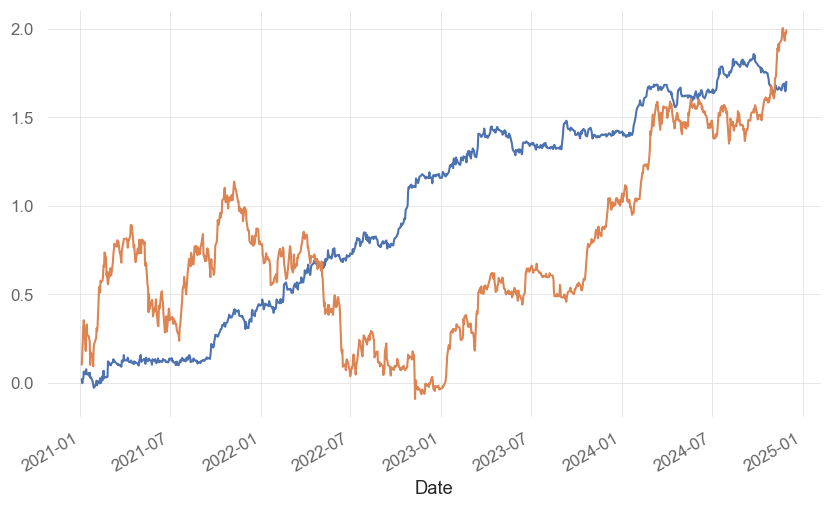

In [186]:
mex_acc_btc_r['CHDRAUIB.MX'].cumsum().plot()
mex_acc_btc_r['BTC'].cumsum().plot()


In [184]:
print(test3[1])
print(test4[1])

OrderedDict({'AC.MX': 0.05226, 'ALFAA.MX': 0.01429, 'ALSEA.MX': 0.01429, 'AMXB.MX': 0.01429, 'ASURB.MX': 0.01429, 'BBAJIOO.MX': 0.01429, 'BIMBOA.MX': 0.01429, 'BOLSAA.MX': 0.01429, 'CEMEXCPO.MX': 0.01429, 'CHDRAUIB.MX': 0.42778, 'CUERVO.MX': 0.01429, 'ELEKTRA.MX': 0.01429, 'FEMSAUBD.MX': 0.01429, 'GAPB.MX': 0.01429, 'GCARSOA1.MX': 0.01429, 'GCC.MX': 0.01429, 'GENTERA.MX': 0.04005, 'GFINBURO.MX': 0.01429, 'GFNORTEO.MX': 0.01429, 'GMEXICOB.MX': 0.01429, 'GRUMAB.MX': 0.01429, 'KIMBERA.MX': 0.01429, 'KOFUBL.MX': 0.03704, 'LABB.MX': 0.01429, 'MEGACPO.MX': 0.01429, 'OMAB.MX': 0.01429, 'ORBIA.MX': 0.01429, 'PE&OLES.MX': 0.01429, 'PINFRA.MX': 0.01429, 'Q.MX': 0.01429, 'RA.MX': 0.01429, 'TLEVISACPO.MX': 0.01429, 'VESTA.MX': 0.01429, 'VOLARA.MX': 0.01429, 'WALMEX.MX': 0.01429})
OrderedDict({'AC.MX': 0.04884, 'ALFAA.MX': 0.01429, 'ALSEA.MX': 0.01429, 'AMXB.MX': 0.01429, 'ASURB.MX': 0.01429, 'BBAJIOO.MX': 0.01429, 'BIMBOA.MX': 0.01429, 'BOLSAA.MX': 0.01429, 'CEMEXCPO.MX': 0.01429, 'CHDRAUIB.MX': 0

<Axes: xlabel='Date'>

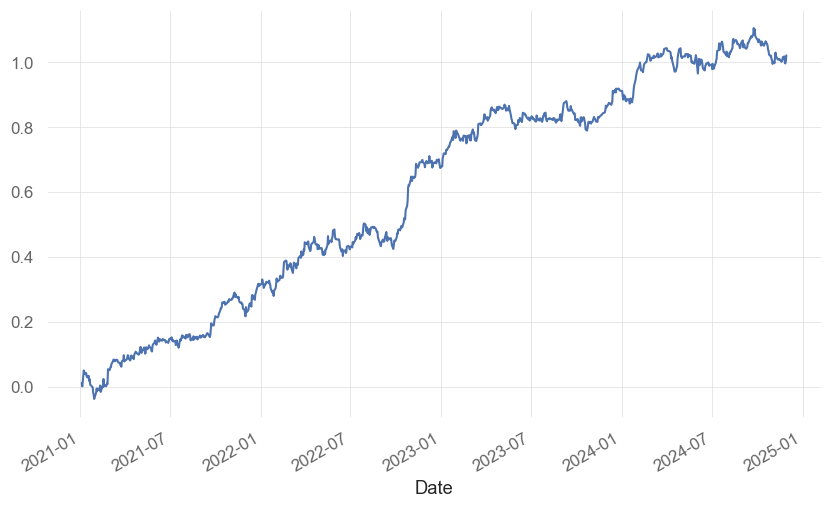

In [180]:
test3[0].cumsum().plot()

<Axes: xlabel='Date'>

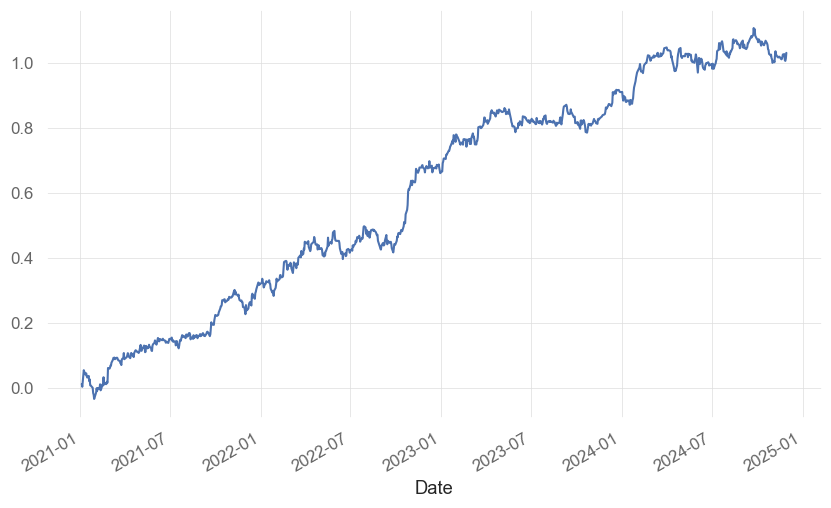

In [182]:
test4[0].cumsum().plot()

<Axes: xlabel='Date'>

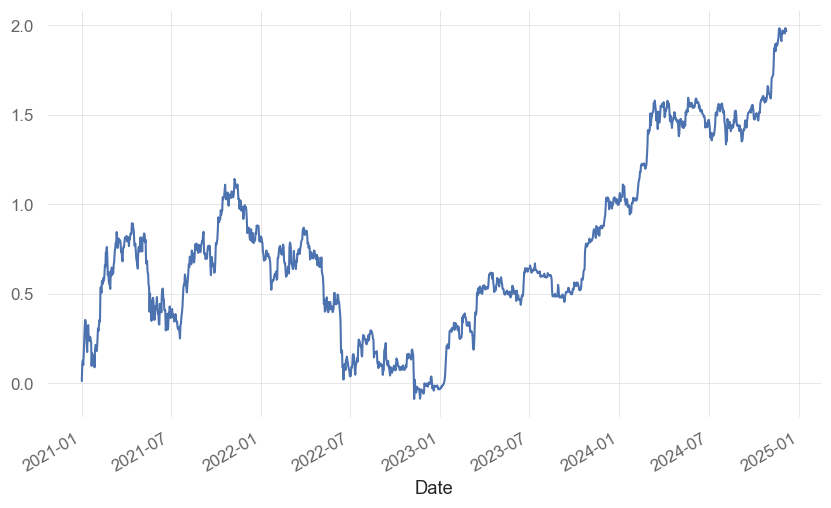

In [176]:
cripto_r['BTC'].cumsum().plot()

<Axes: xlabel='Date'>

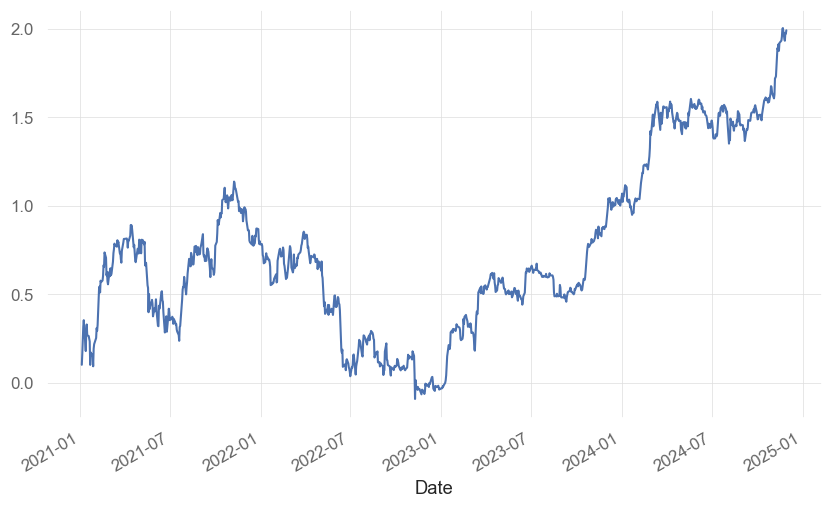

In [173]:
mex_acc_btc_r['BTC'].cumsum().plot()

In [166]:
port_test = test[1]
#port_test.head()
print(port_test)
print(test[2])

OrderedDict({'AC.MX': 0.01429, 'ALFAA.MX': 0.01429, 'ALSEA.MX': 0.01429, 'AMXB.MX': 0.01429, 'ASURB.MX': 0.01429, 'BBAJIOO.MX': 0.01429, 'BIMBOA.MX': 0.01429, 'BOLSAA.MX': 0.01429, 'CEMEXCPO.MX': 0.01429, 'CHDRAUIB.MX': 0.51429, 'CUERVO.MX': 0.01429, 'ELEKTRA.MX': 0.01429, 'FEMSAUBD.MX': 0.01429, 'GAPB.MX': 0.01429, 'GCARSOA1.MX': 0.01429, 'GCC.MX': 0.01429, 'GENTERA.MX': 0.01429, 'GFINBURO.MX': 0.01429, 'GFNORTEO.MX': 0.01429, 'GMEXICOB.MX': 0.01429, 'GRUMAB.MX': 0.01429, 'KIMBERA.MX': 0.01429, 'KOFUBL.MX': 0.01429, 'LABB.MX': 0.01429, 'MEGACPO.MX': 0.01429, 'OMAB.MX': 0.01429, 'ORBIA.MX': 0.01429, 'PE&OLES.MX': 0.01429, 'PINFRA.MX': 0.01429, 'Q.MX': 0.01429, 'RA.MX': 0.01429, 'TLEVISACPO.MX': 0.01429, 'VESTA.MX': 0.01429, 'VOLARA.MX': 0.01429, 'WALMEX.MX': 0.01429})
0.2879440196084372


In [167]:
port_test2 = test2[1]

print(port_test2)
print(test2[2])

OrderedDict({'AC.MX': 0.01429, 'ALFAA.MX': 0.01429, 'ALSEA.MX': 0.01429, 'AMXB.MX': 0.01429, 'ASURB.MX': 0.01429, 'BBAJIOO.MX': 0.01429, 'BIMBOA.MX': 0.01429, 'BOLSAA.MX': 0.01429, 'CEMEXCPO.MX': 0.01429, 'CHDRAUIB.MX': 0.5, 'CUERVO.MX': 0.01429, 'ELEKTRA.MX': 0.01429, 'FEMSAUBD.MX': 0.01429, 'GAPB.MX': 0.01429, 'GCARSOA1.MX': 0.01429, 'GCC.MX': 0.01429, 'GENTERA.MX': 0.01429, 'GFINBURO.MX': 0.01429, 'GFNORTEO.MX': 0.01429, 'GMEXICOB.MX': 0.01429, 'GRUMAB.MX': 0.01429, 'KIMBERA.MX': 0.01429, 'KOFUBL.MX': 0.01429, 'LABB.MX': 0.01429, 'MEGACPO.MX': 0.01429, 'OMAB.MX': 0.01429, 'ORBIA.MX': 0.01429, 'PE&OLES.MX': 0.01429, 'PINFRA.MX': 0.01429, 'Q.MX': 0.01429, 'RA.MX': 0.01429, 'TLEVISACPO.MX': 0.01429, 'VESTA.MX': 0.01429, 'VOLARA.MX': 0.01429, 'WALMEX.MX': 0.01429, 'BTC': 0.01429})
0.28608590665069455


###### Metrics

In [6]:
"""
# Función para calcular todos los indicadores
def calculate_metrics(returns, date_index, risk_free):
    cumulative_return = (returns + 1).cumprod() - 1
    cumulative_return = cumulative_return.iloc[-1]
    cagr = calculate_cagr(returns)
    volatility = returns.std() * np.sqrt(252)
    sharpe_ratio = (returns.mean() * 252 - risk_free) / volatility
    sortino_ratio = calculate_sortino(returns, risk_free)
    omega_ratio = calculate_omega(returns, risk_free)
    max_drawdown = calculate_max_drawdown(returns)
    max_drawdown_duration = calculate_drawdown_duration(returns)

    return {
        "start_period": date_index[0].strftime("%Y-%m-%d"),
        "end_period": date_index[-1].strftime("%Y-%m-%d"),
        "risk_free_rate %": risk_free * 100,
        "expected_return %": (returns.mean() * 252)*100,
        "volatility %": volatility*100,
        "cumulative_return %": cumulative_return*100,
        "cagr %": cagr*100,
        "sharpe_ratio": sharpe_ratio,
        "sortino_ratio": sortino_ratio,
        "omega_ratio": omega_ratio,
        "max_drawdown": max_drawdown*100,
        "max_drawdown_duration": max_drawdown_duration
    }

def calculate_cagr(returns):
    n_periods = len(returns) / 252
    cumulative_return = (returns + 1).cumprod() - 1
    cumulative_return = cumulative_return.iloc[-1]
    return ((1 + cumulative_return) ** (1 / n_periods) - 1)

def calculate_sortino(returns, risk_free):
    downside_returns = returns[returns < risk_free / 252]
    expected_return = returns.mean() * 252
    downside_deviation = np.std(downside_returns) * np.sqrt(252)
    return (expected_return - risk_free) / downside_deviation

def calculate_omega(returns, risk_free):
    threshold_return = risk_free / 252
    gain = returns[returns > threshold_return].sum()
    loss = -returns[returns <= threshold_return].sum()
    return gain / loss if loss != 0 else np.inf

def calculate_max_drawdown(returns):
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

def calculate_drawdown_duration(returns):
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    in_drawdown = drawdown != 0
    drawdown_duration = in_drawdown.groupby((in_drawdown != in_drawdown.shift()).cumsum()).cumsum()
    return drawdown_duration.max()

# Función para calcular las métricas para todos los portafolios y activos
def calculate_indicators_for_all_portfolios(returns, risk_free=0.05, risk_limit=0.2, min_weight=0,include_assets=False):
    portafolios = {
        "Max_Sharpe": calculate_max_sharpe(returns, risk_free=risk_free, min_weight=min_weight, index_calcs=True),
        
        "Min_Volatility": calculate_min_volatility(returns, risk_free=risk_free, min_weight=min_weight, index_calcs=True),
        
        "Max_Return": calculate_max_return(returns, risk_free=risk_free, min_weight=min_weight, index_calcs=True),
        
        "Equal_Weight": calculate_equal_weights(returns, risk_free=risk_free, index_calcs=True),
        
        "Risk_Limit": calculate_risk_limit(returns, risk_limit=risk_limit,risk_free=risk_free, min_weight=min_weight, index_calcs=True)
    }
    
    if include_assets:
        asset_indicators = {}
        for asset in returns.columns:
            asset_returns = returns[asset].pct_change().dropna()
            asset_indicators[asset] = calculate_metrics(asset_returns, returns.index, risk_free)
        portafolios.update(asset_indicators)

    df_indicators = pd.DataFrame(portafolios)
    return df_indicators
    
"""

'\n# Función para calcular todos los indicadores\ndef calculate_metrics(returns, date_index, risk_free):\n    cumulative_return = (returns + 1).cumprod() - 1\n    cumulative_return = cumulative_return.iloc[-1]\n    cagr = calculate_cagr(returns)\n    volatility = returns.std() * np.sqrt(252)\n    sharpe_ratio = (returns.mean() * 252 - risk_free) / volatility\n    sortino_ratio = calculate_sortino(returns, risk_free)\n    omega_ratio = calculate_omega(returns, risk_free)\n    max_drawdown = calculate_max_drawdown(returns)\n    max_drawdown_duration = calculate_drawdown_duration(returns)\n\n    return {\n        "start_period": date_index[0].strftime("%Y-%m-%d"),\n        "end_period": date_index[-1].strftime("%Y-%m-%d"),\n        "risk_free_rate %": risk_free * 100,\n        "expected_return %": (returns.mean() * 252)*100,\n        "volatility %": volatility*100,\n        "cumulative_return %": cumulative_return*100,\n        "cagr %": cagr*100,\n        "sharpe_ratio": sharpe_ratio,\n 

###### Portfolio generation

In [7]:
"""
# Función para agregar activos y portafolios a un solo DataFrame
def generate_portfolio_df(data, include_sharpe=True, include_min_vol=True, include_max_return=True, include_equal_weight=True, include_risk_limit=True, risk_free=0.05, risk_limit=0.02, min_weight=0, include_assets=False, save_weights=False):
    # Crear una copia del DataFrame original
    portfolio_df = data.copy()

    # Calcular y añadir las estrategias seleccionadas al DataFrame
    if include_sharpe:
        portfolio_df['Max_Sharpe'] = calculate_max_sharpe(data, risk_free=risk_free, min_weight=min_weight, save_weights=save_weights)
        
    if include_min_vol:
        portfolio_df['Min_Volatility'] = calculate_min_volatility(data, min_weight=min_weight, save_weights=save_weights)
        
    if include_max_return:
        portfolio_df['Max_Return'] = calculate_max_return(data, min_weight=min_weight, save_weights=save_weights)
        
    if include_equal_weight:
        portfolio_df['Equal_Weight'] = calculate_equal_weights(data, save_weights=save_weights)
        
    if include_risk_limit:
        #portfolio_df['Risk_Limit'] = calculate_risk_limit(data, risk_limit=risk_limit, save_weights=save_weights)
        portfolio_df['Risk_Limit'] = calculate_risk_limit(data, risk_limit=risk_limit, min_weight=min_weight, save_weights=save_weights)
# para hacer que solo regrese los portafolios y no los activos se usa el siguiente codigo
#     # Eliminar las columnas de activos
    if save_weights:
        return 
    if not include_assets:
        portfolio_df = portfolio_df.drop(data.columns, axis=1)
    return portfolio_df
"""

"\n# Función para agregar activos y portafolios a un solo DataFrame\ndef generate_portfolio_df(data, include_sharpe=True, include_min_vol=True, include_max_return=True, include_equal_weight=True, include_risk_limit=True, risk_free=0.05, risk_limit=0.02, min_weight=0, include_assets=False, save_weights=False):\n    # Crear una copia del DataFrame original\n    portfolio_df = data.copy()\n\n    # Calcular y añadir las estrategias seleccionadas al DataFrame\n    if include_sharpe:\n        portfolio_df['Max_Sharpe'] = calculate_max_sharpe(data, risk_free=risk_free, min_weight=min_weight, save_weights=save_weights)\n        \n    if include_min_vol:\n        portfolio_df['Min_Volatility'] = calculate_min_volatility(data, min_weight=min_weight, save_weights=save_weights)\n        \n    if include_max_return:\n        portfolio_df['Max_Return'] = calculate_max_return(data, min_weight=min_weight, save_weights=save_weights)\n        \n    if include_equal_weight:\n        portfolio_df['Equal_W

In [8]:
# Función para generar el DataFrame de portafolios con opción de guardar pesos
def generate_portfolio_df(data, include_sharpe=False, include_min_vol=False, include_max_return=False,
                          include_equal_weight=True, include_risk_limit=True, risk_free=0.05, 
                          risk_limit=0.2, min_weight=0, include_assets=False, save_weights=False):
    # Crear una copia del DataFrame original para añadir los portafolios
    portfolio_df = data.copy()
    portfolio_weights = {}  # Para almacenar los pesos de los portafolios

    # Calcular y añadir los portafolios seleccionados
    if include_sharpe:
        if not save_weights:
            portfolio_df['Max_Sharpe'] = calculate_max_sharpe(data, risk_free=risk_free, min_weight=min_weight, save_weights=save_weights)
        else:
            portfolio_weights['Max_Sharpe'] = calculate_max_sharpe(data, risk_free=risk_free, min_weight=min_weight, save_weights=save_weights)
        
    if include_min_vol:
        if not save_weights:
            portfolio_df['Min_Volatility'] = calculate_min_volatility(data, risk_free=risk_free, min_weight=min_weight, save_weights=save_weights)
        else:
            portfolio_weights['Min_Volatility'] = calculate_min_volatility(data, risk_free=risk_free, min_weight=min_weight, save_weights=save_weights)
    
    if include_max_return:
        if not save_weights:
            portfolio_df['Max_Return'] = calculate_max_return(data, risk_free=risk_free, min_weight=min_weight, save_weights=save_weights)
        else:
            portfolio_weights['Max_Return'] = calculate_max_return(data, risk_free=risk_free, min_weight=min_weight, save_weights=save_weights)
            
    
    if include_equal_weight:
        if not save_weights:
            portfolio_df['Equal_Weight'] = calculate_equal_weights(data, risk_free=risk_free, save_weights=save_weights)
        else:
            portfolio_weights['Equal_Weight'] = calculate_equal_weights(data, risk_free=risk_free, min_weight=min_weight, save_weights=save_weights)

    
    if include_risk_limit:
        if not save_weights:
            portfolio_df['Risk_Limit'] = calculate_risk_limit(data, risk_free=risk_free, min_weight=min_weight, save_weights=save_weights)
        else:
            portfolio_weights['Risk_Limit'] = calculate_risk_limit(data, risk_free=risk_free, min_weight=min_weight, save_weights=save_weights)

    # Eliminar las columnas de activos si no se requieren
    if not include_assets:
        portfolio_df = portfolio_df.drop(data.columns, axis=1)

    # Si se requiere guardar los pesos, regresar los portafolios en formato de diccionario
    if save_weights:
        return portfolio_weights

    return portfolio_df

##### Portfolio

In [9]:
def portafolios(data, risk_free=0.05, risk_limit=0.2, min_weight=0, max_weight=1, save_weights=False, equal_weights=False, save_exp_ret=False, save_risk=False):
    # Crear una copia del DataFrame original para añadir los portafolios
    portfolio_df = data.copy()
    portfolio_weights = {}  # Para almacenar los pesos de los portafolios

    # Calcular y añadir los portafolios seleccionados
    portfolio_df['Risk_Limit'] = calculate_risk_limit(data, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight, max_weight=max_weight, save_weights=save_weights, save_exp_ret=save_exp_ret, save_risk=save_risk)
    
    if equal_weights:
        portfolio_df['Equal_Weight'] = calculate_equal_weights(data, risk_free=risk_free, save_weights=save_weights, save_exp_ret=save_exp_ret, save_risk=save_risk)

    # Eliminar las columnas de activos
    portfolio_df = portfolio_df.drop(data.columns, axis=1)

    # Si se requiere guardar los pesos, regresar los portafolios en formato de diccionario
    if save_weights:
        return portfolio_weights

    return portfolio_df

##### Add cripto to portafolio

In [10]:
# Funcion para agregar criptos a portafolios tradicionales
def add_cripto(tradicionales, cripto, cry_list):
    # Asegurarse de que ambos DataFrames tengan índices de tipo datetime
    tradicionales.index = pd.to_datetime(tradicionales.index)
    cripto.index = pd.to_datetime(cripto.index)
    
    # añadir un try para evitar errores
    try:
        # Verificar que las criptomonedas seleccionadas existan en el DataFrame
        cry_list = [crypto for crypto in cry_list if crypto in cripto.columns]
    except:
        print('Error: cripto no es un DataFrame')
    # Verificar que las criptomonedas seleccionadas existan en el DataFrame
    
    # Seleccionar solo las criptomonedas de la lista
    criptos_seleccionadas = cripto[cry_list]
    
    # Combinar los DataFrames, alineando por fecha
    combinado = pd.merge(tradicionales, criptos_seleccionadas, left_index=True, right_index=True, how='inner').dropna()
    
    return combinado

##### Frontera Eficiente

In [11]:
# Función para calcular y obtener métricas de portafolios específicos
def calcular_portafolios_especificos2(returns, risk_free=0.05, risk_limit=0.20, min_weight=0):
    mu = expected_returns.mean_historical_return(returns )
    S = risk_models.sample_cov(returns)

    # Portafolio de máximo Sharpe
    ef = EfficientFrontier(mu, S)
    if min_weight > 0:
        ef.add_constraint(lambda w: w >= min_weight)
    ef.max_sharpe(risk_free_rate=risk_free)
    weights_sharpe = ef.clean_weights()
    performance_sharpe = ef.portfolio_performance(risk_free_rate=risk_free)

    # Portafolio de mínima volatilidad
    ef_min_vol = EfficientFrontier(mu, S)
    if min_weight > 0:
        ef_min_vol.add_constraint(lambda w: w >= min_weight)
    ef_min_vol.min_volatility()
    weights_min_vol = ef_min_vol.clean_weights()
    performance_min_vol = ef_min_vol.portfolio_performance()

    # Portafolio de pesos iguales
    n_assets = len(mu)
    weights_equal = np.array([max(min_weight, 1/n_assets)] * n_assets)
    if sum(weights_equal) < 1:
        weights_equal *= 1 / sum(weights_equal)
    ret_equal = np.dot(weights_equal, mu)
    vol_equal = np.sqrt(np.dot(weights_equal.T, np.dot(S, weights_equal)))
    sharpe_equal = (ret_equal - risk_free) / vol_equal
    performance_equal = (ret_equal, vol_equal, sharpe_equal)
    
    # Portafolio de máxima utilidad cuadrática
    ef_max_utility = EfficientFrontier(mu, S)
    if min_weight > 0:
        ef_max_utility.add_constraint(lambda w: w >= min_weight)
    ef_max_utility.max_quadratic_utility()
    weights_max_utility = ef_max_utility.clean_weights()
    performance_max_utility = ef_max_utility.portfolio_performance()

    # Portafolio de riesgo fijo
    ef_risk_limit = EfficientFrontier(mu, S)
    if min_weight > 0:
        ef_risk_limit.add_constraint(lambda w: w >= min_weight)
    ef_risk_limit.efficient_risk(risk_limit)
    weights_risk_limit = ef_risk_limit.clean_weights()
    performance_risk_limit = ef_risk_limit.portfolio_performance()
    
    # Métricas de los activos individuales
    performance_activos = []
    for i, asset in enumerate(returns.columns):
        weights_asset = np.zeros(n_assets)
        weights_asset[i] = 1
        ret_asset = np.dot(weights_asset, mu)
        vol_asset = np.sqrt(np.dot(weights_asset.T, np.dot(S, weights_asset)))
        sharpe_asset = (ret_asset - risk_free) / vol_asset
        performance_activos.append((asset, ret_asset, vol_asset, sharpe_asset))

    return {
        "sharpe": {"weights": weights_sharpe, "performance": performance_sharpe},
        "min_vol": {"weights": weights_min_vol, "performance": performance_min_vol},
        "equal": {"weights": weights_equal, "performance": performance_equal},
        "max_utility": {"weights": weights_max_utility, "performance": performance_max_utility},
        "risk_limit": {"weights": weights_risk_limit, "performance": performance_risk_limit},
        "activos": performance_activos
    }


In [12]:
def calcular_portafolios_especificos(returns, risk_free=0.05, risk_limit=0.20, min_weight=0):
    # Nota: 'returns' ahora son rendimientos porcentuales, no precios

    # No necesitamos calcular los rendimientos, ya los tenemos
    mu = expected_returns.mean_historical_return(returns, returns_data=True)
    S = risk_models.sample_cov(returns, returns_data=True)

    # Portafolio de máximo Sharpe
    ef = EfficientFrontier(mu, S)
    if min_weight > 0:
        ef.add_constraint(lambda w: w >= min_weight)
    ef.max_sharpe(risk_free_rate=risk_free)
    weights_sharpe = ef.clean_weights()
    performance_sharpe = ef.portfolio_performance(risk_free_rate=risk_free)

    # Portafolio de mínima volatilidad
    ef_min_vol = EfficientFrontier(mu, S)
    if min_weight > 0:
        ef_min_vol.add_constraint(lambda w: w >= min_weight)
    ef_min_vol.min_volatility()
    weights_min_vol = ef_min_vol.clean_weights()
    performance_min_vol = ef_min_vol.portfolio_performance()

    # Portafolio de pesos iguales
    n_assets = len(mu)
    weights_equal = np.array([max(min_weight, 1/n_assets)] * n_assets)
    if sum(weights_equal) < 1:
        weights_equal *= 1 / sum(weights_equal)
    ret_equal = np.dot(weights_equal, mu)
    vol_equal = np.sqrt(np.dot(weights_equal.T, np.dot(S, weights_equal)))
    sharpe_equal = (ret_equal - risk_free) / vol_equal
    performance_equal = (ret_equal, vol_equal, sharpe_equal)
    
    # Portafolio de máxima utilidad cuadrática
    ef_max_utility = EfficientFrontier(mu, S)
    if min_weight > 0:
        ef_max_utility.add_constraint(lambda w: w >= min_weight)
    ef_max_utility.max_quadratic_utility()
    weights_max_utility = ef_max_utility.clean_weights()
    performance_max_utility = ef_max_utility.portfolio_performance()

    # Portafolio de riesgo fijo
    ef_risk_limit = EfficientFrontier(mu, S)
    if min_weight > 0:
        ef_risk_limit.add_constraint(lambda w: w >= min_weight)
    ef_risk_limit.efficient_risk(risk_limit)
    weights_risk_limit = ef_risk_limit.clean_weights()
    performance_risk_limit = ef_risk_limit.portfolio_performance()
    
    # Métricas de los activos individuales
    performance_activos = []
    for i, asset in enumerate(returns.columns):
        weights_asset = np.zeros(n_assets)
        weights_asset[i] = 1
        ret_asset = np.dot(weights_asset, mu)
        vol_asset = np.sqrt(np.dot(weights_asset.T, np.dot(S, weights_asset)))
        sharpe_asset = (ret_asset - risk_free) / vol_asset
        performance_activos.append((asset, ret_asset, vol_asset, sharpe_asset))

    return {
        "sharpe": {"weights": weights_sharpe, "performance": performance_sharpe},
        "min_vol": {"weights": weights_min_vol, "performance": performance_min_vol},
        "equal": {"weights": weights_equal, "performance": performance_equal},
        "max_utility": {"weights": weights_max_utility, "performance": performance_max_utility},
        "risk_limit": {"weights": weights_risk_limit, "performance": performance_risk_limit},
        "activos": performance_activos
    }

In [13]:
# Función para generar combinaciones aleatorias de portafolios
def weight_portfolios(activos, iteraciones=10000, min_weight=0.0):
    max_weight = 1 - (len(activos) * min_weight)
    portfolios = []
    for _ in range(iteraciones):
        weights = np.random.dirichlet(np.ones(len(activos)), size=1)[0]
        weights = np.clip(weights, min_weight, max_weight)
        portfolios.append(weights)
    portfolios = pd.DataFrame(portfolios, columns=activos)
    return portfolios
# Función para calcular las métricas de los portafolios generados aleatoriamente
def calcular_metricas_aleatorias(portfolios, mu, S, risk_free=0.05):
    expected_returns_all = portfolios.dot(mu)
    portfolio_volatility = np.sqrt(np.diag(portfolios.dot(S).dot(portfolios.T)))
    sharpe_ratios = (expected_returns_all - risk_free) / portfolio_volatility
    return expected_returns_all, portfolio_volatility, sharpe_ratios

"""
# Función para graficar la frontera eficiente y los portafolios específicos
def graficar_frontera_eficiente(data, iteraciones=10000, risk_free=0.05, min_weight=0.01, risk_limit=0.20, title='Portafolio'):
    data = data.dropna()
    activos = data.columns.tolist()
    portfolios = weight_portfolios(activos, iteraciones, min_weight=min_weight)

    mu = expected_returns.mean_historical_return(data)
    S = risk_models.sample_cov(data)

    expected_returns_all, portfolio_volatility, sharpe_ratios = calcular_metricas_aleatorias(portfolios, mu, S, risk_free)

    # Calcular portafolios específicos
    portafolios_especificos = calcular_portafolios_especificos(data, risk_free, risk_limit)
    
    # Preparar datos para la gráfica
    rendimiento_sharpe = portafolios_especificos["sharpe"]["performance"][0]
    riesgo_sharpe = portafolios_especificos["sharpe"]["performance"][1]
    # Calcular sharpe de maximo sharpe portafolio
    sharpe_sharpe = (rendimiento_sharpe - risk_free) / riesgo_sharpe

    rendimiento_min_var = portafolios_especificos["min_vol"]["performance"][0]
    riesgo_min_var = portafolios_especificos["min_vol"]["performance"][1]
    
    rendimiento_max_utility = portafolios_especificos["max_utility"]["performance"][0]
    riesgo_max_utility = portafolios_especificos["max_utility"]["performance"][1]

    rendimiento_igual = portafolios_especificos["equal"]["performance"][0]
    riesgo_igual = portafolios_especificos["equal"]["performance"][1]

    rendimiento_risk_limit = portafolios_especificos["risk_limit"]["performance"][0]
    riesgo_risk_limit = portafolios_especificos["risk_limit"]["performance"][1]

    # Graficar
    plt.figure(figsize=(12, 8))
    plt.scatter(portfolio_volatility, expected_returns_all*100, c=sharpe_ratios, cmap='viridis', alpha=0.5)
    plt.colorbar(label='Ratio de Sharpe', pad=0.1) 

    # Mejorar el estilo de la gráfica
    plt.xlabel('Volatilidad (Riesgo del Portafolio)', fontsize=12, fontweight='bold')
    plt.ylabel('Rendimiento Esperado del Portafolio % (anual)', fontsize=12, fontweight='bold')
    plt.suptitle(title, fontsize=18, fontweight='bold')
    plt.title('Gráfica de Dispersión: Rendimiento vs. Volatilidad', fontsize=12, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tick_params(axis='both', which='major', labelsize=10)

    # Añadir el punto del portafolio de mínima varianza en rojo
    plt.scatter(riesgo_min_var, rendimiento_min_var*100, color='#FF3030', s=150, marker='*', edgecolors='#1A1A1A', linewidth=0.8, label='Portafolio de Mínima Varianza')

    # Añadir el punto del portafolio de pesos iguales en morado
    plt.scatter(riesgo_igual, rendimiento_igual*100, color='#8B008B', s=150, marker='*', edgecolors='#1A1A1A', linewidth=0.8, label='Portafolio Equal Weight')

    # Añadir el punto del portafolio de máximo Sharpe en azul
    plt.scatter(riesgo_sharpe, rendimiento_sharpe*100, color='#00FFFF', s=150, marker='*', edgecolors='#1A1A1A', linewidth=0.8, label='Portafolio de Máximo Sharpe')
    
    # Añadir el punto del portafolio de máxima utilidad cuadrática en verde
    plt.scatter(riesgo_max_utility, rendimiento_max_utility*100, color='#76EE00', s=150, marker='*', edgecolors='#1A1A1A', linewidth=0.8, label='Portafolio de Máxima Utilidad Cuadrática')

    # Añadir el punto del portafolio de riesgo fijo en naranja
    plt.scatter(riesgo_risk_limit, rendimiento_risk_limit*100, color='#FFD700', s=150, marker='*', edgecolors='#1A1A1A', linewidth=0.8, label='Portafolio de Riesgo Fijo')

    # Añadir los puntos de los activos individuales con etiquetas en la gráfica
    for (asset, ret_asset, vol_asset, sharpe_asset) in portafolios_especificos["activos"]:
        plt.scatter(vol_asset, ret_asset*100, marker='o', s=35, edgecolors='black', facecolors='none')
        #plt.text(vol_asset, (ret_asset*100), asset, fontsize=8, fontweight='bold', ha='center', color='#0A0A0A')

    plt.legend(loc='upper left', fontsize=10, bbox_to_anchor=(0.01, 0.99)) 
    plt.text(0.5, 0.96, f'Tasa libre de riesgo: {risk_free*100:.2f}%', transform=plt.gca().transAxes, fontsize=10,fontweight='bold', color='#363636')
    # Añadir otro texto que muestre el ratio sharpe mas grande y el portafoio al que pertenece
    plt.text(0.5, 0.93, f'Mejor Ratio de Sharpe: {sharpe_sharpe:.2f}', transform=plt.gca().transAxes, fontsize=10,fontweight='bold', color='#363636')
    # Añadir texto con minimo riesgo, y maximo rendimiento
    #plt.text(0.5, 0.90, f'Riesgo Mínimo: {riesgo_min_var*100:.2f}%', transform=plt.gca().transAxes, fontsize=10,fontweight='bold', color='#363636')
    # Texto con pesos de portafolio maximo sharpe
    #weights_sharpe = portafolios_especificos["sharpe"]["weights"]
    #texto_pesos_sharpe = f'Pesos del Portafolio de Máximo Sharpe:\n{weights_sharpe}'
    #plt.text(0.1, 0.05, texto_pesos_sharpe, transform=plt.gca().transAxes, fontsize=10, fontweight='bold', color='#363636')
    
    
    #plt.text(0.5, 0.87, f'Rendimiento Máximo: {rendimiento_max_utility*100:.2f}%', transform=plt.gca().transAxes, fontsize=10,fontweight='bold', color='#363636')

    plt.show()
    
    """

'\n# Función para graficar la frontera eficiente y los portafolios específicos\ndef graficar_frontera_eficiente(data, iteraciones=10000, risk_free=0.05, min_weight=0.01, risk_limit=0.20, title=\'Portafolio\'):\n    data = data.dropna()\n    activos = data.columns.tolist()\n    portfolios = weight_portfolios(activos, iteraciones, min_weight=min_weight)\n\n    mu = expected_returns.mean_historical_return(data)\n    S = risk_models.sample_cov(data)\n\n    expected_returns_all, portfolio_volatility, sharpe_ratios = calcular_metricas_aleatorias(portfolios, mu, S, risk_free)\n\n    # Calcular portafolios específicos\n    portafolios_especificos = calcular_portafolios_especificos(data, risk_free, risk_limit)\n    \n    # Preparar datos para la gráfica\n    rendimiento_sharpe = portafolios_especificos["sharpe"]["performance"][0]\n    riesgo_sharpe = portafolios_especificos["sharpe"]["performance"][1]\n    # Calcular sharpe de maximo sharpe portafolio\n    sharpe_sharpe = (rendimiento_sharpe - 

In [14]:
# Función para graficar la frontera eficiente y los portafolios específicos
def graficar_frontera_eficiente(data, iteraciones=10000, risk_free=0.05, min_weight=0.0, risk_limit=0.20, title='Portafolio'):
    data = data.dropna()
    activos = data.columns.tolist()
    portfolios = weight_portfolios(activos, iteraciones, min_weight=min_weight)

    mu = expected_returns.mean_historical_return(data, returns_data=True)
    S = risk_models.sample_cov(data, returns_data=True)

    expected_returns_all, portfolio_volatility, sharpe_ratios = calcular_metricas_aleatorias(portfolios, mu, S, risk_free)

    # Calcular portafolios específicos
    portafolios_especificos = calcular_portafolios_especificos(data, risk_free, risk_limit, min_weight=min_weight)
    
    # Preparar datos para la gráfica
    rendimiento_sharpe = portafolios_especificos["sharpe"]["performance"][0]
    riesgo_sharpe = portafolios_especificos["sharpe"]["performance"][1]
    # Calcular sharpe de maximo sharpe portafolio
    sharpe_sharpe = (rendimiento_sharpe - risk_free) / riesgo_sharpe

    rendimiento_min_var = portafolios_especificos["min_vol"]["performance"][0]
    riesgo_min_var = portafolios_especificos["min_vol"]["performance"][1]
    
    rendimiento_max_utility = portafolios_especificos["max_utility"]["performance"][0]
    riesgo_max_utility = portafolios_especificos["max_utility"]["performance"][1]

    rendimiento_igual = portafolios_especificos["equal"]["performance"][0]
    riesgo_igual = portafolios_especificos["equal"]["performance"][1]

    rendimiento_risk_limit = portafolios_especificos["risk_limit"]["performance"][0]
    riesgo_risk_limit = portafolios_especificos["risk_limit"]["performance"][1]

    # Calcular la frontera eficiente
    ef = EfficientFrontier(mu, S)
    frontier_returns = np.linspace(rendimiento_min_var, rendimiento_max_utility*(1-1e-6), 100)  # Adjusted line
    frontier_volatility = []
    for ret in frontier_returns:
        ef.efficient_return(target_return=ret)
        frontier_volatility.append(ef.portfolio_performance()[1])

    
    # Graficar
    plt.figure(figsize=(12, 8))
    plt.scatter(portfolio_volatility, expected_returns_all*100, c=sharpe_ratios, cmap='viridis', alpha=0.5)
    plt.colorbar(label='Ratio de Sharpe', pad=0.1) 

    # Mejorar el estilo de la gráfica
    plt.xlabel('Volatilidad (Riesgo del Portafolio)', fontsize=12, fontweight='bold')
    plt.ylabel('Rendimiento Esperado del Portafolio % (anual)', fontsize=12, fontweight='bold')
    plt.suptitle(title, fontsize=18, fontweight='bold')
    plt.title('Gráfica de Dispersión: Rendimiento vs. Volatilidad', fontsize=12, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tick_params(axis='both', which='major', labelsize=10)

    # Añadir como linea la curva de frontera eficiente
    plt.plot(frontier_volatility, frontier_returns*100, 'r--', linewidth=2, alpha = 0.7,label='Frontera Eficiente')

    
    # Añadir el punto del portafolio de mínima varianza en rojo
    plt.scatter(riesgo_min_var, rendimiento_min_var*100, color='#FF3030', s=150, marker='*', edgecolors='#1A1A1A', linewidth=0.8, label='Portafolio de Mínima Varianza')

    # Añadir el punto del portafolio de pesos iguales en morado
    plt.scatter(riesgo_igual, rendimiento_igual*100, color='#8B008B', s=150, marker='*', edgecolors='#1A1A1A', linewidth=0.8, label='Portafolio Equal Weight')

    # Añadir el punto del portafolio de máximo Sharpe en azul
    plt.scatter(riesgo_sharpe, rendimiento_sharpe*100, color='#00FFFF', s=150, marker='*', edgecolors='#1A1A1A', linewidth=0.8, label='Portafolio de Máximo Sharpe')
    
    # Añadir el punto del portafolio de máxima utilidad cuadrática en verde
    plt.scatter(riesgo_max_utility, rendimiento_max_utility*100, color='#76EE00', s=150, marker='*', edgecolors='#1A1A1A', linewidth=0.8, label='Portafolio de Máxima Utilidad Cuadrática')

    # Añadir el punto del portafolio de riesgo fijo en naranja
    plt.scatter(riesgo_risk_limit, rendimiento_risk_limit*100, color='#FFD700', s=150, marker='*', edgecolors='#1A1A1A', linewidth=0.8, label='Portafolio de Riesgo Fijo')

    # Linea punteada horizontal que empiece en portafolio de minima varianza
    plt.axhline(y=rendimiento_min_var*100, color='red', alpha= 0.7, linestyle='dotted', label='Frontera Minima Varianza')
    
    # Añadir los puntos de los activos individuales con etiquetas en la gráfica
    for (asset, ret_asset, vol_asset, sharpe_asset) in portafolios_especificos["activos"]:
        plt.scatter(vol_asset, ret_asset*100, marker='o', s=35, edgecolors='black', facecolors='none')
        #plt.text(vol_asset, (ret_asset*100), asset, fontsize=8, fontweight='bold', ha='center', color='#0A0A0A')

    plt.legend(loc='lower right', fontsize=10, bbox_to_anchor=(1, 0))
    
    plt.text(0.5, 0.96, f'Tasa libre de riesgo: {risk_free*100:.2f}%', transform=plt.gca().transAxes, fontsize=10,fontweight='bold', color='#363636')
    # Añadir otro texto que muestre el ratio sharpe mas grande y el portafoio al que pertenece
    plt.text(0.5, 0.93, f'Mejor Ratio de Sharpe: {sharpe_sharpe:.2f}', transform=plt.gca().transAxes, fontsize=10,fontweight='bold', color='#363636')
    # Añadir texto con minimo riesgo, y maximo rendimiento
    #plt.text(0.5, 0.90, f'Riesgo Mínimo: {riesgo_min_var*100:.2f}%', transform=plt.gca().transAxes, fontsize=10,fontweight='bold', color='#363636')
    # Texto con pesos de portafolio maximo sharpe
    #weights_sharpe = portafolios_especificos["sharpe"]["weights"]
    #texto_pesos_sharpe = f'Pesos del Portafolio de Máximo Sharpe:\n{weights_sharpe}'
    #plt.text(0.1, 0.05, texto_pesos_sharpe, transform=plt.gca().transAxes, fontsize=10, fontweight='bold', color='#363636')
    
    
    #plt.text(0.5, 0.87, f'Rendimiento Máximo: {rendimiento_max_utility*100:.2f}%', transform=plt.gca().transAxes, fontsize=10,fontweight='bold', color='#363636')

    plt.show()

##### Grafica pastel

In [15]:
def plot_portfolio_pies(data, risk_free=0.05, risk_limit=0.20, min_weight=0.0):
    portafolios_especificos = calcular_portafolios_especificos(data, risk_free, risk_limit, min_weight=min_weight)
    
    portafolios = ["sharpe", "min_vol", "equal", "max_utility", "risk_limit"]
    n_portfolios = len(portafolios)
    
    # Configurar el estilo de seaborn
    sns.set_style("whitegrid")
    sns.set_palette("husl", n_colors=len(data.columns))
    
    # Crear un mapa de colores consistente para los activos
    color_map = dict(zip(data.columns, sns.color_palette("tab10", n_colors=len(data.columns))))
    
    grafica= fig, axs = plt.subplots(1, n_portfolios, figsize=(20, 8))
    fig.suptitle('Distribución de Activos en Diferentes Portafolios', fontsize=16, fontweight='bold')

    for i, portfolio in enumerate(portafolios):
        weights = portafolios_especificos[portfolio]['weights']
        
        if isinstance(weights, dict):
            assets = list(weights.keys())
            values = list(weights.values())
        else:
            assets = data.columns
            values = weights
        
        # Ordenar los valores y activos de mayor a menor
        sorted_indices = np.argsort(values)[::-1]
        sorted_values = np.array(values)[sorted_indices]
        sorted_assets = np.array(assets)[sorted_indices]
        
        # Crear el gráfico de pastel
        colors = [color_map[asset] for asset in sorted_assets]
        wedges, _, autotexts = axs[i].pie(sorted_values, autopct='%1.1f%%', 
                                          startangle=90, colors=colors, 
                                          wedgeprops=dict(width=0.6, edgecolor='white'))
        
        # Ajustar el texto dentro de los wedges
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')

        axs[i].set_title(f'Portafolio: {portfolio.capitalize()}', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    
    # Añadir una única leyenda debajo del título principal
    legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color_map[asset], edgecolor='none') for asset in data.columns]
    fig.legend(legend_elements, data.columns, loc='upper center', bbox_to_anchor=(0.5, 0.92),
               ncol=len(data.columns), fontsize=10, title='Activos', title_fontsize=12)
    
    plt.subplots_adjust(top=0.8, bottom=0.1)
    

In [16]:
def pie_plot(weights_dict):
    # Extraemos los nombres de los activos y sus pesos
    assets = list(weights_dict.keys())
    weights = list(weights_dict.values())
    
    # Filtramos los activos con peso mayor a 0 para hacer el gráfico más claro
    assets_filtered = [asset for asset, weight in zip(assets, weights) if weight > 0]
    weights_filtered = [weight for weight in weights if weight > 0]
    
    # Graficamos el gráfico de pastel
    plt.figure(figsize=(8, 8))
    plt.pie(weights_filtered, labels=assets_filtered, autopct='%1.2f%%', startangle=90)
    
    # Aseguramos que el gráfico sea un círculo
    plt.axis('equal')
    
    # Añadimos un título
    plt.title('Distribución de pesos en el portafolio')
    
    # Mostramos el gráfico
    plt.show()

In [17]:
def pie_plot_both(portfolio1, portfolio2, name1, name2):
    # Extraemos los activos de ambos portafolios
    all_assets = list(set(list(portfolio1.keys()) + list(portfolio2.keys())))
    sns.set_style("whitegrid")
    sns.set_palette("husl")
    # Mapa de colores consistente para los activos
    color_map = dict(zip(all_assets, sns.color_palette("tab10", n_colors=len(all_assets))))
    
    # Configuración de la figura y subplots
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle('Distribución de Activos en Diferentes Portafolios', fontsize=16, fontweight='bold')
    
    portfolios = [portfolio1, portfolio2]
    names = [name1, name2]
    
    for i, (portfolio, name) in enumerate(zip(portfolios, names)):
        assets = list(portfolio.keys())
        weights = list(portfolio.values())
        
        # Ordenar los activos por peso de mayor a menor
        sorted_indices = np.argsort(weights)[::-1]
        sorted_assets = np.array(assets)[sorted_indices]
        sorted_weights = np.array(weights)[sorted_indices]
        
        # Colores correspondientes
        colors = [color_map[asset] for asset in sorted_assets]
        
        # Crear el gráfico de pastel
        wedges, _, autotexts = axs[i].pie(sorted_weights, autopct='%1.1f%%', startangle=90,
                                          colors=colors, wedgeprops=dict(width=0.6, edgecolor='white'))
        
        # Ajustar el texto dentro de los wedges
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
        
        axs[i].set_title(f'Portafolio: {name}', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    
    # Añadir una leyenda común para ambos gráficos
    legend_elements = [plt.Rectangle((0, 0), 1, 1, facecolor=color_map[asset], edgecolor='none') for asset in all_assets]
    fig.legend(legend_elements, all_assets, loc='upper center', bbox_to_anchor=(0.5, 0.92),
               ncol=len(all_assets), fontsize=10, title='Activos', title_fontsize=12)
    
    plt.subplots_adjust(top=0.8, bottom=0.1)
    plt.show()

##### Grafico de columnas

In [18]:


def plot_portfolios_bar(portfolio1, portfolio2, name1, name2):
    # Extraemos los activos de ambos portafolios
    all_assets = list(set(list(portfolio1.keys()) + list(portfolio2.keys())))
    sns.set_style("whitegrid")
    sns.set_palette("husl") 
    # Mapa de colores consistente para los activos
    color_map = dict(zip(all_assets, sns.color_palette("tab10", n_colors=len(all_assets))))
    
    # Configuración de la figura y subplots
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle('Distribución de Activos en Diferentes Portafolios', fontsize=16, fontweight='bold')
    
    portfolios = [portfolio1, portfolio2]
    names = [name1, name2]
    
    for i, (portfolio, name) in enumerate(zip(portfolios, names)):
        assets = list(portfolio.keys())
        weights = list(portfolio.values())
        
        # Ordenar los activos por peso de mayor a menor
        sorted_indices = np.argsort(weights)[::-1]
        sorted_assets = np.array(assets)[sorted_indices]
        sorted_weights = np.array(weights)[sorted_indices]
        
        # Colores correspondientes
        colors = [color_map[asset] for asset in sorted_assets]
        
        # Crear el gráfico de columnas (barplot)
        axs[i].bar(sorted_assets, sorted_weights, color=colors)
        
        axs[i].set_title(f'Portafolio: {name}', fontsize=12, fontweight='bold')
        axs[i].set_ylabel('Peso (%)')
        axs[i].set_ylim(0, 1)  # Escala de 0 a 100% (si los pesos están entre 0 y 1)
    
    plt.tight_layout()
    
    # Añadir una leyenda común para ambos gráficos
    legend_elements = [plt.Rectangle((0, 0), 1, 1, facecolor=color_map[asset], edgecolor='none') for asset in all_assets]
    fig.legend(legend_elements, all_assets, loc='upper center', bbox_to_anchor=(0.5, 0.92),
               ncol=len(all_assets), fontsize=10, title='Activos', title_fontsize=12)
    
    plt.subplots_adjust(top=0.8, bottom=0.1)
    plt.show()

##### _Drawdown y Rendimientos acumulados_


In [19]:
def plot_performance_and_drawdown(returns, benchmark='BTC'):
    # Calcular rendimientos diarios y acumulados
    cumulative_returns = (1 + returns).cumprod() - 1

    # Calcular drawdowns
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak

    # Configurar el estilo
    sns.set_style("whitegrid")
    colors = sns.color_palette("husl", n_colors=len(returns.columns))
    color_map = dict(zip(returns.columns, colors))

    #csfont = {'fontname':'Times New Roman'}

    # Crear la figura y los subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), sharex=True)
    fig.suptitle('Rendimiento y Drawdown de Activos',fontsize=20, fontweight='bold')

    # Subplot 1: Rendimiento acumulado (escala logarítmica)
    for col in cumulative_returns.columns:
        ax1.semilogy(cumulative_returns.index, 1 + cumulative_returns[col], label=col, color=color_map[col], linewidth=2)
    
    ax1.set_ylabel('Rendimiento Acumulado %', fontsize=12)
    ax1.set_title('Rendimiento Acumulado (escala logarítmica)', fontsize=14, fontweight='bold')
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    # Función para formatear el eje Y en porcentajes
    def percent_formatter(y, pos):
        return f'{(y-1)*100:.0f}%' #if y < 2 else f'{y-1:.0f}x'

    ax1.yaxis.set_major_formatter(FuncFormatter(percent_formatter))
    
    # Crear escala personalizada para el eje Y
    yticks = [1, 2, 3.5, 6, 11, 26, 51, 101, 151, 201, 251,301]
    ax1.set_yticks(yticks)
    ax1.set_yticklabels([percent_formatter(y, 0) for y in yticks])

    # Ajustar los límites del eje Y
    ax1.set_ylim(bottom=max(0.1, 1 + cumulative_returns.min().min()), top=1 + cumulative_returns.max().max())

    # Añadir líneas horizontales en el subplot de rendimiento
    for y in yticks:
        ax1.axhline(y=y, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

    # Subplot 2: Drawdown
    for col in drawdown.columns:
        ax.fill_between(drawdown.index, drawdown[col], 0, label=col, color=color_map[col], alpha=0.7, linewidth=0.8, edgecolor='black')
        # Hacerlo con lineas en vez de 
        #?ax2.plot(drawdown.index, drawdown[col], label=col, color=color_map[col], linewidth=2)    
    ax2.set_ylabel('Drawdown %', fontsize=12)
    ax2.set_title('Drawdown', fontsize=14, fontweight='bold')
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax2.set_ylim(-1, 0)
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

    # Añadir línea de drawdown medio del benchmark
    mean_drawdown = drawdown[benchmark].mean()
    ax2.axhline(y=mean_drawdown, color='red', linestyle='--', linewidth=2)
    ax2.text(drawdown.index[-1], mean_drawdown, f'Drawdown medio de {benchmark}: {mean_drawdown:.2%}', 
             verticalalignment='bottom', horizontalalignment='right', color='red', fontweight='bold')

    plt.tight_layout()
    plt.show()

In [20]:
"""def plot_cumulative_returns(data):
    # Calcular rendimientos diarios y acumulados
    returns = data.pct_change()
    cumulative_returns = (1 + returns).cumprod() - 1

    # Configurar el estilo
    sns.set_style("whitegrid")
    colors = sns.color_palette("tab10", n_colors=len(data.columns))
    color_map = dict(zip(data.columns, colors))

    # Crear la figura
    fig, ax = plt.subplots(figsize=(16, 8))
    #fig.suptitle(title, fontsize=16, fontweight='bold')

    # Rendimiento acumulado (escala logarítmica)
    for col in cumulative_returns.columns:
        ax.semilogy(cumulative_returns.index, 1 + cumulative_returns[col], label=col, color=color_map[col], linewidth=2)
    
    ax.set_ylabel('Rendimiento Acumulado %', fontsize=12)
    ax.set_title('Rendimiento Acumulado (escala logarítmica)', fontsize=12, fontweight='bold')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
   # Función para formatear el eje Y en porcentajes
    def percent_formatter(y, pos):
        return f'{(y-1)*100:.0f}%'

    ax.yaxis.set_major_formatter(FuncFormatter(percent_formatter))  
    # Crear escala personalizada para el eje Y
    #[1, 2, 3.5, 6, 11, 26, 51, 101, 151, 201, 251, 301]
    yticks = [1,1.5,2,3,4,5]

    ax.set_yticks(yticks)
    ax.set_yticklabels([percent_formatter(y, 0) for y in yticks])
    # Ajustar los límites del eje Y
    ax.set_ylim(bottom=1 + cumulative_returns.min().min(), top=1 + cumulative_returns.max().max())

    # Añadir líneas horizontales
    for y in yticks:
        ax.axhline(y=y, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

    plt.tight_layout()
    plt.show()"""

def plot_drawdown(returns, benchmark='BTC'):
    # Calcular rendimientos diarios y acumulados
    cumulative_returns = (1 + returns).cumprod() - 1

    # Calcular drawdowns
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak

    # Configurar el estilo
    sns.set_style("whitegrid")
    colors = sns.color_palette("husl", n_colors=len(returns.columns))
    color_map = dict(zip(returns.columns, colors))

    # Crear la figura
    fig, ax = plt.subplots(figsize=(16, 8))
    fig.suptitle('Drawdown de Activos (Underwater)', fontsize=16, fontweight='bold')

    # Drawdown
    for col in drawdown.columns:
        ax.fill_between(drawdown.index, drawdown[col], 0, label=col, color=color_map[col], alpha=0.7, linewidth=0.8, edgecolor='black')
    
    ax.set_ylabel('Drawdown %', fontsize=12)
    ax.set_title('Drawdown', fontsize=14, fontweight='bold')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_ylim(-1, 0)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))

    # Añadir línea de drawdown medio del benchmark
    mean_drawdown = drawdown[benchmark].mean()
    ax.axhline(y=mean_drawdown, color='red', linestyle='--', linewidth=2)
    ax.text(drawdown.index[-1], mean_drawdown, f'Drawdown medio de {benchmark}: {mean_drawdown:.2%}', 
            verticalalignment='bottom', horizontalalignment='right', color='red', fontweight='bold')

    plt.tight_layout()
    plt.show()

In [21]:
def plot_cumulative_returns(returns, yticks=[1, 2, 3, 4, 5, 6], num_minor_ticks=4):
    # Calcular rendimientos diarios y acumulados
    cumulative_returns = (1 + returns).cumprod() - 1

    # Configurar el estilo
    sns.set_style("whitegrid")
    colors = sns.color_palette("tab10", n_colors=len(returns.columns))
    color_map = dict(zip(returns.columns, colors))

    # Crear la figura
    fig, ax = plt.subplots(figsize=(16, 8))

    # Graficar el rendimiento acumulado (escala logarítmica)
    for col in cumulative_returns.columns:
        ax.semilogy(cumulative_returns.index, 1 + cumulative_returns[col], label=col, color=color_map[col], linewidth=2)
    
    ax.set_ylabel('Rendimiento Acumulado %', fontsize=12)
    ax.set_title('Rendimiento Acumulado (escala logarítmica)', fontsize=16, fontweight='bold')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    # Función para formatear el eje Y en porcentajes
    def percent_formatter(y, pos):
        return f'{(y-1)/10:.0f}k%' if y > 10 else f'{(y-1)*100:.0f}%'
    #f'{(y-1)*100:.0f}%'
# para hacer que las centenas se vean como 100x se usa el siguiente codigo
#     def percent_formatter(y, pos): 
#         return f'{y-1:.0f}x' if y > 1 else f'{(y-1)*100:.0f}%'
    ax.yaxis.set_major_formatter(FuncFormatter(percent_formatter))

    # Crear escala personalizada para el eje Y
    ax.set_yticks(yticks)
    ax.set_yticklabels([percent_formatter(y, 0) for y in yticks], fontsize=8.5)

    # Añadir líneas horizontales principales
    for y in yticks:
        ax.axhline(y=y, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

    # Añadir líneas horizontales secundarias entre los ticks principales sin etiquetas
    minor_ticks = []
    for i in range(len(yticks) - 1):
        start, end = yticks[i], yticks[i + 1]
        minor_ticks.extend(np.linspace(start, end, num_minor_ticks + 2)[1:-1])  # Dividir en partes iguales y excluir start y end

    ax.yaxis.set_minor_locator(plt.FixedLocator(minor_ticks))
    ax.grid(True, which='minor', axis='y', linestyle='--', linewidth=0.4, alpha=0.45)
    
    # Asegurarse de que las etiquetas menores no se muestren
    ax.yaxis.set_minor_formatter(plt.NullFormatter())

    plt.tight_layout()
    plt.show()

In [22]:
def plot_cumulative_returns2(returns, tittle = 'Rendimiento Acumulado (escala logarítmica)',num_parts=10, num_minor_ticks=4):
    # Calcular rendimientos diarios y acumulados
    cumulative_returns = (1 + returns).cumprod() - 1

    # Configurar el estilo
    sns.set_style("whitegrid")
    colors = sns.color_palette("tab10", n_colors=len(returns.columns))
    color_map = dict(zip(returns.columns, colors))

    # Crear la figura
    fig, ax = plt.subplots(figsize=(16, 8))

    # Graficar el rendimiento acumulado (escala logarítmica)
    for col in cumulative_returns.columns:
        ax.semilogy(cumulative_returns.index, 1 + cumulative_returns[col], label=col, color=color_map[col], linewidth=2)
    
    ax.set_ylabel('Rendimiento Acumulado %', fontsize=12)
    ax.set_title(tittle, fontsize=12, fontweight='bold')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    # Función para formatear el eje Y en porcentajes
    def percent_formatter(y, pos):
        return f'{(y-1)/10:.0f}k%' if y > 10 else f'{(y-1)*100:.0f}%'
    
    ax.yaxis.set_major_formatter(FuncFormatter(percent_formatter))

    # Obtener el mínimo y máximo de los valores acumulados
    min_val = 1 + cumulative_returns.min().min()
    max_val = 1 + cumulative_returns.max().max()

    # Crear escala personalizada para el eje Y dividiendo el rango en `num_parts` partes
    yticks = np.linspace(min_val, max_val, num_parts)
    ax.set_yticks(yticks)
    ax.set_yticklabels([percent_formatter(y, 0) for y in yticks])

    # Añadir líneas horizontales principales
    for y in yticks:
        ax.axhline(y=y, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

    # Añadir líneas horizontales secundarias entre los ticks principales sin etiquetas
    minor_ticks = []
    for i in range(len(yticks) - 1):
        start, end = yticks[i], yticks[i + 1]
        minor_ticks.extend(np.linspace(start, end, num_minor_ticks + 2)[1:-1])  # Dividir en partes iguales y excluir start y end

    ax.yaxis.set_minor_locator(plt.FixedLocator(minor_ticks))
    ax.grid(True, which='minor', axis='y', linestyle='--', linewidth=0.4, alpha=0.45)
    
    # Asegurarse de que las etiquetas menores no se muestren
    ax.yaxis.set_minor_formatter(plt.NullFormatter())

    plt.tight_layout()
    plt.show()


##### Matriz de correlacion

In [23]:
# Funcion para graficar matriz de correlacion de activos
def graficar_matriz_correlacion(data):
    plt.figure(figsize=(10, 8))
    data = data.pct_change().corr()
    sns.heatmap(data, annot=True, cmap='coolwarm', fmt=".4f", vmin=data.min().min(), vmax=1)
    plt.title('Matriz de Correlación de Activos', fontsize=14, fontweight='bold')
    plt.show()


##### _Meticas clave_


In [24]:
# Obtener key metrics de los portafolios con quantstats
def key_metrics_html(rendimientos, risk_free=0.05, mode='full'):
    return qs.reports.html(rendimientos, output='report.html', rf=risk_free)

In [25]:
def key_metrics(rendimientos, risk_free=0.05, mode='full'):
    return qs.reports.metrics(rendimientos, mode=mode, rf=risk_free)

def key_plots(rendimientos, risk_free=0.05, mode='full'):
    return qs.reports.plots(rendimientos, mode=mode, rf=risk_free)

##### Comparacion de metricas

In [26]:
# Comparar sharpe de portafolios con y sun cripto con quantstats
"""metricas = {
    sharpe: qs.stats.sharpe(data),
    cum_return: qs.stats.compsum(data),
    cagr: qs.stats.cagr(data),
    sortino: qs.stats.sortino(data),
    calmar: qs.stats.calmar(data),
    omega: qs.stats.omega(data),
    max_drawdown: qs.stats.max_drawdown(data),
    volatility: qs.stats.volatility(data),
    profit_factor: qs.stats.profit_factor(data),
    tail_ratio: qs.stats.tail_ratio(data),
    pay_off_ratio: qs.stats.payoff_ratio(data),
    common_sense_ratio: qs.stats.common_sense_ratio(data),
    win_loss_ratio: qs.stats.win_loss_ratio(data),
    
}
def metics(data, metricas):
    return data.apply(metricas, axis=0)"""

'metricas = {\n    sharpe: qs.stats.sharpe(data),\n    cum_return: qs.stats.compsum(data),\n    cagr: qs.stats.cagr(data),\n    sortino: qs.stats.sortino(data),\n    calmar: qs.stats.calmar(data),\n    omega: qs.stats.omega(data),\n    max_drawdown: qs.stats.max_drawdown(data),\n    volatility: qs.stats.volatility(data),\n    profit_factor: qs.stats.profit_factor(data),\n    tail_ratio: qs.stats.tail_ratio(data),\n    pay_off_ratio: qs.stats.payoff_ratio(data),\n    common_sense_ratio: qs.stats.common_sense_ratio(data),\n    win_loss_ratio: qs.stats.win_loss_ratio(data),\n    \n}\ndef metics(data, metricas):\n    return data.apply(metricas, axis=0)'

In [27]:
def graficar_comparacion_metrica(df_sin_cripto, df_con_cripto, metrica):
    # Diccionario de funciones disponibles para las métricas
    metricas_disponibles = {
        sharpe: qs.stats.sharpe(data),
        cum_return: qs.stats.compsum(data),
        cagr: qs.stats.cagr(data),
        sortino: qs.stats.sortino(data),
        calmar: qs.stats.calmar(data),
        omega: qs.stats.omega(data),
        max_drawdown: qs.stats.max_drawdown(data),
        volatility: qs.stats.volatility(data),
        profit_factor: qs.stats.profit_factor(data),
        tail_ratio: qs.stats.tail_ratio(data),
        pay_off_ratio: qs.stats.payoff_ratio(data),
        common_sense_ratio: qs.stats.common_sense_ratio(data),
        win_loss_ratio: qs.stats.win_loss_ratio(data),
    }
    
    # Verificar si la métrica solicitada es válida
    if metrica not in metricas_disponibles:
        raise ValueError(f"Métrica '{metrica}' no es válida. Escoge entre {list(metricas_disponibles.keys())}.")
    
    # Obtener la función de la métrica
    funcion_metrica = metricas_disponibles[metrica]
    
    # Calcular la métrica para ambos DataFrames
    metricas_sin_cripto = df_sin_cripto.apply(funcion_metrica, axis=0)
    metricas_con_cripto = df_con_cripto.apply(funcion_metrica, axis=0)
    
    # Crear un DataFrame con ambas métricas
    comparacion = pd.DataFrame({
        f'{metrica.capitalize()} Sin Cripto': metricas_sin_cripto,
        f'{metrica.capitalize()} Con Cripto': metricas_con_cripto
    })
    
    # Graficar comparativa de las métricas
    plt.figure(figsize=(12, 8))
    comparacion.plot(kind='bar', figsize=(12, 8))
    plt.title(f'Comparación de {metrica.capitalize()} entre portafolios con y sin cripto')
    plt.ylabel(f'Valor de {metrica.capitalize()}')
    plt.xlabel('Portafolio')
    plt.xticks(rotation=45)
    plt.legend(title='Portafolio')
    plt.tight_layout()
    plt.show()

# Función para graficar los diferenciales entre Con Cripto y Sin Cripto
def graficar_diferenciales(df_sin_cripto, df_con_cripto, metrica):
    # Diccionario de funciones disponibles para las métricas
    metricas_disponibles = {
        sharpe: qs.stats.sharpe(data),
        cum_return: qs.stats.compsum(data),
        cagr: qs.stats.cagr(data),
        sortino: qs.stats.sortino(data),
        calmar: qs.stats.calmar(data),
        omega: qs.stats.omega(data),
        max_drawdown: qs.stats.max_drawdown(data),
        volatility: qs.stats.volatility(data),
        profit_factor: qs.stats.profit_factor(data),
        tail_ratio: qs.stats.tail_ratio(data),
        pay_off_ratio: qs.stats.payoff_ratio(data),
        common_sense_ratio: qs.stats.common_sense_ratio(data),
        win_loss_ratio: qs.stats.win_loss_ratio(data),
    }
    
    # Verificar si la métrica solicitada es válida
    if metrica not in metricas_disponibles:
        raise ValueError(f"Métrica '{metrica}' no es válida. Escoge entre {list(metricas_disponibles.keys())}.")
    
    # Obtener la función de la métrica
    funcion_metrica = metricas_disponibles[metrica]
    
    # Calcular la métrica para ambos DataFrames
    metricas_sin_cripto = df_sin_cripto.apply(funcion_metrica, axis=0)
    metricas_con_cripto = df_con_cripto.apply(funcion_metrica, axis=0)
    
    # Crear un DataFrame con ambas métricas
    comparacion = pd.DataFrame({
        f'{metrica.capitalize()} Sin Cripto': metricas_sin_cripto,
        f'{metrica.capitalize()} Con Cripto': metricas_con_cripto
    })
    
    # Calcular los diferenciales (Con cripto - Sin cripto)
    diferenciales = comparacion[f'{metrica.capitalize()} Con Cripto'] - comparacion[f'{metrica.capitalize()} Sin Cripto']

    # Graficar los diferenciales
    plt.figure(figsize=(12, 8))
    sns.barplot(x=diferenciales.index, y=diferenciales.values, palette='coolwarm')
    plt.title(f'Diferenciales de {metrica.capitalize()} (Con Cripto - Sin Cripto)')
    plt.ylabel('Diferencia en las métricas')
    plt.xlabel('Portafolio')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#### Cadenas de Markov

###### Markov Regression

In [28]:
def markov_regresion(returns,column='SP500', order=1, trend='n', results=False, data=False):

    model = sm.tsa.MarkovRegression(returns[column], k_regimes=2, order=order, trend=trend, switching_variance=True)
    results = model.fit()
    
    if results == True:
        return results.summary()
    
    elif data == True:
        return results.smoothed_marginal_probabilities
        
    else: 
        low_var = results.smoothed_marginal_probabilities[0]
        high_var = results.smoothed_marginal_probabilities[1]
        data_low_var = returns[low_var>high_var] 
        data_high_var = returns[high_var>low_var]
        
        l_var = data_low_var
        h_var = data_high_var
        return l_var, h_var

In [29]:
def markov_regresion2(data_markov, returns, order=1, trend='n', results=False, data=False):

    model = sm.tsa.MarkovRegression(data_markov, k_regimes=2, order=order, trend=trend, switching_variance=True)
    results = model.fit()
    
    if results == True:
        return results.summary()
    
    elif data == True:
        return results.smoothed_marginal_probabilities
        
    else: 
        low_var = results.smoothed_marginal_probabilities[0]
        high_var = results.smoothed_marginal_probabilities[1]
        data_low_var = returns[low_var>high_var] 
        data_high_var = returns[high_var>low_var]
        return {
            'l_var': data_low_var,
            'h_var': data_high_var
            }

In [30]:
# Usando markov autoregresion
def markov_autoregression(returns,column='SP500', order=1, trend='n', results=False, data=False):

    model = sm.tsa.MarkovAutoregression(returns[column], k_regimes=2, order=order, trend=trend, switching_variance=True)
    results = model.fit()
    
    if results == True:
        return results.summary()
    
    elif data == True:
        return results.smoothed_marginal_probabilities
        
    else: 
        low_var = results.smoothed_marginal_probabilities[0]
        high_var = results.smoothed_marginal_probabilities[1]
        data_low_var = returns[low_var>high_var] 
        data_high_var = returns[high_var>low_var]
        return {
            'l_var': data_low_var,
            'h_var': data_high_var
            }

In [31]:
def markov_autoregression2(data_markov, returns, order=1, trend='n', results=False, data=False):

    model = sm.tsa.MarkovAutoregression(data_markov, k_regimes=2, order=order, trend=trend, switching_variance=True)
    results = model.fit()
    
    if results == True:
        return results.summary()
    
    elif data == True:
        return results.smoothed_marginal_probabilities
        
    else: 
        low_var = results.smoothed_marginal_probabilities[0]
        high_var = results.smoothed_marginal_probabilities[1]
        data_low_var = returns[low_var>high_var] 
        data_high_var = returns[high_var>low_var]
        return {
            'l_var': data_low_var,
            'h_var': data_high_var
            }

###### Graficas Markov

In [32]:
def markov_cumrends_plot_line(prices,column='SP500', order=1, trend='n', autoregresion = False):
    # Calcular rendimientos y rendimientos acumulados
    rends = prices[column]
    cum_rends = (1 + rends).cumprod() - 1
    
    # Obtener los datos de baja y alta volatilidad
    # condicional si no se agrega columna entonces se usa la version 2
    if autoregresion == False:
        data = markov_regresion(prices, column=column, order=order, trend=trend)
    else:
        data = markov_autoregression(prices, column=column, order=order, trend=trend)
    low_var = data['l_var']
    high_var = data['h_var']
    
    # Crear un DataFrame base con los rendimientos acumulados
    df = pd.DataFrame({
        'cum_rends': cum_rends
    })
    
    # Inicializar columnas para las secciones de baja y alta volatilidad
    df['Rend_Acum_Low'] = np.where(df.index.isin(low_var.index), df['cum_rends'], np.nan)
    df['Rend_Acum_High'] = np.where(df.index.isin(high_var.index), df['cum_rends'], np.nan)

    # Crear una figura y un eje
    plt.figure(figsize=(10,6))

    # Graficar las secciones de baja volatilidad como líneas verdes
    plt.plot(df.index, df['Rend_Acum_Low'], color='green', label='Baja Volatilidad')

    # Graficar las secciones de alta volatilidad como líneas rojas
    plt.plot(df.index, df['Rend_Acum_High'], color='red', label='Alta Volatilidad')

    # Añadir título y leyenda
    plt.title('Rendimientos Acumulados con Zonas de Volatilidad')
    plt.legend()

    # Mostrar el gráfico
    plt.show()
    
# Grafica scatter
def markov_cumrends_scatter_plot(prices, column='SP500', order=1, trend='n', autoregresion = False):
    # Calcular rendimientos y rendimientos acumulados
    rends = prices[column]
    cum_rends = (1 + rends).cumprod() - 1
    
    # Obtener los datos de baja y alta volatilidad
    if autoregresion == False:
        data = markov_regresion(prices, column=column, order=order, trend=trend)
    else:
        data = markov_autoregression(prices, column=column, order=order, trend=trend)
    low_var = data['l_var']
    high_var = data['h_var']
    
    # Crear un DataFrame base con los rendimientos acumulados
    df = pd.DataFrame({
        'cum_rends': cum_rends
    })
    
    # Crear una figura y un eje
    plt.figure(figsize=(10,6))

    # Graficar los puntos de baja volatilidad como scatter en verde
    plt.scatter(low_var.index, cum_rends[low_var.index], color='green', label='Baja Volatilidad', s=10)

    # Graficar los puntos de alta volatilidad como scatter en rojo
    plt.scatter(high_var.index, cum_rends[high_var.index], color='red', label='Alta Volatilidad', s=10)

    # Graficar la línea continua de rendimientos acumulados
    #plt.plot(df.index, df['cum_rends'], color='black', alpha=0.1, label='Rendimientos Acumulados')

    # Añadir título y leyenda
    plt.title('Rendimientos Acumulados con Zonas de Volatilidad (Scatter)')
    plt.legend()

    # Mostrar el gráfico
    plt.show()
    
def markov_prob_plot(prices,column='SP500', order=1, trend='n', autoregresion = False):
    if autoregresion == False:
        data = markov_regresion(prices, column=column, order=order, trend=trend)
    else:
        data = markov_autoregression(prices, column=column, order=order, trend=trend)
    
    fig, axes = plt.subplots(2, figsize=(10,7))
    ax = axes[0]
    ax.plot(data[0])
    ax.grid(True, alpha=0.7, color='#F0FFFF')
    ax.set(title='Smoothed probability of a low-variance regime returns')
    ax = axes[1]
    ax.plot(data[1])
    ax.set(title='Smoothed probability of a high-variance regime returns')
    fig.tight_layout()
    ax.grid(True, alpha=0.7, color='#F0FFFF')

In [33]:
# Mismas graficas pero usando markov regresion 2
def markov_cumrends_plot_line2(data_markov, returns, order=1, trend='n', autoregresion = False):
    # Calcular rendimientos y rendimientos acumulados
    rends = prices[column]
    cum_rends = (1 + rends).cumprod() - 1
    
    # Obtener los datos de baja y alta volatilidad
    # condicional si no se agrega columna entonces se usa la version 2
    if autoregresion == False:
        data = markov_regresion2(data_markov, returns, order=order, trend=trend)
    else:
        data = markov_autoregression2(data_markov, returns, order=order, trend=trend)
    low_var = data['l_var']
    high_var = data['h_var']
    
    # Crear un DataFrame base con los rendimientos acumulados
    df = pd.DataFrame({
        'cum_rends': cum_rends
    })
    
    # Inicializar columnas para las secciones de baja y alta volatilidad
    df['Rend_Acum_Low'] = np.where(df.index.isin(low_var.index), df['cum_rends'], np.nan)
    df['Rend_Acum_High'] = np.where(df.index.isin(high_var.index), df['cum_rends'], np.nan)

    # Crear una figura y un eje
    plt.figure(figsize=(10,6))

    # Graficar las secciones de baja volatilidad como líneas verdes
    plt.plot(df.index, df['Rend_Acum_Low'], color='green', label='Baja Volatilidad')

    # Graficar las secciones de alta volatilidad como líneas rojas
    plt.plot(df.index, df['Rend_Acum_High'], color='red', label='Alta Volatilidad')

    # Añadir título y leyenda
    plt.title('Rendimientos Acumulados con Zonas de Volatilidad')
    plt.legend()

    # Mostrar el gráfico
    plt.show()
    
    #! Grafica scatter
def markov_cumrends_scatter_plot2(data_markov, returns, column='SP500', order=1, trend='n', autoregresion = False):
    rends = prices[column]
    cum_rends = (1 + rends).cumprod() - 1
    
    # Obtener los datos de baja y alta volatilidad
    if autoregresion == False:
        data = markov_regresion2(data_markov, returns, order=order, trend=trend)
    else:
        data = markov_autoregression2(data_markov, returns, order=order, trend=trend)
    low_var = data['l_var']
    high_var = data['h_var']
    
    # Crear un DataFrame base con los rendimientos acumulados
    df = pd.DataFrame({
        'cum_rends': cum_rends
    })
    
    # Crear una figura y un eje
    plt.figure(figsize=(10,6))

    # Graficar los puntos de baja volatilidad como scatter en verde
    plt.scatter(low_var.index, cum_rends[low_var.index], color='green', label='Baja Volatilidad', s=10)

    # Graficar los puntos de alta volatilidad como scatter en rojo
    plt.scatter(high_var.index, cum_rends[high_var.index], color='red', label='Alta Volatilidad', s=10)

    # Graficar la línea continua de rendimientos acumulados
    #plt.plot(df.index, df['cum_rends'], color='black', alpha=0.1, label='Rendimientos Acumulados')

    # Añadir título y leyenda
    plt.title('Rendimientos Acumulados con Zonas de Volatilidad (Scatter)')
    plt.legend()

    # Mostrar el gráfico
    plt.show()
    
def markov_prob_plot2(data_markov, returns, order=1, trend='n', autoregresion = False):
    if autoregresion == False:
        data = markov_regresion2(data_markov, returns, order=order, trend=trend)
    else:
        data = markov_autoregression2(data_markov, returns, order=order, trend=trend)
    
    fig, axes = plt.subplots(2, figsize=(10,7))
    ax = axes[0]
    ax.plot(data[0])
    ax.grid(True, alpha=0.7, color='#F0FFFF')
    ax.set(title='Smoothed probability of a low-variance regime returns')
    ax = axes[1]
    ax.plot(data[1])
    ax.set(title='Smoothed probability of a high-variance regime returns')
    fig.tight_layout()
    ax.grid(True, alpha=0.7, color='#F0FFFF')

In [34]:
"""def download(tickers, start, end):
    # Crear un DataFrame vacío para almacenar los datos
    acciones_df = pd.DataFrame()
    
    # Descargar los datos uno a uno y pegarlos en el DataFrame
    for ticker in tickers:
        data = yf.download(ticker, start=start, end=end)['Adj Close']
        data = data.rename(ticker)  # Cambiar el nombre de la columna al ticker
        acciones_df = pd.concat([acciones_df, data], axis=1)
    
    # Obtener la lista de columnas del DataFrame resultante
    acciones_cols = acciones_df.columns.tolist()
    print(f"Total columns: {len(acciones_df.columns)}")
    
    # Detectar cuáles tickers no están en las columnas del DataFrame
    for ticker in tickers:
        if ticker not in acciones_cols:
            print(f"Ticker not found in DataFrame: {ticker}")
    
    return acciones_df"""

'def download(tickers, start, end):\n    # Crear un DataFrame vacío para almacenar los datos\n    acciones_df = pd.DataFrame()\n    \n    # Descargar los datos uno a uno y pegarlos en el DataFrame\n    for ticker in tickers:\n        data = yf.download(ticker, start=start, end=end)[\'Adj Close\']\n        data = data.rename(ticker)  # Cambiar el nombre de la columna al ticker\n        acciones_df = pd.concat([acciones_df, data], axis=1)\n    \n    # Obtener la lista de columnas del DataFrame resultante\n    acciones_cols = acciones_df.columns.tolist()\n    print(f"Total columns: {len(acciones_df.columns)}")\n    \n    # Detectar cuáles tickers no están en las columnas del DataFrame\n    for ticker in tickers:\n        if ticker not in acciones_cols:\n            print(f"Ticker not found in DataFrame: {ticker}")\n    \n    return acciones_df'

##### Descarga datos funcion

In [35]:
def download(tickers, start, end, threshold=0.20):
    # Crear un DataFrame vacío para almacenar los datos
    acciones_df = yf.download(tickers, start=start, end=end)['Adj Close']
    
    # Obtener la lista de columnas del DataFrame resultante
    acciones_cols = acciones_df.columns.tolist()
    print(f"Total columns: {len(acciones_df.columns)}")
    
    # Detectar cuáles tickers no están en las columnas del DataFrame
    for ticker in tickers:
        if ticker not in acciones_cols:
            print(f"Ticker not found in DataFrame: {ticker}")
    
    # Eliminar columnas con más del threshold de sus valores como NA
    threshold1 = (acciones_df.isna().sum()*100)/ (len(acciones_df))
    columns_to_drop = acciones_df.columns[threshold1 > threshold].tolist()
    
    # Eliminar esas columnas del DataFrame
    acciones_df.drop(columns=columns_to_drop, inplace=True)
    
    # Mandar un mensaje con el nombre de las columnas eliminadas
    if columns_to_drop:
        print(f"Las siguientes columnas fueron eliminadas porque contienen más del {threshold*100}% de sus valores como NA: {', '.join(columns_to_drop)}")
        print(f"Total de columnas eliminadas: {len(columns_to_drop)}")
    else:
        print(f"No se encontraron columnas con más del {threshold/10}% de sus valores como NA.")
    
    # Arreglar nombre de columnas
    acciones_col = acciones_df.columns.tolist()
    acciones_df.columns = acciones_col
    
    acciones_df.dropna(inplace=True)
    return acciones_df

In [36]:
def download_dict(data, start, end, threshold=0.20):
    # Crear un DataFrame vacío para almacenar los datos
    tickers = list(data.values())
    acciones_df = yf.download(tickers, start=start, end=end)['Adj Close']
    
    # Renombrar las columnas con los nombres de los países
    acciones_df.columns = [key for key in data.keys()]
    
    # Obtener la lista de columnas del DataFrame resultante
    acciones_cols = acciones_df.columns.tolist()
    print(f"Total columns: {len(acciones_df.columns)}")
    
    # Detectar cuáles tickers no están en las columnas del DataFrame
    for pais, ticker in data.items():
        if pais not in acciones_cols:
            print(f"Ticker not found in DataFrame: {ticker}")
    
    # Eliminar columnas con más del threshold de sus valores como NA
    threshold1 = (acciones_df.isna().sum()*100)/ (len(acciones_df))
    columns_to_drop = acciones_df.columns[threshold1 > threshold].tolist()
    
    # Eliminar esas columnas del DataFrame
    acciones_df.drop(columns=columns_to_drop, inplace=True)
    
    # Mandar un mensaje con el nombre de las columnas eliminadas
    if columns_to_drop:
        print(f"Las siguientes columnas fueron eliminadas porque contienen más del {threshold*100}% de sus valores como NA: {', '.join(columns_to_drop)}")
    else:
        print(f"No se encontraron columnas con más del {threshold*100}% de sus valores como NA.")
    
    # Eliminar filas con valores NA
    acciones_df.dropna(inplace=True)
    
    return acciones_df

### Data


In [37]:
# Fecha de inicio
start = '2020-12-31'
end = '2024-12-01'
#start = '2020-04-15'

#### Cripto

In [38]:
# Obtener datos de criptomonedas con Yahoo Finance
tk_cry = ['BTC-USD', 'ETH-USD','XRP-USD', 'BNB-USD', 'SOL-USD']
tk_cry.sort() 
cripto = yf.download(tk_cry, start=start)['Adj Close']
cripto.columns = [tk.split('-')[0] for tk in tk_cry]
cripto.dropna(inplace=True)


[*********************100%***********************]  5 of 5 completed


In [39]:
cripto.head()

,BNB,BTC,ETH,SOL,XRP
Date,,,,,
2020-12-31 00:00:00+00:00,37.376034,29001.720703,737.803406,1.510898,0.219846
2021-01-01 00:00:00+00:00,37.905010,29374.152344,730.367554,1.842084,0.237444
2021-01-02 00:00:00+00:00,38.241592,32127.267578,774.534973,1.799275,0.221655
2021-01-03 00:00:00+00:00,41.148979,32782.023438,975.507690,2.161752,0.225848
2021-01-04 00:00:00+00:00,40.926353,31971.914062,1040.233032,2.485097,0.236677


#### Principales Indices

In [40]:
# Obtener datos de principales indices del mundo
tk_major_ind = ['^GSPC', '^IXIC', '^GDAXI', '^FTSE', '^N225']
major_ind = yf.download(tk_major_ind, start=start,threads=True )['Adj Close']
# Crear un diccionario para mapear tickers a nombres
tk_major_ind_ordered = {
    '^GSPC': 'SP500',
    '^IXIC': 'NASDAQ',
    '^GDAXI': 'DAX',
    '^FTSE': 'FTSE',
    '^N225': 'NIKKEI'
}
# Renombrar las columnas utilizando el diccionario
major_ind.rename(columns=tk_major_ind_ordered, inplace=True)
major_cols = major_ind.columns.tolist()
major_ind.columns = major_cols
major_ind.dropna(inplace=True)


[*********************100%***********************]  5 of 5 completed


In [41]:

major_ind.head()

,FTSE,DAX,SP500,NASDAQ,NIKKEI
Date,,,,,
2021-01-04 00:00:00+00:00,6571.899902,13726.740234,3700.649902,12698.450195,27258.380859
2021-01-05 00:00:00+00:00,6612.299805,13651.219727,3726.860107,12818.959961,27158.630859
2021-01-06 00:00:00+00:00,6841.899902,13891.969727,3748.139893,12740.790039,27055.939453
2021-01-07 00:00:00+00:00,6857.000000,13968.240234,3803.790039,13067.480469,27490.130859
2021-01-08 00:00:00+00:00,6873.299805,14049.530273,3824.679932,13201.980469,28139.029297


#### **Bolsas**

##### Acciones de principales indices de paises

###### Mexico

In [42]:
# Definir los tickers de las empresas de la Bolsa Mexicana de Valores
tickers_mexico = [
    'ALFAA.MX', 'ALSEA.MX', 'AMXB.MX', 'AC.MX', 'ASURB.MX', 'BBAJIOO.MX', 'CUERVO.MX', 'BIMBOA.MX', 'BOLSAA.MX', 'CEMEXCPO.MX',
    'KOFUBL.MX', 'VOLARA.MX', 'VESTA.MX', 'ELEKTRA.MX', 'GFNORTEO.MX', 'FEMSAUBD.MX', 'GCC.MX', 'LABB.MX', 'GENTERA.MX', 'GMEXICOB.MX',
    'GRUMAB.MX', 'GAPB.MX', 'GCARSOA1.MX', 'CHDRAUIB.MX', 'GFINBURO.MX', 'TLEVISACPO.MX', 'KIMBERA.MX', 'MEGACPO.MX', 'OMAB.MX', 'ORBIA.MX',
    'PE&OLES.MX', 'PINFRA.MX', 'Q.MX', 'RA.MX', 'WALMEX.MX'
]

# Descargar los datos de precios de las acciones de la Bolsa Mexicana de Valores
mex_acciones = download(tickers_mexico, start = start, end=end, threshold=0.20)
mex_acciones.dropna(inplace=True)
       
# Mostrar los primeros datos del DataFrame
mex_acciones.head()

[*********************100%***********************]  35 of 35 completed

Total columns: 35
No se encontraron columnas con más del 0.02% de sus valores como NA.


,AC.MX,ALFAA.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,...,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,RA.MX,TLEVISACPO.MX,VESTA.MX,VOLARA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-31 00:00:00+00:00,81.532806,13.042290,25.465109,12.910334,283.813965,18.076998,40.524754,37.665936,10.264617,27.445477,...,93.695595,44.130863,336.622833,149.925217,89.228302,71.029320,30.543747,38.277863,24.770000,51.059269
2021-01-04 00:00:00+00:00,80.024521,13.051359,25.897888,12.910334,283.969147,17.460735,40.159237,38.424686,10.384554,28.018055,...,93.863441,44.178059,382.071594,152.230042,90.452553,70.443184,31.028860,39.274525,23.889999,52.190277
2021-01-05 00:00:00+00:00,81.779930,12.969732,25.770023,12.910334,285.960510,17.447481,40.346680,38.464619,10.654412,27.388222,...,94.454552,44.045906,381.321960,148.525253,89.944534,70.119278,32.027084,38.524563,23.510000,52.865227
2021-01-06 00:00:00+00:00,82.453117,12.996942,26.124113,12.910334,303.081421,17.546879,40.224846,38.808056,11.543946,27.960796,...,98.526695,44.432934,380.522339,145.520416,90.069466,70.103851,32.586838,39.195580,24.190001,54.552608
2021-01-07 00:00:00+00:00,85.512291,13.024151,26.291325,13.340677,298.133118,17.619770,40.787167,39.199409,11.643893,28.151655,...,99.468109,45.282516,389.927917,151.256882,90.627457,71.584595,34.088833,39.531094,23.900000,53.549301


###### USA

In [43]:
# Lista de empresas del Syp500
tickers_sp500 = [
    'BA', 'GM', 'CVX', 'C', 'BAC', 'T', 'CAT', 'INTC', 'MSFT', 'F', 'EBAY', 'DELL', 'DIS', 'DOW', 'CSCO', 'DE', 'FDX', 'GIS', 'GLW', 'GS',
    'JPM', 'KMB', 'KHC', 'KO', 'MCD', 'LLY', 'ORCL', 'MRK', 'MSI', 'MMM', 'VRTX', 'MNST', 'FITB', 'CTAS', 'ADSK', 'GILD', 'GOOGL', 'FISV', 'ADBE', 'QCOM', 'WBD', 'AMAT', 'STLD', 'CDNS', 'MCHP', 'WYNN', 'ISRG', 'NDAQ', 'HSIC', 'PAYX', 'VRSN', 'AAPL', 'FAST', 'NTRS', 'CHRW', 'PCAR', 'AMZN', 'ROST', 'NTAP', 'GRMN', 'COST', 'LRCX', 'INTU', 'EXPE', 'CTSH', 'AKAM', 'KLAC', 'JNPR', 'AMGN', 'EXPD', 'EA', 'TROW', 'BIIB', 'SCHW', 'HBAN', 'GEN', 'NVDA', 'SBUX', 'CINF', 'AXON', 'HOLX', 'CMCSA', 'MDT', 'DOV', 'NOC', 'MGM', 'MA', 'GD', 'DTE', 'ADI', 'CAH', 'XEL', 'DHI', 'IPG', 'LMT', 'WAT', 'ACN', 'D', 'XOM', 'CI', 'PEG', 'NI', 'ZBH', 'CSX', 'ICE', 'LUV', 'ITW', 'DRI', 'TFC', 'HAL', 'PLD', 'MKC', 'HST', 'EL', 'IP', 'EMR', 'CLX', 'COP', 'CL', 'PNW', 'RF', 'CNP', 'MET', 'EXC', 'BAX', 'OXY', 'SO', 'TPR', 'LEN', 'CPB', 'STT', 'PGR', 'VMC', 'PH', 'GPC', 'CBRE', 'DD', 'SHW', 'PFE', 'WFC', 'WMT', 'EIX', 'SNA', 'EFX', 'MCK', 'ETR', 'CMS', 'AMP', 'AIG', 'RL', 'IFF', 'GWW', 'STZ', 'AMT', 'PM', 'FIS', 'MO', 'BALL', 'HIG', 'HSY', 'MS', 'PNC', 'WM', 'COR', 'AIZ', 'KR', 'TAP', 'HD', 'BDX', 'SJM', 'BBY', 'ADM', 'BF-B', 'IBM', 'UNP', 'MU', 'AVY', 'MRO', 'CF', 'APA', 'DUK', 'KEY', 'LH', 'BXP', 'WDC', 'PPG', 'SPGI', 'WMB', 'ELV', 'J', 'EMN', 'VZ', 'NUE', 'OMC', 'AVB', 'MAR', 'IR', 'BMY', 'AEP', 'TMO', 'NEM', 'PSA', 'TRV', 'SWK', 'BEN', 'HUM', 'PARA', 'CB', 'JNJ', 'TSN', 'TGT', 'JBL', 'AXP', 'MAS', 'SYK', 'DFS', 'PRU', 'ABT', 'GE', 'DGX', 'UPS', 'CVS', 'PPL', 'SPG', 'JCI', 'CMI', 'ALL', 'SRE', 'DVN', 'CAG', 'TJX', 'FE', 'GL', 'RTX', 'PHM', 'VLO', 'BSX', 'COF', 'PCG', 'NSC', 'AFL', 'EQR', 'APD', 'PFG', 'TXN', 'HPQ', 'HON', 'AMD', 'MTB', 'MOS', 'RVTY', 'LVS', 'FCX', 'AZO', 'SYY', 'AEE', 'ETN', 'CRM', 'ED', 'AES', 'TXT', 'USB', 'V', 'BKR', 'HES', 'YUM', 'MMC', 'K', 'KIM', 'ECL', 'EOG', 'AON', 'HAS', 'BK', 'SLB', 'WBA', 'ROK', 'PEP', 'UNH', 'TER', 'DHR', 'STX', 'A', 'DAL', 'MCO', 'NKE', 'PG', 'WY', 'ADP', 'KDP', 'LOW', 'UAL', 'NFLX', 'NWSA', 'EQIX', 'BKNG', 'ORLY', 'BLK', 'CME', 'JBHT', 'L', 'NEE', 'FSLR', 'VTRS', 'FFIV', 'EW', 'NWS', 'APH', 'BRK-B', 'CTRA', 'KMX', 'CMG', 'DVA', 'EQT', 'FMC', 'LHX', 'DOC', 'WELL', 'HRL', 'IVZ', 'IRM', 'ES', 'NRG', 'OKE', 'RSG', 'ROP', 'VTR', 'WEC', 'BX', 'MPC', 'AVGO', 'NXPI', 'TSLA', 'TTWO', 'DLTR', 'ALGN', 'ANSS', 'BLDR', 'CHTR', 'CSGP', 'DXCM', 'ERIE', 'FTNT', 'IDXX', 'INCY', 'JKHY', 'MKTX', 'MPWR', 'NDSN', 'ON', 'PTC', 'PODD', 'POOL', 'SMCI', 'TECH', 'ZBRA', 'BWA', 'TMUS', 'PWR', 'LDOS', 'TEL', 'MAA', 'CRL', 'HII', 'MTD', 'FRT', 'LYV', 'MLM', 'FDS', 'RJF', 'DLR', 'ESS', 'FICO', 'COO', 'MOH', 'EG', 'REG', 'DG', 'TDG', 'ATO', 'BRO', 'DPZ', 'HCA', 'HUBB', 'ROL', 'STE', 'RMD', 'MSCI', 'NVR', 'CCL', 'WST', 'TDY', 'TYL', 'TRGP', 'META', 'ARE', 'TFX', 'WAB', 'EVRG', 'WTW', 'CZR', 'ENPH', 'APTV', 'CCI', 'EPAM', 'PNR', 'MDLZ', 'SWKS', 'TSCO', 'DECK', 'LULU', 'REGN', 'URI', 'KMI', 'ALB', 'CNC', 'PSX', 'XYL', 'UDR', 'SBAC', 'IT', 'IEX', 'UHS', 'LKQ', 'BR', 'EXR', 'CPT', 'MHK', 'AWK', 'LNT', 'CE', 'BG', 'AME', 'WRB', 'LYB', 'RCL', 'CPAY', 'PKG', 'AJG', 'CHD', 'GNRC', 'GPN', 'O', 'AOS', 'ACGL', 'CBOE', 'CPRT', 'ODFL', 'SNPS', 'TRMB', 'ULTA', 'VRSK', 'ABBV', 'FANG', 'NCLH', 'ZTS', 'IQV', 'NOW', 'PANW', 'KKR','CDW', 'HLT', 'ALLE', 'GOOG', 'PAYC', 'ANET', 'SYF', 'CTLT', 'CFG', 'KEYS', 'QRVO', 'GDDY', 'PYPL', 'HPE', 'MTCH', 'FTV', 'LW', 'INVH', 'VST', 'VICI', 'DAY', 'MRNA', 'UBER', 'FOXA', 'FOX', 'CRWD', 'CTVA', 'AMCR', 'TT', 'OTIS', 'CARR', 'HWM', 'PLTR', 'ABNB', 'CEG', 'GEHC', 'KVUE', 'VLTO', 'LIN', 'GEV'
]

# Descargar los datos de precios d acciones del SP500
usa_acciones = download(tickers_sp500, start = start, end=end)
usa_acciones.dropna(inplace=True)
  
# Mostrar los primeros datos del DataFrame
usa_acciones.head()

[*********************100%***********************]  499 of 500 completed

2 Failed downloads:
['STLD']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2020-12-31 -> 2024-12-01)')
['PGR']: ReadTimeout(ReadTimeoutError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out. (read timeout=10)"))
[*********************100%***********************]  499 of 500 completed

Total columns: 500
Las siguientes columnas fueron eliminadas porque contienen más del 20.0% de sus valores como NA: CEG, FISV, GEHC, GEV, KVUE, MRO, PGR, STLD, VLTO
Total de columnas eliminadas: 9


,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-31 00:00:00+00:00,115.460625,129.751587,91.254501,146.800003,101.929977,34.298908,246.602890,500.119995,138.190872,45.564980,...,200.037018,28.320221,110.736099,59.231098,34.925976,97.182655,100.815727,145.351944,384.329987,160.329346
2021-01-04 00:00:00+00:00,115.796410,126.544220,89.772621,139.149994,101.576218,33.186359,242.118530,485.339996,136.591354,45.076885,...,193.409637,27.712090,104.916161,58.333790,35.163223,95.177704,98.271210,144.474701,378.130005,158.479050
2021-01-05 00:00:00+00:00,116.743134,128.108780,90.700920,148.300003,102.832985,33.319485,243.496841,485.690002,139.032806,45.953651,...,191.795532,27.973925,108.145103,57.765209,36.857838,95.063126,98.280479,146.974411,380.570007,159.583389
2021-01-06 00:00:00+00:00,119.944527,123.796440,89.917427,142.770004,102.618896,34.783871,246.159134,466.309998,139.659546,47.815666,...,193.409637,28.117508,108.792847,59.044521,37.798340,99.073013,98.819099,151.162628,394.820007,161.927795
2021-01-07 00:00:00+00:00,123.136147,128.020798,90.879761,151.270004,103.615013,34.460564,248.481598,477.739990,145.562103,47.390842,...,194.881332,28.387789,107.713257,57.889584,38.094902,103.569839,98.066872,150.266510,409.100006,161.782471


###### China

In [44]:
# Lista de empresas del FTSE a50 Chino
tickers_ftse_china_a50 = [
    '601088.SS', '601988.SS', '600028.SS', '600000.SS', '600016.SS', '600018.SS', '600019.SS', '600030.SS', '600036.SS', '600050.SS',
    '600048.SS', '600104.SS', '600276.SS', '600519.SS', '600585.SS', '600887.SS', '600900.SS', '601166.SS', '601169.SS', '601186.SS',
    '601360.SS', '601336.SS', '601288.SS', '601318.SS', '601328.SS', '601390.SS', '601398.SS', '601601.SS', '601628.SS', '601668.SS',
    '601766.SS', '601800.SS', '601818.SS', '601857.SS', '601939.SS', '601998.SS', '603288.SS', '000002.SZ', '000651.SZ', '002415.SZ',
    '002304.SZ', '002352.SZ', '000333.SZ', '000001.SZ', '000858.SZ', '601211.SS', '001979.SZ', '300498.SZ', '601138.SS', '300760.SZ'
]

# Descargar los datos de precios de las acciones del FTSE a50 Chino
china_acciones = download(tickers_ftse_china_a50, start = start, end=end)
china_acciones.dropna(inplace=True)

# Mostrar los primeros datos del DataFrame
china_acciones.head()

[*********************100%***********************]  50 of 50 completed


Total columns: 50
No se encontraron columnas con más del 0.02% de sus valores como NA.


,000001.SZ,000002.SZ,000333.SZ,000651.SZ,000858.SZ,001979.SZ,002304.SZ,002352.SZ,002415.SZ,300498.SZ,...,601628.SS,601668.SS,601766.SS,601800.SS,601818.SS,601857.SS,601939.SS,601988.SS,601998.SS,603288.SS
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-31 00:00:00+00:00,16.809933,24.280369,85.134735,47.032265,268.264648,11.420588,210.469894,83.010017,44.446136,17.425583,...,35.586060,4.129219,4.696704,6.544698,3.136364,3.395991,4.984232,2.498877,4.084830,109.605492
2021-01-04 00:00:00+00:00,16.166739,23.502043,85.627693,47.761215,273.963593,11.111226,220.271423,85.126900,45.628067,18.543953,...,35.066959,4.079369,4.670170,6.490609,3.057759,3.428724,4.960422,2.491019,4.068843,109.594566
2021-01-05 00:00:00+00:00,15.792992,23.612024,87.815727,49.553207,294.121368,11.119819,235.183319,87.968231,50.190872,18.954979,...,34.751801,4.054444,4.732084,6.472580,3.034177,3.420541,4.920738,2.491019,4.068843,109.999016
2021-01-06 00:00:00+00:00,17.001148,24.322668,87.314125,48.649620,301.768982,11.128413,228.851105,87.093246,50.777264,18.706451,...,36.142239,4.112602,5.209715,6.679919,3.081341,3.477822,4.968358,2.498877,4.068843,112.928520
2021-01-07 00:00:00+00:00,17.296669,24.356508,90.652405,49.127987,303.331635,11.179973,228.316010,86.810989,53.406826,18.467485,...,36.466675,4.087678,5.430840,6.598787,3.097062,3.477822,5.008042,2.506735,4.068843,117.279083


###### Euro

In [45]:
# Lista de empresas del Eurostoxx 50
tickers_eurostoxx50 = ['INGA.AS', 'PHIA.AS', 'STLAP.PA', 'BAS.DE', 'BAYN.DE', 'ALV.DE', 'ADS.DE', 'SIE.DE', 'DPWA.F', 'MBG.DE', 'DB1.DE', 'AI.PA', 'CS.PA', 'BN.PA', 'BNP.PA', 'MC.PA', 'OR.PA', 'SU.PA', 'EL.PA', 'RI.PA', 'AIR.PA', 'SAN.PA', 'TTE.PA', 'DG.PA', 'BBVA.MC', 'ITX.MC', 'IBE.MC', 'SAN.MC', 'KNEBV.HE', 'BMW.DE', 'DTE.DE', 'IFX.DE', 'MUV2.DE', 'SAP.DE', 'KER.PA', 'FLTR.L', 'AD.AS', 'ASML.AS', 'ISP.MI', 'ENEL.MI', 'ENI.MI', 'RMS.PA', 'SAF.PA', 'ABI.BR', 'VOW3.DE', 'RACE.MI', 'ADYEN.AS', 'PRX.AS']

# Descarga individual
euro_acciones = download(tickers_eurostoxx50, start = start, end= end)
euro_acciones.dropna(inplace=True)

# Mostrar los primeros datos del DataFrame
euro_acciones.head()

[*********************100%***********************]  48 of 48 completed


Total columns: 48
Las siguientes columnas fueron eliminadas porque contienen más del 20.0% de sus valores como NA: ADS.DE, ALV.DE, BAS.DE, BAYN.DE, BBVA.MC, BMW.DE, DB1.DE, DPWA.F, DTE.DE, ENEL.MI, ENI.MI, FLTR.L, IBE.MC, IFX.DE, ISP.MI, ITX.MC, KNEBV.HE, MBG.DE, MUV2.DE, RACE.MI, SAN.MC, SAP.DE, SIE.DE, VOW3.DE
Total de columnas eliminadas: 24


,ABI.BR,AD.AS,ADYEN.AS,AI.PA,AIR.PA,ASML.AS,BN.PA,BNP.PA,CS.PA,DG.PA,...,OR.PA,PHIA.AS,PRX.AS,RI.PA,RMS.PA,SAF.PA,SAN.PA,STLAP.PA,SU.PA,TTE.PA
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-31 00:00:00+00:00,54.471447,20.050531,1905.0,103.125793,86.735184,383.615021,46.818348,33.533649,15.259550,70.590858,...,289.962891,36.538727,40.164196,141.115067,858.905518,112.709549,67.429291,3.626625,109.498657,27.686127
2021-01-04 00:00:00+00:00,54.662540,20.640507,1859.5,104.815742,86.841446,392.010101,47.375713,33.459740,15.201676,71.770821,...,290.802582,38.111946,40.218742,142.824982,863.592651,112.903969,67.686325,3.626625,112.691986,27.642168
2021-01-05 00:00:00+00:00,54.633877,20.545067,1829.0,103.701904,86.783485,392.637329,47.549885,33.389729,15.195419,70.556137,...,287.817078,37.352459,41.036942,139.855118,849.531433,113.146980,67.677757,3.626625,111.627541,28.369484
2021-01-06 00:00:00+00:00,56.153076,20.614477,1733.0,103.932365,87.111954,388.729248,47.967907,35.233475,15.844528,73.263161,...,288.096985,37.632053,40.482380,137.830185,847.578552,113.049782,67.266487,3.626625,114.728302,29.616327
2021-01-07 00:00:00+00:00,55.799557,20.579771,1714.5,104.738937,86.580605,389.742432,47.218952,36.026989,15.942286,73.384636,...,286.977448,37.281521,38.073261,140.125076,854.804382,112.563759,66.589630,3.626625,117.088593,29.940018


###### España

In [46]:
# Lista de empresas del IBEX 35
tickers_ibex35 = ['ACS.MC', 'ACX.MC', 'BBVA.MC', 'BKT.MC', 'ANA.MC', 'CABK.MC', 'ENG.MC', 'NTGY.MC', 'GRF.MC', 'FER.MC', 'RED.MC', 'ITX.MC', 'REP.MC', 'IBE.MC', 'IDR.MC', 'MAP.MC', 'TEF.MC', 'SCYR.MC', 'SAB.MC', 'SAN.MC', 'COL.MC', 'IAG.MC', 'ELE.MC', 'AMS.MC', 'ROVI.MC', 'SLR.MC', 'FDR.MC', 'MTS.MC', 'MRL.MC', 'LOG.MC', 'AENA.MC', 'CLNX.MC', 'UNI.MC', 'ANE.MC', 'PUIG.MC']


# Descargar los datos de precios de las acciones del IBEX 35
es_acciones = download(tickers_ibex35, start = start, end=end)


# Mostrar los primeros datos del DataFrame
es_acciones.head()

[*********************100%***********************]  35 of 35 completed


Total columns: 35
Las siguientes columnas fueron eliminadas porque contienen más del 20.0% de sus valores como NA: ANE.MC, PUIG.MC
Total de columnas eliminadas: 2


,ACS.MC,ACX.MC,AENA.MC,AMS.MC,ANA.MC,BBVA.MC,BKT.MC,CABK.MC,CLNX.MC,COL.MC,...,NTGY.MC,RED.MC,REP.MC,ROVI.MC,SAB.MC,SAN.MC,SCYR.MC,SLR.MC,TEF.MC,UNI.MC
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-31 00:00:00+00:00,20.350679,7.234211,131.935242,57.739613,102.505707,3.197324,2.483563,1.663203,45.254555,6.863122,...,15.118572,13.201488,6.798979,35.449257,0.298870,2.189646,1.636955,23.639999,2.460211,0.626508
2021-01-04 00:00:00+00:00,20.245743,7.442413,128.502335,56.285458,102.857056,3.231397,2.438652,1.685368,47.115593,6.811810,...,15.202307,13.421843,6.680306,35.823383,0.293635,2.214233,1.612643,24.520000,2.501151,0.627385
2021-01-05 00:00:00+00:00,20.575552,7.456827,128.316772,56.440567,102.330032,3.228227,2.521737,1.689326,46.415398,6.833190,...,15.094654,13.108093,7.194555,36.571655,0.304442,2.221998,1.613453,26.580000,2.519346,0.601974
2021-01-06 00:00:00+00:00,21.025290,7.637803,130.914642,57.758999,104.965141,3.414441,2.675556,1.785113,43.789684,6.867399,...,15.377730,13.192071,7.293449,38.161728,0.323860,2.374704,1.672611,28.240000,2.643684,0.608984
2021-01-07 00:00:00+00:00,20.792927,7.863620,129.244583,55.063965,110.762383,3.448514,2.787833,1.852401,43.080273,6.790430,...,15.752504,13.076104,7.319822,39.284130,0.344291,2.409645,1.659645,30.940001,2.717225,0.617746


###### Alemania

In [47]:
# Lista de empresas del DAX Aleman
dax_tickers = ["BAS.DE", "BAYN.DE", "ALV.DE", "ADS.DE", "SIE.DE", "DBK.DE", "CON.DE", "DPWA.F", "MBG.DE", "PAH3.DE", "HEN3.DE", "CBK.DE", "DB1.DE", "BMW.DE", "DTE.DE", "MRK.DE", "IFX.DE", "MUV2.DE", "SAP.DE", "RHM.DE", "BEI.DE", "FRE.DE", "HNR1.DE", "RWE.DE", "MTX.DE", "SY1.DE", "HEI.DE", "QIA.DE", "EOAN.DE", "BNR.DE", "SRT3.DE", "VOW3.DE", "VNA.DE", "ZAL.DE", "1COV.DE", "AIR.DE", "SHL.DE", "ENR.DE", "DTG.DE", "P911.DE"]


# Descargar los datos de precios de las acciones del DAX Aleman
ale_acciones = download(dax_tickers, start=start, end=end)

# Mostrar los primeros datos del DataFrame
ale_acciones.head()

[*********************100%***********************]  40 of 40 completed

Total columns: 40
Las siguientes columnas fueron eliminadas porque contienen más del 20.0% de sus valores como NA: DTG.DE, P911.DE
Total de columnas eliminadas: 2


,1COV.DE,ADS.DE,AIR.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE,BNR.DE,CBK.DE,...,RHM.DE,RWE.DE,SAP.DE,SHL.DE,SIE.DE,SRT3.DE,SY1.DE,VNA.DE,VOW3.DE,ZAL.DE
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04 00:00:00+00:00,46.774494,284.892242,86.340645,162.429550,50.021690,43.941284,92.477402,55.347527,59.073349,4.988481,...,82.006378,32.500244,100.030571,40.021187,105.258720,345.171875,105.710205,40.041870,94.407555,94.080002
2021-01-05 00:00:00+00:00,46.394508,279.298553,86.388710,160.761276,49.643970,44.106205,91.563705,54.577312,58.583786,5.114433,...,81.166710,31.822212,99.764641,40.179821,105.043938,350.515717,104.604042,40.230747,93.619141,96.599998
2021-01-06 00:00:00+00:00,47.679226,281.323822,86.648247,169.119080,51.933449,45.849056,91.369308,54.677441,59.726086,5.402597,...,81.446602,33.051708,100.182549,41.182915,109.071007,343.192657,103.065048,38.611801,93.759026,96.099998
2021-01-07 00:00:00+00:00,49.036320,278.237671,86.138786,167.728851,52.735157,46.642483,90.786102,54.700542,61.829372,5.446490,...,82.248940,33.322918,99.270752,41.056942,111.236687,341.015564,101.526039,38.368958,94.229523,96.540001
2021-01-08 00:00:00+00:00,49.018223,284.602875,86.677094,168.260406,52.866203,45.911465,91.447075,54.292332,61.883766,5.215577,...,82.454185,34.941151,100.847382,41.654133,110.968201,351.505310,101.958893,38.868134,93.123184,97.580002


###### UK

In [48]:
# Lista de empresas del FTSE 100 ingles
FTSE_tickers = ["BATS.L", "HSBA.L", "BARC.L", "IHG.L", "BP.L", "NXT.L", "LLOY.L", "EZJ.L", "MKS.L", "NWG.L", "PRU.L", "VOD.L", 
    "AZN.L", "LGEN.L", "IMB.L", "RKT.L", "KGF.L", "REL.L", "CNA.L", "III.L", "WPP.L", "TSCO.L", "DGE.L", "HIK.L", 
    "FCIT.L", "RIO.L", "AAL.L", "BNZL.L", "GSK.L", "BDEV.L", "AV.L", "SGE.L", "PSON.L", "ABF.L", "LSEG.L", "BA.L", 
    "ANTO.L", "RR.L", "WTB.L", "VTY.L", "PSN.L", "ADM.L", "UU.L", "ULVR.L", "SSE.L", "STAN.L", "INF.L", "WEIR.L", 
    "SVT.L", "SMIN.L", "MRO.L", "SN.L", "ITRK.L", "MNDI.L", "SBRY.L", "CRDA.L", "NG.L", "IMI.L", "BT-A.L", "SGRO.L", 
    "SDR.L", "RTO.L", "CPG.L", "ICG.L", "HSX.L", "LAND.L", "SMT.L", "HLMA.L", "RMV.L", "FRAS.L", "SMDS.L", "TW.L", 
    "SPX.L", "AHT.L", "UTG.L", "FLTR.L", "BEZ.L", "FRES.L", "EXPN.L", "BKG.L", "HWDN.L", "GLEN.L", "IAG.L", "JD.L", 
    "LMP.L", "PHNX.L", "DCC.L", "SHEL.L", "ENT.L", "DPLM.L", "CCH.L", "AUTO.L", "BME.L", "CTEC.L", "PSH.L", "MNG.L", 
    "AAF.L", "HLN.L"]


# Descargar los datos de precios de las acciones del FTSE 100 ingles
uk_acciones = download(FTSE_tickers, start=start, end=end)

# Mostrar los primeros datos del DataFrame
uk_acciones.head()

[*********************100%***********************]  98 of 98 completed

Total columns: 98
Las siguientes columnas fueron eliminadas porque contienen más del 20.0% de sus valores como NA: AAL.L, BP.L, CRDA.L, GLEN.L, HLN.L, IAG.L, LLOY.L, PSH.L, SHEL.L, VOD.L, WPP.L
Total de columnas eliminadas: 11


,AAF.L,ABF.L,ADM.L,AHT.L,ANTO.L,AUTO.L,AV.L,AZN.L,BA.L,BARC.L,...,STAN.L,SVT.L,TSCO.L,TW.L,ULVR.L,UTG.L,UU.L,VTY.L,WEIR.L,WTB.L
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-31 00:00:00+00:00,64.281654,2137.640625,2569.682861,3251.381104,1249.762939,563.989258,265.731598,6672.347168,430.063354,126.780510,...,414.058105,1942.130127,206.996536,124.394745,3803.437500,930.799622,748.094055,803.031189,1869.734375,2861.183594
2021-01-04 00:00:00+00:00,63.261314,2101.761475,2651.919678,3310.015625,1303.119873,572.695129,266.875580,6761.627441,434.550537,124.049232,...,411.836243,1982.008301,212.005951,118.392601,3863.191406,897.843018,762.303650,765.422607,1938.809692,2785.500732
2021-01-05 00:00:00+00:00,65.982231,2079.101074,2678.447998,3345.007324,1306.590088,568.342224,268.183044,6777.115234,440.621399,123.772652,...,414.235809,1965.038818,213.079376,120.981033,3841.541748,904.968689,752.273376,789.782715,1917.194336,2813.189453
2021-01-06 00:00:00+00:00,68.278015,2135.752441,2669.605469,3452.819336,1374.262207,577.048157,284.035431,6843.619629,444.316711,134.006363,...,453.073181,2018.492188,219.341202,123.494423,3868.386963,894.280029,779.355164,812.006042,1980.160767,2899.947754
2021-01-07 00:00:00+00:00,67.767822,2105.538330,2632.465820,3465.113525,1378.166260,552.065979,285.914825,6809.912109,439.301636,134.939835,...,455.206146,2000.674438,220.056808,123.757004,3851.067383,903.187256,773.169861,805.168091,1976.401978,2874.104980


###### Japon

In [49]:
# lista de empresas del Nikkei 225 Japones
tickers_nikkei = ['1332.T', '4088.T', '5714.T', '7011.T', '8604.T', '4063.T', '7012.T', '1605.T', '4151.T', '5801.T', '7013.T', '8630.T', '1721.T', '4183.T', '5802.T', '7201.T', '8725.T', '1801.T', '4188.T', '5803.T', '7202.T', '1802.T', '4208.T', '8750.T', '1803.T', '6103.T', '7205.T', '8766.T', '1812.T', '4324.T', '6113.T', '7211.T', '8795.T', '1925.T', '4452.T', '6301.T', '7261.T', '8801.T', '1928.T', '4502.T', '6302.T', '7267.T', '8802.T', '1963.T', '4503.T', '6305.T', '7269.T', '2002.T', '4506.T', '6326.T', '7270.T', '8804.T', '2269.T', '6361.T', '7731.T', '2282.T', '4519.T', '7733.T', '8830.T', '2501.T', '4523.T', '6367.T', '7735.T', '9001.T', '2502.T', '4543.T', '6471.T', '7751.T', '9005.T', '2503.T', '4568.T', '6472.T', '7752.T', '9007.T', '2531.T', '4689.T', '6473.T', '7762.T', '9008.T', '2768.T', '4704.T', '6479.T', '7911.T', '9009.T', '2801.T', '4901.T', '6501.T', '7912.T', '9020.T', '2802.T', '4902.T', '7951.T', '9021.T', '2871.T', '4911.T', '6503.T', '8001.T', '9022.T', '2914.T', '6504.T', '8002.T', '9147.T', '3086.T', '5020.T', '6506.T', '8015.T', '9064.T', '3099.T', '5101.T', '8031.T', '9101.T', '5108.T', '6674.T', '8035.T', '9104.T', '5201.T', '6701.T', '8053.T', '9107.T', '6702.T', '8058.T', '9202.T', '5214.T', '8233.T', '9301.T', '3382.T', '5232.T', '6752.T', '8252.T', '3401.T', '5233.T', '8253.T', '9432.T', '3402.T', '5301.T', '6758.T', '8267.T', '9433.T', '3405.T', '5332.T', '6762.T', '3407.T', '5333.T', '9501.T', '3436.T', '5401.T', '6770.T', '8304.T', '9502.T', '3861.T', '5406.T', '8306.T', '9503.T', '3863.T', '5411.T', '6841.T', '8308.T', '9531.T', '6857.T', '9532.T', '5413.T', '6902.T', '8316.T', '9533.T', '4004.T', '5631.T', '6952.T', '8331.T', '9613.T', '6954.T', '4021.T', '5706.T', '6971.T', '8354.T', '9735.T', '6976.T', '5831.T', '9766.T', '4042.T', '5711.T', '8411.T', '9983.T', '4043.T', '5713.T', '5932.T', '8601.T', '9984.T', '3289.T', '6988.T', '6723.T', '2432.T', '9201.T', '8591.T', '6861.T', '6981.T', '2413.T', '3659.T', '4578.T', '4631.T', '4661.T', '5019.T', '6273.T', '6594.T', '6645.T', '6724.T', '7272.T', '7741.T', '7832.T', '7974.T', '9843.T', '4751.T', '4755.T', '6098.T', '6920.T', '8697.T', '6178.T', '1808.T', '8309.T', '6753.T', '8358.T', '7203.T', '4385.T', '9434.T']

# Descargar los datos de precios de las acciones del Nikkei 225 Japones
jp_acciones = download(tickers_nikkei, start = start, end=end)

# Mostrar los primeros datos del DataFrame
jp_acciones.head()

[*********************100%***********************]  223 of 223 completed

1 Failed download:
['5413.T']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2020-12-31 -> 2024-12-01)')


Total columns: 223
Las siguientes columnas fueron eliminadas porque contienen más del 20.0% de sus valores como NA: 5413.T, 5831.T, 9147.T
Total de columnas eliminadas: 3


,1332.T,1605.T,1721.T,1801.T,1802.T,1803.T,1808.T,1812.T,1925.T,1928.T,...,9503.T,9531.T,9532.T,9533.T,9613.T,9735.T,9766.T,9843.T,9983.T,9984.T
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04 00:00:00+00:00,379.091400,469.624573,2808.442139,3143.017090,757.741394,688.957520,973.455383,1177.679688,2640.917480,1787.906006,...,855.257080,2150.768555,1873.801147,6352.067383,1359.542969,4120.628418,5478.069336,20738.851562,29368.589844,7796.720703
2021-01-05 00:00:00+00:00,377.290497,473.058807,2742.926270,3080.691162,749.208252,675.923279,977.580200,1171.649048,2604.020752,1772.136597,...,848.555115,2135.801270,1857.639893,6324.247559,1353.765869,4078.450439,5544.185059,21126.761719,28762.189453,7808.403809
2021-01-06 00:00:00+00:00,384.494110,502.249329,2742.926270,3129.661621,765.421204,692.681641,978.405090,1181.125610,2636.576416,1762.333862,...,865.963135,2145.325684,1870.209595,6324.247559,1352.803223,4098.220703,5496.959961,21737.726562,28049.345703,7905.765137
2021-01-07 00:00:00+00:00,385.394562,514.269043,2777.867920,3160.824463,773.954346,706.646973,992.429565,1202.663330,2683.457031,1781.513062,...,879.541321,2158.478760,1887.268799,6481.890625,1397.094116,4175.984863,5421.399902,22023.810547,28497.693359,7782.116211
2021-01-08 00:00:00+00:00,392.598206,522.854492,2839.016113,3165.276611,788.460632,715.026184,1000.679138,1217.308838,2686.929443,1794.725220,...,887.374939,2175.260498,1903.429932,6296.429199,1429.830933,4239.689941,5638.633789,22295.351562,29587.929688,7777.248047


###### Argentina

In [50]:
# Listado de empresas del Merval Argentino
tickers_merval_yf = ["GGAL.BA", "TXAR.BA", "PAMP.BA", "TECO2.BA", "ALUA.BA", "BBAR.BA", "BMA.BA", "EDN.BA", 
"TRAN.BA", "MIRG.BA", "CEPU.BA", "COME.BA", "CRES.BA", "IRSA.BA", "METR.BA", "TGNO4.BA", "TGSU2.BA", 
"YPFD.BA", "SUPV.BA", "BYMA.BA", "VALO.BA", "LOMA.BA"]

# Descargar los datos de precios de las acciones del Merval Argentino
ar_acciones = download(tickers_merval_yf, start = start, end=end)

# Mostrar los primeros datos del DataFrame
ar_acciones.head()

[*********************100%***********************]  22 of 22 completed

Total columns: 22
No se encontraron columnas con más del 0.02% de sus valores como NA.


,ALUA.BA,BBAR.BA,BMA.BA,BYMA.BA,CEPU.BA,COME.BA,CRES.BA,EDN.BA,GGAL.BA,IRSA.BA,...,MIRG.BA,PAMP.BA,SUPV.BA,TECO2.BA,TGNO4.BA,TGSU2.BA,TRAN.BA,TXAR.BA,VALO.BA,YPFD.BA
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04 00:00:00+00:00,44.198662,116.531998,179.579193,11.470490,36.309807,2.080638,47.417011,28.100000,96.735802,47.257473,...,1562.924805,76.699997,57.481064,187.550003,38.624691,155.100006,29.250000,43.122429,25.128792,676.250000
2021-01-05 00:00:00+00:00,46.717754,114.886398,181.427551,11.432288,37.734680,2.089236,48.718651,27.750000,97.049751,46.707550,...,1547.664795,78.000000,57.011444,193.000000,40.318344,158.000000,29.200001,45.332726,24.733402,690.299988
2021-01-06 00:00:00+00:00,48.366615,113.470406,179.209488,11.527796,36.752010,2.106431,49.388069,27.549999,96.578835,46.744209,...,1550.618408,77.699997,56.776634,194.449997,40.412437,153.750000,29.049999,47.499680,25.040926,694.299988
2021-01-07 00:00:00+00:00,48.641430,111.709976,182.741928,11.518245,36.555477,2.097833,51.284748,27.150000,97.245972,50.007145,...,1546.187988,79.449997,56.260059,200.750000,39.706749,159.750000,28.700001,47.846394,24.733402,723.200012
2021-01-08 00:00:00+00:00,48.916241,111.442085,182.002579,11.508695,36.064140,2.072040,50.503761,26.900000,96.264870,49.677177,...,1563.909546,76.699997,55.931324,199.949997,38.954014,155.699997,27.850000,47.846394,24.733402,689.700012


###### Brasil

In [51]:
# Listado de empresas de Bovespa Brasil
tickers_bovespa_yf = [
    "RAIL3.SA", "ALPA4.SA", "ALLD3.SA", "ABEV3.SA", "AZUL4.SA", "BBAS3.SA", "BBDC3.SA", "BBDC4.SA", "BEEF3.SA", 
    "BRAP4.SA", "BRFS3.SA", "BRKM5.SA", "B3SA3.SA", "CCRO3.SA", "CMIG4.SA", "CPFE3.SA", "CPLE6.SA", "CSAN3.SA", 
    "CSNA3.SA", "CYRE3.SA", "ELET3.SA", "ELET6.SA", "EMBR3.SA", "EQTL3.SA", "YDUQ3.SA", "EZTC3.SA", "FLRY3.SA", 
    "GGBR4.SA", "GOAU4.SA", "PRIO3.SA", "HYPE3.SA", "ITSA4.SA", "ITUB4.SA", "JBSS3.SA", "LREN3.SA", "MGLU3.SA", 
    "ENEV3.SA", "MRFG3.SA", "MRVE3.SA", "MULT3.SA", "NTCO3.SA", "PETR3.SA", "PETR4.SA", "RENT3.SA", "SANB11.SA", 
    "SBSP3.SA", "SLCE3.SA", "SMTO3.SA", "EGIE3.SA", "TIMS3.SA", "TOTS3.SA", "TAEE11.SA", "TRPL4.SA", "UGPA3.SA", 
    "USIM5.SA", "VALE3.SA", "VIVT3.SA", "WEGE3.SA", "STBP3.SA", "COGN3.SA", "RADL3.SA", "BBSE3.SA", "CVCB3.SA", 
    "KLBN11.SA", "ENGI11.SA", "BPAC11.SA", "CRFB3.SA", "IRBR3.SA", "SUZB3.SA", "VBBR3.SA", "HAPV3.SA", "VAMO3.SA", 
    "VIVA3.SA", "PCAR3.SA", "LWSA3.SA", "PETZ3.SA", "BRAV3.SA", "RDOR3.SA", "CSNA3.SA", "ASAI3.SA", "CXSE3.SA", 
    "RECV3.SA", "RAIZ4.SA", "IGTI11.SA", "AURE3.SA"
]

# Descargar los datos de precios de las acciones de Bovespa Brasil
br_acciones = download(tickers_bovespa_yf, start = start, end=end)

# Mostrar los primeros datos del DataFrame
br_acciones.head()


[*********************100%***********************]  84 of 84 completed

Total columns: 84
Las siguientes columnas fueron eliminadas porque contienen más del 20.0% de sus valores como NA: ALLD3.SA, ASAI3.SA, AURE3.SA, BRAV3.SA, CXSE3.SA, IGTI11.SA, RAIZ4.SA, RECV3.SA, VAMO3.SA
Total de columnas eliminadas: 9


,ABEV3.SA,ALPA4.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BPAC11.SA,...,TOTS3.SA,TRPL4.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIVA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04 00:00:00+00:00,13.386031,41.159180,37.730000,17.337812,13.840993,15.457423,17.768345,21.913918,8.185863,21.303049,...,26.290586,21.024248,9.815639,12.068115,61.610592,17.254614,27.053839,36.424381,35.084145,32.230835
2021-01-05 00:00:00+00:00,13.671393,41.178944,38.200001,17.371937,13.697392,15.383527,17.660009,21.503822,8.022798,21.142836,...,26.167469,20.887825,9.734248,12.197360,62.647999,17.452038,25.788216,36.115158,37.237522,32.391991
2021-01-06 00:00:00+00:00,13.948107,38.935696,36.669998,17.087610,14.010368,15.770249,18.245319,21.153381,7.908652,20.460814,...,24.926813,20.758982,9.616232,12.787033,64.702568,17.199339,25.007908,35.710808,38.224892,31.102758
2021-01-07 00:00:00+00:00,13.878928,38.243946,36.049999,17.565271,14.566368,16.156958,18.729712,21.600754,7.867886,20.590481,...,24.860519,20.395187,9.909238,13.400940,68.926270,17.515211,25.045973,34.806923,39.804657,31.491426
2021-01-08 00:00:00+00:00,14.294000,40.220371,36.599998,17.823999,14.651050,16.032423,18.568241,22.271818,7.933111,21.242718,...,26.517881,21.206144,10.165617,13.336317,68.710709,18.004818,25.217258,35.718719,42.211937,32.562618


###### Rusia

In [52]:
"""# Lista de empresas del MOEX Ruso
tickers_moex_yf = ['AFKS.ME', 'AFLT.ME', 'FEES.ME', 'GMKN.ME', 'GAZP.ME', 'LKOH.ME', 'MAGN.ME', 'MTSS.ME', 'MGNT.ME', 'NLMK.ME', 'NVTK.ME', 'PLZL.ME', 'ROSN.ME', 'SBER.ME', 'SBERP.ME', 'CHMF.ME', 'SNGS.ME', 'SNGSP.ME', 'TATN.ME', 'TRNFP.ME', 'VTBR.ME', 'TATNP.ME', 'HYDR.ME', 'PIKK.ME', 'UPRO.ME', 'PHOR.ME', 'RTKM.ME', 'ALRS.ME', 'MOEX.ME', 'RUAL.ME', 'CBOM.ME', 'AGRO.ME', 'TCSG.ME']

# Descargar los datos de precios de las acciones del MOEX Ruso
ru_acciones = download(tickers_moex_yf, start = start, end=end)

# Mostrar los primeros datos del DataFrame
ru_acciones.head()"""

"# Lista de empresas del MOEX Ruso\ntickers_moex_yf = ['AFKS.ME', 'AFLT.ME', 'FEES.ME', 'GMKN.ME', 'GAZP.ME', 'LKOH.ME', 'MAGN.ME', 'MTSS.ME', 'MGNT.ME', 'NLMK.ME', 'NVTK.ME', 'PLZL.ME', 'ROSN.ME', 'SBER.ME', 'SBERP.ME', 'CHMF.ME', 'SNGS.ME', 'SNGSP.ME', 'TATN.ME', 'TRNFP.ME', 'VTBR.ME', 'TATNP.ME', 'HYDR.ME', 'PIKK.ME', 'UPRO.ME', 'PHOR.ME', 'RTKM.ME', 'ALRS.ME', 'MOEX.ME', 'RUAL.ME', 'CBOM.ME', 'AGRO.ME', 'TCSG.ME']\n\n# Descargar los datos de precios de las acciones del MOEX Ruso\nru_acciones = download(tickers_moex_yf, start = start, end=end)\n\n# Mostrar los primeros datos del DataFrame\nru_acciones.head()"

###### India

In [53]:
# Lista de empresas del NIFTY 50 Indio
tickers_nifty_yf = ['ASIANPAINT.NS', 'AXISBANK.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BHARTIARTL.NS', 'HCLTECH.NS', 'HDFCBANK.NS', 'HINDUNILVR.NS', 'ICICIBANK.NS', 'INDUSINDBK.NS', 'INFY.NS', 'ITC.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LT.NS', 'M&M.NS', 'MARUTI.NS', 'NTPC.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SBIN.NS', 'SUNPHARMA.NS', 'TCS.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS', 'WIPRO.NS', 'NESTLEIND.NS']

# Descargar los datos de precios de las acciones del NIFTY 50 Indio
in_acciones = download(tickers_nifty_yf, start = start, end=end)

# Mostrar los primeros datos del DataFrame
in_acciones.head()

[*********************100%***********************]  30 of 30 completed

Total columns: 30
No se encontraron columnas con más del 0.02% de sus valores como NA.


,ASIANPAINT.NS,AXISBANK.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,HCLTECH.NS,HDFCBANK.NS,HINDUNILVR.NS,ICICIBANK.NS,INDUSINDBK.NS,...,RELIANCE.NS,SBIN.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-31 00:00:00+00:00,2674.681641,617.758423,889.068787,5218.990723,493.067566,814.358032,1378.817261,2260.589355,517.210632,864.256897,...,897.584778,258.795166,567.796936,182.714935,26.565208,2712.697754,864.336792,1542.526367,5177.920410,187.143967
2021-01-01 00:00:00+00:00,2685.372070,621.093872,885.485046,5204.156738,498.339722,818.101990,1368.017578,2253.181152,509.912445,869.278564,...,898.579529,262.983673,571.535278,185.348557,26.542505,2774.764160,868.555481,1534.110840,5180.515625,188.040298
2021-01-04 00:00:00+00:00,2664.232178,621.989929,888.310059,5141.127441,500.226074,843.837158,1359.329712,2289.938721,513.972412,867.057373,...,900.094116,264.536713,579.347412,190.118942,28.602018,2880.135742,889.870850,1526.531738,5216.157227,192.061768
2021-01-05 00:00:00+00:00,2703.077881,661.567444,880.533813,5045.326172,497.227234,853.261780,1369.601440,2312.635986,519.337402,890.041199,...,888.904236,265.195618,578.436829,192.007202,28.088171,2930.878662,891.558228,1546.266602,5229.865723,196.858459
2021-01-06 00:00:00+00:00,2714.203857,651.411743,877.089844,4957.902344,508.158508,841.943665,1363.697632,2281.256836,528.472290,890.717102,...,865.462036,268.301666,580.210083,194.193619,28.222309,2891.554443,885.607666,1547.890625,5334.781250,196.906906


###### Canada

In [54]:
# Lista de empresas del  Canadiense S&P/TSX GSPTSE
tickers_canada_yf = ['AAV.TO', 'ACO-X.TO', 'AEM.TO', 'AGI.TO', 'ALA.TO', 'AP-UN.TO', 'AQN.TO', 'ARX.TO', 'ATH.TO', 'BN.TO', 'BBD-B.TO', 'BCE.TO', 'BEI-UN.TO', 'WCN.TO', 'BIR.TO', 'BMO.TO', 'BNS.TO', 'BTE.TO', 'BTO.TO', 'CAE.TO', 'CAR-UN.TO', 'CCA.TO', 'CCL-B.TO', 'CG.TO', 'CIX.TO', 'CLS.TO', 'CM.TO', 'CNQ.TO', 'CP.TO', 'ARE.TO', 'CPX.TO', 'CS.TO', 'CSH-UN.TO', 'CTC-A.TO', 'CU.TO', 'CVE.TO', 'CWB.TO', 'SRU-UN.TO', 'DML.TO', 'DOL.TO', 'DPM.TO', 'ELD.TO', 'EMA.TO', 'EMP-A.TO', 'FCR-UN.TO', 'FFH.TO', 'FM.TO', 'FNV.TO', 'AG.TO', 'FRU.TO', 'CIGI.TO', 'FTS.TO', 'FTT.TO', 'FVI.TO', 'GIB-A.TO', 'GIL.TO', 'GWO.TO', 'HBM.TO', 'HR-UN.TO', 'IAG.TO', 'IFC.TO', 'IGM.TO', 'IMG.TO', 'IMO.TO', 'KEY.TO', 'L.TO', 'LB.TO', 'LAC.TO', 'LNR.TO', 'LUN.TO', 'MEG.TO', 'MFI.TO', 'MG.TO', 'MRU.TO', 'MTL.TO', 'MX.TO', 'NA.TO', 'NG.TO', 'NGD.TO', 'NPI.TO', 'NVA.TO', 'NWC.TO', 'ONEX.TO', 'OGC.TO', 'OTEX.TO', 'PAAS.TO', 'PD.TO', 'PEY.TO', 'PKI.TO', 'POU.TO', 'POW.TO', 'PPL.TO', 'PSI.TO', 'QBR-B.TO', 'RCI-B.TO', 'REI-UN.TO', 'RUS.TO', 'SAP.TO', 'TECK-B.TO', 'SLF.TO', 'WPM.TO', 'ATZ.TO', 'SPB.TO', 'SSRM.TO', 'STN.TO', 'T.TO', 'TA.TO', 'TRP.TO', 'TD.TO', 'TFII.TO', 'TIH.TO', 'TOU.TO', 'TRI.TO', 'TRP.TO', 'VET.TO', 'BHC.TO', 'WFG.TO', 'WN.TO', 'X.TO', 'AC.TO', 'ATS.TO', 'BDGI.TO', 'BDT.TO', 'BYD.TO', 'HWX.TO', 'CEU.TO', 'CRR-UN.TO', 'DSG.TO', 'LUG.TO', 'WSP.TO', 'IFP.TO', 'INE.TO', 'KMP-UN.TO', 'SIA.TO', 'MAG.TO', 'NWH-UN.TO', 'PBH.TO', 'SEA.TO', 'SES.TO', 'SHOP.TO', 'SII.TO', 'SSL.TO', 'TVE.TO', 'TXG.TO', 'WCP.TO', 'CSU.TO', 'AIF.TO', 'EFN.TO', 'EIF.TO', 'GEI.TO', 'GRT-UN.TO', 'IIP-UN.TO', 'PXT.TO', 'BLX.TO', 'BIP-UN.TO', 'BEP-UN.TO', 'DOO.TO', 'CJT.TO', 'CHP-UN.TO', 'DIR-UN.TO', 'GSY.TO', 'EFR.TO', 'ENGH.TO', 'EQB.TO', 'IVN.TO', 'KEL.TO', 'MTY.TO', 'NFI.TO', 'RCH.TO', 'SJ.TO', 'WDO.TO', 'WPK.TO', 'AYA.TO', 'CXB.TO', 'NXE.TO', 'OR.TO', 'QSR.TO', 'PSK.TO', 'EQX.TO', 'FSV.TO', 'TOY.TO', 'KXS.TO', 'H.TO', 'ATD.TO', 'CRT-UN.TO', 'OLA.TO', 'SIL.TO', 'KNT.TO', 'BBU-UN.TO', 'FIL.TO', 'ATZ.TO', 'TSU.TO', 'JWEL.TO', 'ABX.TO', 'CCO.TO', 'CNR.TO', 'ENB.TO', 'K.TO', 'MFC.TO', 'BB.TO', 'RY.TO', 'SU.TO', 'TECK-B.TO', 'NTR.TO', 'IPCO.TO', 'ERO.TO', 'LSPD.TO', 'GFL.TO', 'TPZ.TO', 'MDA.TO', 'TLRY.TO', 'PET.TO', 'ASTL.TO', 'DFY.TO', 'PMZ-UN.TO', 'SVI.TO', 'TFPM.TO', 'BN.TO', 'SOBO.TO']

# Descargar los datos de precios de las acciones del Canadiense S&P/TSX GSPTSE
ca_acciones = download(tickers_canada_yf, start=start, end=end)


# Mostrar los primeros datos del DataFrame
ca_acciones.head()


[*********************100%***********************]  215 of 215 completed


Total columns: 215
Las siguientes columnas fueron eliminadas porque contienen más del 20.0% de sus valores como NA: ASTL.TO, DFY.TO, LAC.TO, MDA.TO, PET.TO, PMZ-UN.TO, SOBO.TO, TFPM.TO, TLRY.TO
Total de columnas eliminadas: 9


,AAV.TO,ABX.TO,AC.TO,ACO-X.TO,AEM.TO,AG.TO,AGI.TO,AIF.TO,ALA.TO,AP-UN.TO,...,VET.TO,WCN.TO,WCP.TO,WDO.TO,WFG.TO,WN.TO,WPK.TO,WPM.TO,WSP.TO,X.TO
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-31 00:00:00+00:00,1.71,26.243769,22.770000,30.787626,80.043518,16.904568,10.722841,47.059681,16.049158,28.193281,...,5.356037,127.326118,3.980410,10.62,77.676117,89.139885,39.307499,50.583195,116.612587,23.322165
2021-01-04 00:00:00+00:00,1.70,28.497110,22.110001,30.551380,85.958099,18.003174,11.899270,46.810692,16.074879,28.021854,...,5.356037,126.214012,3.947649,11.30,76.374878,90.246185,39.436020,55.121975,116.129074,23.250626
2021-01-05 00:00:00+00:00,1.77,27.845541,23.010000,30.601994,84.046127,17.884403,11.648556,46.446777,16.392092,28.476480,...,5.846378,125.736008,4.299828,10.95,75.709999,90.124283,39.839928,54.617672,116.071075,23.268967
2021-01-06 00:00:00+00:00,1.74,28.107977,22.719999,30.846682,85.582840,17.825018,11.754624,46.303127,16.186331,28.327415,...,6.053830,127.501717,4.291635,10.93,76.422371,91.052437,39.500282,54.655739,115.867989,23.109377
2021-01-07 00:00:00+00:00,1.79,28.424711,23.200001,31.049177,86.378021,17.567688,11.552125,46.887299,16.289207,28.431746,...,6.327290,128.643066,4.234304,10.82,77.410187,90.855576,39.867458,54.665241,118.411247,23.296480


###### Australia

!!!!!!!! ALGUNAS TIENEN MAS DEL 20% DE VALORES FALTANTES

In [55]:
# Lista de empresas del ASX 200 Australiano
tickers_asx_yf = [
    'BHP.AX', 'AGL.AX', 'BSL.AX', 'AMC.AX', 'CSL.AX', 'MQG.AX', 'CBA.AX', 'LLC.AX', 'IAG.AX', 'FMG.AX', 'AMP.AX', 
    'BXB.AX', 'ASX.AX', 'ANZ.AX', 'GPT.AX', 'GMG.AX', 'CMW.AX', 'JHX.AX', 'HVN.AX', 'CDA.AX', 'JBH.AX', 'CGF.AX', 
    'MND.AX', 'IFL.AX', 'AMT.AX', 'APE.AX', 'COH.AX', 'CUV.AX', 'FLT.AX', 'ALL.AX', 'ORI.AX', 'ABG.AX', 'ALQ.AX', 
    'BPT.AX', 'ASB.AX', 'GNC.AX', 'LYC.AX', 'DOW.AX', 'NUF.AX', 'BEN.AX', 'BKW.AX', 'INA.AX', 'IRE.AX', 'MTS.AX', 
    'IPL.AX', 'MSB.AX', 'APA.AX', 'MGR.AX', 'PPT.AX', 'ILU.AX', 'DMP.AX', 'CHC.AX', 'PRN.AX', 'ANN.AX', 'BWP.AX', 
    'ORG.AX', 'IGO.AX', 'MIN.AX', 'PMV.AX', 'CPU.AX', 'CCP.AX', 'ARB.AX', 'AUB.AX', 'NAB.AX', 'VCX.AX', 'BOQ.AX', 
    'QBE.AX', 'REA.AX', 'REH.AX', 'RHC.AX', 'RIO.AX', 'RMD.AX', 'RSG.AX', 'SBM.AX', 'SEK.AX', 'SVW.AX', 
    'SGM.AX', 'SGP.AX', 'SHL.AX', 'SOL.AX', 'STO.AX', 'SUL.AX', 'SUN.AX', 'TAH.AX', 'TCL.AX', 'SPK.AX', 'TLS.AX', 
    'TNE.AX', 'CWY.AX', 'WBC.AX', 'WES.AX', 'WOR.AX', 'WOW.AX', 'WDS.AX', 'ELD.AX', 'DXS.AX', 'PTM.AX', 'WHC.AX', 
    'CHC.AX', 'PRU.AX', 'TPG.AX', 'FBU.AX', 'NWH.AX', 'AIA.AX', 'FPH.AX', 'NHF.AX', 'QUB.AX', 'RMS.AX', 'SKC.AX', 
    'CNU.AX', 'GOZ.AX', 'OBL.AX', 'NAN.AX', 'ALX.AX', 'MFG.AX', 'RRL.AX', 'GEM.AX', 'CAR.AX', 'PNV.AX', 'TWE.AX', 
    'EVN.AX', 'AZJ.AX', 'BRG.AX', 'WEB.AX', 'NST.AX', 'GOR.AX', 'NXT.AX', 'RFF.AX', 'NWS.AX', 'BGA.AX', 'CKF.AX', 
    'CTD.AX', 'CIP.AX', 'SDF.AX', 'NSR.AX', 'XRO.AX', 'SCG.AX', 'IPH.AX', 'MPL.AX', 'APX.AX', 'BAP.AX', 'CIA.AX', 
    'EML.AX', 'HUB.AX', 'PLS.AX', 'PME.AX', 'ZIP.AX', 'A2M.AX', 'S32.AX', 'IEL.AX', 'MP1.AX', 'WTC.AX', 'RWC.AX', 
    'NEC.AX', 'ORA.AX', 'QAN.AX', 'KGN.AX', 'WPR.AX', 'CLW.AX', 'ING.AX', 'WGX.AX', 'DHG.AX', 'NWL.AX', 'URW.AX', 
    'VEA.AX', 'NIC.AX', 'COL.AX', 'PBH.AX', 'ALD.AX', 'DRR.AX', 'NXL.AX'
]

# Descargar los datos de precios de las acciones del ASX 200 Australiano
au_acciones = download(tickers_asx_yf, start = start, end=end)

# Mostrar los primeros datos del DataFrame
au_acciones.head()

[*********************100%***********************]  170 of 170 completed


Total columns: 170
Las siguientes columnas fueron eliminadas porque contienen más del 20.0% de sus valores como NA: ABG.AX, AMT.AX
Total de columnas eliminadas: 2


,A2M.AX,AGL.AX,AIA.AX,ALD.AX,ALL.AX,ALQ.AX,ALX.AX,AMC.AX,AMP.AX,ANN.AX,...,WEB.AX,WES.AX,WGX.AX,WHC.AX,WOR.AX,WOW.AX,WPR.AX,WTC.AX,XRO.AX,ZIP.AX
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-31 00:00:00+00:00,11.45,9.708101,7.008028,23.532547,29.225651,8.583478,4.724349,12.834616,1.442795,31.288488,...,5.07,42.569874,2.585288,1.326255,9.932035,29.887272,2.144232,30.515020,146.820007,5.29
2021-01-04 00:00:00+00:00,11.65,9.846209,6.949382,23.383501,29.593328,8.735319,4.717082,12.684014,1.442795,31.513391,...,5.14,43.507423,2.644044,1.334318,10.044408,30.419474,2.159940,30.286779,148.460007,5.59
2021-01-05 00:00:00+00:00,11.42,9.748723,6.998253,23.251017,29.206795,8.949683,4.629862,12.617080,1.419674,31.360460,...,5.02,43.287815,2.741972,1.322224,10.191357,30.541124,2.159940,29.790598,152.710007,5.31
2021-01-06 00:00:00+00:00,10.95,9.773093,7.047123,22.969488,28.744841,8.949683,4.535376,12.299143,1.452044,30.784716,...,5.05,42.645889,2.683215,1.302068,10.554408,30.145763,2.136378,28.689081,148.000000,5.36
2021-01-07 00:00:00+00:00,10.92,9.829961,7.125316,23.383501,29.055952,9.280160,4.535376,12.550146,1.493663,30.640772,...,5.08,43.034428,2.604873,1.281912,11.029834,30.563938,2.081397,28.371529,140.529999,5.21


In [56]:
"""# guardar todos los datos de las acciones en varios archivos csv
mex_acciones.to_csv('mex_acciones.csv')
usa_acciones.to_csv('usa_acciones.csv')
china_acciones.to_csv('china_acciones.csv')
euro_acciones.to_csv('euro_acciones.csv')
es_acciones.to_csv('es_acciones.csv')
ale_acciones.to_csv('ale_acciones.csv')
uk_acciones.to_csv('uk_acciones.csv')
jp_acciones.to_csv('jp_acciones.csv')
ar_acciones.to_csv('ar_acciones.csv')
br_acciones.to_csv('br_acciones.csv')
ru_acciones.to_csv('ru_acciones.csv')
in_acciones.to_csv('in_acciones.csv')
ca_acciones.to_csv('ca_acciones.csv')
au_acciones.to_csv('au_acciones.csv')
"""

"# guardar todos los datos de las acciones en varios archivos csv\nmex_acciones.to_csv('mex_acciones.csv')\nusa_acciones.to_csv('usa_acciones.csv')\nchina_acciones.to_csv('china_acciones.csv')\neuro_acciones.to_csv('euro_acciones.csv')\nes_acciones.to_csv('es_acciones.csv')\nale_acciones.to_csv('ale_acciones.csv')\nuk_acciones.to_csv('uk_acciones.csv')\njp_acciones.to_csv('jp_acciones.csv')\nar_acciones.to_csv('ar_acciones.csv')\nbr_acciones.to_csv('br_acciones.csv')\nru_acciones.to_csv('ru_acciones.csv')\nin_acciones.to_csv('in_acciones.csv')\nca_acciones.to_csv('ca_acciones.csv')\nau_acciones.to_csv('au_acciones.csv')\n"

#### Indices

In [57]:
# Definir los tickers de los principales índices bursátiles de cada país
indices_paises = {
    'China': '000001.SS',
    'Rusia': 'IMOEX.ME',
    'Australia': '^AXJO',
    'Brazil': '^BVSP',
    'Reino_Unido': '^FTSE',
    'Alemania': '^GDAXI',
    'USA': '^GSPC',
    'Canada': '^GSPTSE',
    'España': '^IBEX',
    'Argentina': '^MERV',
    'Mexico': '^MXX',
    'Japon': '^N225',
    'India': '^NSEI',
    'Europa': '^STOXX50E'
}

# Descargar los datos de indices desde el directorio y que la columna se llame como el nombre del directorio
tickers_indices = list(indices_paises.values())
indices =  yf.download(tickers_indices, start=start, end=end)['Adj Close']
indices.dropna(inplace=True)

# Renombrar en funcion de su valor en el diccionario
indices.columns = [key for key in indices_paises.keys()]
# Mostrar los primeros datos del DataFrame
indices.head()

[*********************100%***********************]  14 of 14 completed


,China,Rusia,Australia,Brazil,Reino_Unido,Alemania,USA,Canada,España,Argentina,Mexico,Japon,India,Europa
Date,,,,,,,,,,,,,,
2021-01-04 00:00:00+00:00,3502.958008,3350.510010,6684.200195,118558.0,6571.899902,13726.740234,3700.649902,17527.800781,8099.200195,50731.0,44703.000000,27258.380859,14132.900391,3564.389893
2021-01-05 00:00:00+00:00,3528.677002,3359.149902,6681.899902,119223.0,6612.299805,13651.219727,3726.860107,17682.500000,8091.500000,51595.0,44908.121094,27158.630859,14199.500000,3547.850098
2021-01-06 00:00:00+00:00,3550.876953,3371.030029,6607.100098,119851.0,6841.899902,13891.969727,3748.139893,17828.099609,8350.299805,51880.0,45587.160156,27055.939453,14146.250000,3611.080078
2021-01-08 00:00:00+00:00,3570.110107,3454.820068,6757.899902,125077.0,6873.299805,14049.530273,3824.679932,18042.099609,8407.700195,51674.0,46729.300781,28139.029297,14347.250000,3645.050049
2021-01-12 00:00:00+00:00,3608.340088,3471.649902,6679.100098,123998.0,6754.100098,13925.059570,3801.189941,17985.800781,8345.900391,51202.0,45951.769531,28164.339844,14563.450195,3612.129883


### Materias

In [58]:
# Definir los tickers de los principales commodities
commodities_tickers = {
    'Oro': 'GC=F',
    'Petroleo': 'CL=F',
    'Plata': 'SI=F',
    'Cobre': 'HG=F',
    'Gas_Natural': 'NG=F',
    'Trigo': 'ZW=F',
    'Maiz': 'ZC=F',
    'Soja': 'ZS=F'
}

tickers_materias = list(commodities_tickers.values())
materias =  yf.download(tickers_materias, start=start, end=end)['Adj Close']
materias.dropna(inplace=True)

# Renombrar en funcion de su valor en el diccionario
materias.columns = [key for key in commodities_tickers.keys()]
# Mostrar los primeros datos del DataFrame
materias.head()
    

[*********************100%***********************]  8 of 8 completed


,Oro,Petroleo,Plata,Cobre,Gas_Natural,Trigo,Maiz,Soja
Date,,,,,,,,
2020-12-31 00:00:00+00:00,48.520000,1893.099976,3.5140,2.539,26.332001,484.00,1315.25,640.50
2021-01-04 00:00:00+00:00,47.619999,1944.699951,3.5530,2.581,27.284000,483.75,1316.50,642.00
2021-01-05 00:00:00+00:00,49.930000,1952.699951,3.6405,2.702,27.570999,491.75,1350.00,654.00
2021-01-06 00:00:00+00:00,50.630001,1906.900024,3.6500,2.716,26.973000,495.00,1365.25,647.50
2021-01-07 00:00:00+00:00,50.830002,1912.300049,3.6955,2.729,27.200001,494.00,1360.50,642.25


### Analisis


#### Crear portafolios

In [120]:
cripto = cripto
cripto_r = cripto.pct_change().dropna()
cry_list = ['BTC', 'ETH', 'XRP','BNB', 'SOL']
risk_free= 0
risk_limit= 0.3
max_weight= 1

min_weight_mats = 0
min_weight_indices = 0

min_weight_mex= 0
min_weight_usa= 0
min_weight_china= 0
min_weight_euro= 0
min_weight_es= 0
min_weight_ale= 0
min_weight_uk= 0
min_weight_jp= 0
min_weight_ar= 0
min_weight_br= 0
min_weight_ru= 0
min_weight_in= 0
min_weight_ca= 0
min_weight_au= 0

##### Materias

In [60]:
# Crea data frane con valores de materias primas y bitcoin
mats_btc = add_cripto(materias, cripto, ['BTC'])
mats_eth = add_cripto(materias, cripto, ['ETH'])
mats_alts = add_cripto(materias, cripto, cry_list)

# Rendimientos de materias y cripto
materias_r = materias.pct_change().dropna()
mats_btc_r = mats_btc.pct_change().dropna()
mats_eth_r = mats_eth.pct_change().dropna()
mats_alts_r = mats_alts.pct_change().dropna()

In [61]:
# Portafolio de materias primas
port_mats = portafolios(materias_r, risk_free=risk_free, risk_limit=risk_limit, 
                                    min_weight=min_weight_mats, max_weight=max_weight,save_weights=False)
port_mats.dropna(inplace=True)
port_mats.head()
# Portafolio de materias primas con bitcoin
port_mats_btc = portafolios(mats_btc_r, risk_free=risk_free, risk_limit=risk_limit, 
                                    min_weight=min_weight_mats, max_weight=max_weight,save_weights=False)
port_mats_btc.dropna(inplace=True)
# Portafolio de materias primas con ethereum
port_mats_eth = portafolios(mats_eth_r, risk_free=risk_free, risk_limit=risk_limit, 
                                    min_weight=min_weight_mats, max_weight=max_weight,save_weights=False)
port_mats_eth.dropna(inplace=True)
# Portafolio de materias primas con altcoins
port_mats_alts = portafolios(mats_alts_r, risk_free=risk_free, risk_limit=risk_limit, 
                                    min_weight=min_weight_mats, max_weight=max_weight,save_weights=False)
port_mats_alts.dropna(inplace=True)

##### Indices

In [62]:
# Crea data frane con valores de indices y bitcoin
indices_btc = add_cripto(indices, cripto, ['BTC'])
indices_eth = add_cripto(indices, cripto, ['ETH'])
indices_alts = add_cripto(indices, cripto, cry_list)

# Rendimientos de indices y cripto
indices_r = indices.pct_change().dropna()
indices_btc_r = indices_btc.pct_change().dropna()
indices_eth_r = indices_eth.pct_change().dropna()
indices_alts_r = indices_alts.pct_change().dropna()

In [63]:
# Portafolio de indices
port_indices = portafolios(indices_r, risk_free=risk_free, risk_limit=risk_limit, 
                                    min_weight=min_weight_indices, max_weight=max_weight,save_weights=False)
port_indices.dropna(inplace=True)

# Portafolio de indices con bitcoin
port_indices_btc = portafolios(indices_btc_r, risk_free=risk_free, risk_limit=risk_limit, 
                                    min_weight=min_weight_indices, max_weight=max_weight,save_weights=False)
port_indices_btc.dropna(inplace=True)

# Portafolio de indices con ethereum
port_indices_eth = portafolios(indices_eth_r, risk_free=risk_free, risk_limit=risk_limit, 
                                    min_weight=min_weight_indices, max_weight=max_weight,save_weights=False)
port_indices_eth.dropna(inplace=True)

# Portafolio de indices con altcoins
port_indices_alts = portafolios(indices_alts_r, risk_free=risk_free, risk_limit=risk_limit, 
                                    min_weight=min_weight_indices, max_weight=max_weight,save_weights=False)
port_indices_alts.dropna(inplace=True)

##### Mexico

In [64]:
# Crea data frame con valores de empresas de mexico y bitcoin
mex_acc_btc = add_cripto(mex_acciones, cripto, ['BTC'])
mex_acc_eth = add_cripto(mex_acciones, cripto, ['ETH'])
mex_acc_alts = add_cripto(mex_acciones, cripto, cry_list)

# Rendimientos de empresas de mexico y cripto
mex_acc_r = mex_acciones.pct_change().dropna()
mex_acc_btc_r = mex_acc_btc.pct_change().dropna()
mex_acc_eth_r = mex_acc_eth.pct_change().dropna()
mex_acc_alts_r = mex_acc_alts.pct_change().dropna()

In [ ]:
mex_acc_btc_r.head()

In [65]:

#! Portafolios de empresas de mexico
mex_acc_port = portafolios(mex_acc_r, risk_free=risk_free, risk_limit=risk_limit, 
                                    min_weight=min_weight_mex, max_weight=max_weight,save_weights=False)
mex_acc_port.dropna(inplace=True)

#! Portafolios de empresas de mexico y bitcoin
mex_acc_btc_port = portafolios(mex_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, 
                                        min_weight=min_weight_mex, max_weight=max_weight, save_weights=False)
mex_acc_btc_port.dropna(inplace=True)

#! Portafolios de empresas de mexico y ethereum
mex_acc_eth_port = portafolios(mex_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, 
                                        min_weight=min_weight_mex, max_weight=max_weight, save_weights=False)
mex_acc_eth_port.dropna(inplace=True)

#! Portafolios de empresas de mexico y criptomonedas
mex_acc_alts_port = portafolios(mex_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, 
                                         min_weight=min_weight_mex, max_weight=max_weight, save_weights=False)
mex_acc_alts_port.dropna(inplace=True)

##### Estados Unidos

In [66]:
# Crea data frame con valores de empresas de estados unidos y bitcoin
usa_acc_btc = add_cripto(usa_acciones, cripto, ['BTC'])
usa_acc_eth = add_cripto(usa_acciones, cripto, ['ETH'])
usa_acc_alts = add_cripto(usa_acciones, cripto, cry_list)

# Rendimientos de empresas de estados unidos y cripto
usa_acc_r = usa_acciones.pct_change().dropna()
usa_acc_btc_r = usa_acc_btc.pct_change().dropna()
usa_acc_eth_r = usa_acc_eth.pct_change().dropna()
usa_acc_alts_r = usa_acc_alts.pct_change().dropna()

In [67]:

#! Portafolios de empresas de estados unidos
usa_acc_port = portafolios(usa_acc_r, risk_free=risk_free, risk_limit=risk_limit, 
                           min_weight=min_weight_usa, max_weight=max_weight, save_weights=False)
usa_acc_port.dropna(inplace=True)

#! Portafolios de empresas de estados unidos y bitcoin
usa_acc_btc_port = portafolios(usa_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, 
                               min_weight=min_weight_usa, max_weight=max_weight, save_weights=False)
usa_acc_btc_port.dropna(inplace=True)

#! Portafolios de empresas de estados unidos y ethereum
usa_acc_eth_port = portafolios(usa_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, 
                               min_weight=min_weight_usa, max_weight=max_weight, save_weights=False)
usa_acc_eth_port.dropna(inplace=True)

#! Portafolios de empresas de estados unidos y criptomonedas
usa_acc_alts_port = portafolios(usa_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, 
                                min_weight=min_weight_usa, max_weight=max_weight, save_weights=False)
usa_acc_alts_port.dropna(inplace=True)

##### China

In [68]:
# Crea data frame con valores de empresas de china y bitcoin
china_acc_btc = add_cripto(china_acciones, cripto, ['BTC'])
china_acc_eth = add_cripto(china_acciones, cripto, ['ETH'])
china_acc_alts = add_cripto(china_acciones, cripto, cry_list)

# Rendimientos de empresas de china y cripto
china_acc_r = china_acciones.pct_change().dropna()
china_acc_btc_r = china_acc_btc.pct_change().dropna()
china_acc_eth_r = china_acc_eth.pct_change().dropna()
china_acc_alts_r = china_acc_alts.pct_change().dropna()

In [69]:
# Portafolios de empresas de china
china_acc_port = portafolios(china_acc_r, risk_free=risk_free, risk_limit=risk_limit, 
                             min_weight=min_weight_china, max_weight=max_weight, save_weights=False)
china_acc_port.dropna(inplace=True)

# Portafolios de empresas de china y bitcoin
china_acc_btc_port = portafolios(china_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, 
                                 min_weight=min_weight_china, max_weight=max_weight, save_weights=False)
china_acc_btc_port.dropna(inplace=True)

# Portafolios de empresas de china y ethereum
china_acc_eth_port = portafolios(china_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, 
                                 min_weight=min_weight_china, max_weight=max_weight, save_weights=False)
china_acc_eth_port.dropna(inplace=True)

# Portafolios de empresas de china y criptomonedas
china_acc_alts_port = portafolios(china_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, 
                                  min_weight=min_weight_china, max_weight=max_weight, save_weights=False)
china_acc_alts_port.dropna(inplace=True)

##### Europa

In [70]:
# Crea data frame con valores de empresas de europa y bitcoin
euro_acc_btc = add_cripto(euro_acciones, cripto, ['BTC'])
euro_acc_eth = add_cripto(euro_acciones, cripto, ['ETH'])
euro_acc_alts = add_cripto(euro_acciones, cripto, cry_list)

# Rendimientos de empresas de europa y cripto
euro_acc_r = euro_acciones.pct_change().dropna()
euro_acc_btc_r = euro_acc_btc.pct_change().dropna()
euro_acc_eth_r = euro_acc_eth.pct_change().dropna()
euro_acc_alts_r = euro_acc_alts.pct_change().dropna()

In [71]:
# Portafolios de empresas de europa
euro_acc_port = portafolios(euro_acc_r, risk_free=risk_free, risk_limit=risk_limit, 
                            min_weight=min_weight_euro, max_weight=max_weight, save_weights=False)
euro_acc_port.dropna(inplace=True)

# Portafolios de empresas de europa y bitcoin
euro_acc_btc_port = portafolios(euro_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, 
                                min_weight=min_weight_euro, max_weight=max_weight, save_weights=False)
euro_acc_btc_port.dropna(inplace=True)

# Portafolios de empresas de europa y ethereum
euro_acc_eth_port = portafolios(euro_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, 
                                min_weight=min_weight_euro, max_weight=max_weight, save_weights=False)
euro_acc_eth_port.dropna(inplace=True)

# Portafolios de empresas de europa y criptomonedas
euro_acc_alts_port = portafolios(euro_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, 
                                 min_weight=min_weight_euro, max_weight=max_weight, save_weights=False)
euro_acc_alts_port.dropna(inplace=True)

##### España

In [72]:
# Crea data frame con valores de empresas de españa y bitcoin
es_acc_btc = add_cripto(es_acciones, cripto, ['BTC'])
es_acc_eth = add_cripto(es_acciones, cripto, ['ETH'])
es_acc_alts = add_cripto(es_acciones, cripto, cry_list)

# Rendimientos de empresas de españa y cripto
es_acc_r = es_acciones.pct_change().dropna()
es_acc_btc_r = es_acc_btc.pct_change().dropna()
es_acc_eth_r = es_acc_eth.pct_change().dropna()
es_acc_alts_r = es_acc_alts.pct_change().dropna()


In [73]:
# Portafolios de empresas de españa
es_acc_port = portafolios(es_acc_r, risk_free=risk_free, risk_limit=risk_limit, 
                          min_weight=min_weight_es, max_weight=max_weight, save_weights=False)
es_acc_port.dropna(inplace=True)

# Portafolios de empresas de españa y bitcoin
es_acc_btc_port = portafolios(es_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, 
                              min_weight=min_weight_es, max_weight=max_weight, save_weights=False)
es_acc_btc_port.dropna(inplace=True)

# Portafolios de empresas de españa y ethereum
es_acc_eth_port = portafolios(es_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, 
                              min_weight=min_weight_es, max_weight=max_weight, save_weights=False)
es_acc_eth_port.dropna(inplace=True)

# Portafolios de empresas de españa y criptomonedas
es_acc_alts_port = portafolios(es_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, 
                               min_weight=min_weight_es, max_weight=max_weight, save_weights=False)
es_acc_alts_port.dropna(inplace=True)

##### Alemania

In [74]:
# Crea data frame con valores de empresas de alemania y bitcoin
ale_acc_btc = add_cripto(ale_acciones, cripto, ['BTC'])
ale_acc_eth = add_cripto(ale_acciones, cripto, ['ETH'])
ale_acc_alts = add_cripto(ale_acciones, cripto, cry_list)

# Rendimientos de empresas de alemania y cripto
ale_acc_r = ale_acciones.pct_change().dropna()
ale_acc_btc_r = ale_acc_btc.pct_change().dropna()
ale_acc_eth_r = ale_acc_eth.pct_change().dropna()
ale_acc_alts_r = ale_acc_alts.pct_change().dropna()


In [75]:
# Portafolios de empresas de alemania
ale_acc_port = portafolios(ale_acc_r, risk_free=risk_free, risk_limit=risk_limit, 
                           min_weight=min_weight_ale, max_weight=max_weight, save_weights=False)
ale_acc_port.dropna(inplace=True)

# Portafolios de empresas de alemania y bitcoin
ale_acc_btc_port = portafolios(ale_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, 
                               min_weight=min_weight_ale, max_weight=max_weight, save_weights=False)
ale_acc_btc_port.dropna(inplace=True)

# Portafolios de empresas de alemania y ethereum
ale_acc_eth_port = portafolios(ale_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, 
                               min_weight=min_weight_ale, max_weight=max_weight, save_weights=False)
ale_acc_eth_port.dropna(inplace=True)

# Portafolios de empresas de alemania y criptomonedas
ale_acc_alts_port = portafolios(ale_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, 
                                min_weight=min_weight_ale, max_weight=max_weight, save_weights=False)
ale_acc_alts_port.dropna(inplace=True)

##### Uk

In [76]:
# Crea data frame con valores de empresas de reino unido y bitcoin
uk_acc_btc = add_cripto(uk_acciones, cripto, ['BTC'])
uk_acc_eth = add_cripto(uk_acciones, cripto, ['ETH'])
uk_acc_alts = add_cripto(uk_acciones, cripto, cry_list)

# Rendimientos de empresas de reino unido y cripto
uk_acc_r = uk_acciones.pct_change().dropna()
uk_acc_btc_r = uk_acc_btc.pct_change().dropna()
uk_acc_eth_r = uk_acc_eth.pct_change().dropna()
uk_acc_alts_r = uk_acc_alts.pct_change().dropna()


In [77]:
# Portafolios de empresas de reino unido
uk_acc_port = portafolios(uk_acc_r, risk_free=risk_free, risk_limit=risk_limit, 
                          min_weight=min_weight_uk, max_weight=max_weight, save_weights=False)
uk_acc_port.dropna(inplace=True)

# Portafolios de empresas de reino unido y bitcoin
uk_acc_btc_port = portafolios(uk_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, 
                              min_weight=min_weight_uk, max_weight=max_weight, save_weights=False)
uk_acc_btc_port.dropna(inplace=True)

# Portafolios de empresas de reino unido y ethereum
uk_acc_eth_port = portafolios(uk_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, 
                              min_weight=min_weight_uk, max_weight=max_weight, save_weights=False)
uk_acc_eth_port.dropna(inplace=True)

# Portafolios de empresas de reino unido y criptomonedas
uk_acc_alts_port = portafolios(uk_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, 
                               min_weight=min_weight_uk, max_weight=max_weight, save_weights=False)
uk_acc_alts_port.dropna(inplace=True)

##### Japón

In [78]:
# Crea data frame con valores de empresas de japon y bitcoin
jp_acc_btc = add_cripto(jp_acciones, cripto, ['BTC'])
jp_acc_eth = add_cripto(jp_acciones, cripto, ['ETH'])
jp_acc_alts = add_cripto(jp_acciones, cripto, cry_list)

# Rendimientos de empresas de japon y cripto
jp_acc_r = jp_acciones.pct_change().dropna()
jp_acc_btc_r = jp_acc_btc.pct_change().dropna()
jp_acc_eth_r = jp_acc_eth.pct_change().dropna()
jp_acc_alts_r = jp_acc_alts.pct_change().dropna()


In [79]:
# Portafolios de empresas de japon
jp_acc_port = portafolios(jp_acc_r, risk_free=risk_free, risk_limit=risk_limit, 
                          min_weight=min_weight_jp, max_weight=max_weight, save_weights=False)
jp_acc_port.dropna(inplace=True)

# Portafolios de empresas de japon y bitcoin
jp_acc_btc_port = portafolios(jp_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, 
                              min_weight=min_weight_jp, max_weight=max_weight, save_weights=False)
jp_acc_btc_port.dropna(inplace=True)

# Portafolios de empresas de japon y ethereum
jp_acc_eth_port = portafolios(jp_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, 
                              min_weight=min_weight_jp, max_weight=max_weight, save_weights=False)
jp_acc_eth_port.dropna(inplace=True)

# Portafolios de empresas de japon y criptomonedas
jp_acc_alts_port = portafolios(jp_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, 
                               min_weight=min_weight_jp, max_weight=max_weight, save_weights=False)
jp_acc_alts_port.dropna(inplace=True)

##### Argentina

In [80]:
# Crea data frame con valores de empresas de argentina y bitcoin
ar_acc_btc = add_cripto(ar_acciones, cripto, ['BTC'])
ar_acc_eth = add_cripto(ar_acciones, cripto, ['ETH'])
ar_acc_alts = add_cripto(ar_acciones, cripto, cry_list)

# Rendimientos de empresas de argentina y cripto
ar_acc_r = ar_acciones.pct_change().dropna()
ar_acc_btc_r = ar_acc_btc.pct_change().dropna()
ar_acc_eth_r = ar_acc_eth.pct_change().dropna()
ar_acc_alts_r = ar_acc_alts.pct_change().dropna()

In [81]:
# Portafolios de empresas de argentina
ar_acc_port = portafolios(ar_acc_r, risk_free=risk_free, risk_limit=risk_limit, 
                          min_weight=min_weight_ar, max_weight=max_weight, save_weights=False)
ar_acc_port.dropna(inplace=True)

# Portafolios de empresas de argentina y bitcoin
ar_acc_btc_port = portafolios(ar_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, 
                              min_weight=min_weight_ar, max_weight=max_weight, save_weights=False)
ar_acc_btc_port.dropna(inplace=True)

# Portafolios de empresas de argentina y ethereum
ar_acc_eth_port = portafolios(ar_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, 
                              min_weight=min_weight_ar, max_weight=max_weight, save_weights=False)
ar_acc_eth_port.dropna(inplace=True)

# Portafolios de empresas de argentina y criptomonedas
ar_acc_alts_port = portafolios(ar_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, 
                               min_weight=min_weight_ar, max_weight=max_weight, save_weights=False)
ar_acc_alts_port.dropna(inplace=True)

##### Brasil

In [82]:
# Crea data frame con valores de empresas de brazil y bitcoin
br_acc_btc = add_cripto(br_acciones, cripto, ['BTC'])
br_acc_eth = add_cripto(br_acciones, cripto, ['ETH'])
br_acc_alts = add_cripto(br_acciones, cripto, cry_list)

# Rendimientos de empresas de brazil y cripto
br_acc_r = br_acciones.pct_change().dropna()
br_acc_btc_r = br_acc_btc.pct_change().dropna()
br_acc_eth_r = br_acc_eth.pct_change().dropna()
br_acc_alts_r = br_acc_alts.pct_change().dropna()

In [83]:
# Portafolios de empresas de brazil
br_acc_port = portafolios(br_acc_r, risk_free=risk_free, risk_limit=risk_limit, 
                          min_weight=min_weight_br, max_weight=max_weight, save_weights=False)
br_acc_port.dropna(inplace=True)

# Portafolios de empresas de brazil y bitcoin
br_acc_btc_port = portafolios(br_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, 
                              min_weight=min_weight_br, max_weight=max_weight, save_weights=False)
br_acc_btc_port.dropna(inplace=True)

# Portafolios de empresas de brazil y ethereum
br_acc_eth_port = portafolios(br_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, 
                              min_weight=min_weight_br, max_weight=max_weight, save_weights=False)
br_acc_eth_port.dropna(inplace=True)

# Portafolios de empresas de brazil y criptomonedas
br_acc_alts_port = portafolios(br_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, 
                               min_weight=min_weight_br, max_weight=max_weight, save_weights=False)
br_acc_alts_port.dropna(inplace=True)

##### India

In [84]:
# Crea data frame con valores de empresas de india y bitcoin
in_acc_btc = add_cripto(in_acciones, cripto, ['BTC'])
in_acc_eth = add_cripto(in_acciones, cripto, ['ETH'])
in_acc_alts = add_cripto(in_acciones, cripto, cry_list)

# Rendimientos de empresas de india y cripto
in_acc_r = in_acciones.pct_change().dropna()
in_acc_btc_r = in_acc_btc.pct_change().dropna()
in_acc_eth_r = in_acc_eth.pct_change().dropna()
in_acc_alts_r = in_acc_alts.pct_change().dropna()

In [85]:
# Portafolios de empresas de india
in_acc_port = portafolios(in_acc_r, risk_free=risk_free, risk_limit=risk_limit, 
                          min_weight=min_weight_in, max_weight=max_weight, save_weights=False)
in_acc_port.dropna(inplace=True)

# Portafolios de empresas de india y bitcoin
in_acc_btc_port = portafolios(in_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, 
                              min_weight=min_weight_in, max_weight=max_weight, save_weights=False)
in_acc_btc_port.dropna(inplace=True)

# Portafolios de empresas de india y ethereum
in_acc_eth_port = portafolios(in_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, 
                              min_weight=min_weight_in, max_weight=max_weight, save_weights=False)
in_acc_eth_port.dropna(inplace=True)

# Portafolios de empresas de india y criptomonedas
in_acc_alts_port = portafolios(in_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, 
                               min_weight=min_weight_in, max_weight=max_weight, save_weights=False)
in_acc_alts_port.dropna(inplace=True)

##### Canada

In [86]:
# Crea data frame con valores de empresas de canada y bitcoin
ca_acc_btc = add_cripto(ca_acciones, cripto, ['BTC'])
ca_acc_eth = add_cripto(ca_acciones, cripto, ['ETH'])
ca_acc_alts = add_cripto(ca_acciones, cripto, cry_list)

# Rendimientos de empresas de canada y cripto
ca_acc_r = ca_acciones.pct_change().dropna()
ca_acc_btc_r = ca_acc_btc.pct_change().dropna()
ca_acc_eth_r = ca_acc_eth.pct_change().dropna()
ca_acc_alts_r = ca_acc_alts.pct_change().dropna()

In [87]:
ca_acc_btc.head()

,AAV.TO,ABX.TO,AC.TO,ACO-X.TO,AEM.TO,AG.TO,AGI.TO,AIF.TO,ALA.TO,AP-UN.TO,...,WCN.TO,WCP.TO,WDO.TO,WFG.TO,WN.TO,WPK.TO,WPM.TO,WSP.TO,X.TO,BTC
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-31 00:00:00+00:00,1.71,26.243769,22.770000,30.787626,80.043518,16.904568,10.722841,47.059681,16.049158,28.193281,...,127.326118,3.980410,10.62,77.676117,89.139885,39.307499,50.583195,116.612587,23.322165,29001.720703
2021-01-04 00:00:00+00:00,1.70,28.497110,22.110001,30.551380,85.958099,18.003174,11.899270,46.810692,16.074879,28.021854,...,126.214012,3.947649,11.30,76.374878,90.246185,39.436020,55.121975,116.129074,23.250626,31971.914062
2021-01-05 00:00:00+00:00,1.77,27.845541,23.010000,30.601994,84.046127,17.884403,11.648556,46.446777,16.392092,28.476480,...,125.736008,4.299828,10.95,75.709999,90.124283,39.839928,54.617672,116.071075,23.268967,33992.429688
2021-01-06 00:00:00+00:00,1.74,28.107977,22.719999,30.846682,85.582840,17.825018,11.754624,46.303127,16.186331,28.327415,...,127.501717,4.291635,10.93,76.422371,91.052437,39.500282,54.655739,115.867989,23.109377,36824.363281
2021-01-07 00:00:00+00:00,1.79,28.424711,23.200001,31.049177,86.378021,17.567688,11.552125,46.887299,16.289207,28.431746,...,128.643066,4.234304,10.82,77.410187,90.855576,39.867458,54.665241,118.411247,23.296480,39371.042969


In [88]:
# Portafolios de empresas de canada
ca_acc_port = portafolios(ca_acc_r, risk_free=risk_free, risk_limit=risk_limit, 
                          min_weight=min_weight_ca, max_weight=max_weight, save_weights=False)
ca_acc_port.dropna(inplace=True)

# Portafolios de empresas de canada y bitcoin
ca_acc_btc_port = portafolios(ca_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, 
                              min_weight=min_weight_ca, max_weight=max_weight, save_weights=False, )
ca_acc_btc_port.dropna(inplace=True)

# Portafolios de empresas de canada y ethereum
ca_acc_eth_port = portafolios(ca_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, 
                              min_weight=min_weight_ca, max_weight=max_weight, save_weights=False)
ca_acc_eth_port.dropna(inplace=True)

# Portafolios de empresas de canada y criptomonedas
ca_acc_alts_port = portafolios(ca_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, 
                               min_weight=min_weight_ca, max_weight=max_weight, save_weights=False)
ca_acc_alts_port.dropna(inplace=True)

##### Australia

In [89]:
# Crea data frame con valores de empresas de australia y bitcoin
au_acc_btc = add_cripto(au_acciones, cripto, ['BTC'])
au_acc_eth = add_cripto(au_acciones, cripto, ['ETH'])
au_acc_alts = add_cripto(au_acciones, cripto, cry_list)

# Rendimientos de empresas de australia y cripto
au_acc_r = au_acciones.pct_change().dropna()
au_acc_btc_r = au_acc_btc.pct_change().dropna()
au_acc_eth_r = au_acc_eth.pct_change().dropna()
au_acc_alts_r = au_acc_alts.pct_change().dropna()

In [90]:
# Portafolios de empresas de australia
au_acc_port = portafolios(au_acc_r, risk_free=risk_free, risk_limit=risk_limit, 
                          min_weight=min_weight_au, max_weight=max_weight, save_weights=False)
au_acc_port.dropna(inplace=True)

# Portafolios de empresas de australia y bitcoin
au_acc_btc_port = portafolios(au_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, 
                              min_weight=min_weight_au, max_weight=max_weight, save_weights=False)
au_acc_btc_port.dropna(inplace=True)

# Portafolios de empresas de australia y ethereum
au_acc_eth_port = portafolios(au_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, 
                              min_weight=min_weight_au, max_weight=max_weight, save_weights=False)
au_acc_eth_port.dropna(inplace=True)

# Portafolios de empresas de australia y criptomonedas
au_acc_alts_port = portafolios(au_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, 
                               min_weight=min_weight_au, max_weight=max_weight, save_weights=False)
au_acc_alts_port.dropna(inplace=True)


##### Rusia

In [91]:
"""# Crea data frame con valores de empresas de rusia y bitcoin
ru_acc_btc = add_cripto(ru_acciones, cripto, ['BTC'])
ru_acc_eth = add_cripto(ru_acciones, cripto, ['ETH'])
ru_acc_alts = add_cripto(ru_acciones, cripto, cry_list)

# Rendimientos de empresas de rusia y cripto
ru_acc_r = ru_acciones.pct_change().dropna()
ru_acc_btc_r = ru_acc_btc.pct_change().dropna()
ru_acc_eth_r = ru_acc_eth.pct_change().dropna()
ru_acc_alts_r = ru_acc_alts.pct_change().dropna()
"""

"# Crea data frame con valores de empresas de rusia y bitcoin\nru_acc_btc = add_cripto(ru_acciones, cripto, ['BTC'])\nru_acc_eth = add_cripto(ru_acciones, cripto, ['ETH'])\nru_acc_alts = add_cripto(ru_acciones, cripto, cry_list)\n\n# Rendimientos de empresas de rusia y cripto\nru_acc_r = ru_acciones.pct_change().dropna()\nru_acc_btc_r = ru_acc_btc.pct_change().dropna()\nru_acc_eth_r = ru_acc_eth.pct_change().dropna()\nru_acc_alts_r = ru_acc_alts.pct_change().dropna()\n"

In [92]:
"""
# Portafolios de empresas de rusia
ru_acc_port = portafolios(ru_acc_r, risk_free=risk_free, risk_limit=risk_limit, 
                          min_weight=min_weight_ru, max_weight=max_weight, save_weights=False)
ru_acc_port.dropna(inplace=True)

# Portafolios de empresas de rusia y bitcoin
ru_acc_btc_port = portafolios(ru_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, 
                              min_weight=min_weight_ru, max_weight=max_weight, save_weights=False)
ru_acc_btc_port.dropna(inplace=True)

# Portafolios de empresas de rusia y ethereum
ru_acc_eth_port = portafolios(ru_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, 
                              min_weight=min_weight_ru, max_weight=max_weight, save_weights=False)
ru_acc_eth_port.dropna(inplace=True)

# Portafolios de empresas de rusia y criptomonedas
ru_acc_alts_port = portafolios(ru_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, 
                               min_weight=min_weight_ru, max_weight=max_weight, save_weights=False)
ru_acc_alts_port.dropna(inplace=True)
"""

'\n# Portafolios de empresas de rusia\nru_acc_port = portafolios(ru_acc_r, risk_free=risk_free, risk_limit=risk_limit, \n                          min_weight=min_weight_ru, max_weight=max_weight, save_weights=False)\nru_acc_port.dropna(inplace=True)\n\n# Portafolios de empresas de rusia y bitcoin\nru_acc_btc_port = portafolios(ru_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, \n                              min_weight=min_weight_ru, max_weight=max_weight, save_weights=False)\nru_acc_btc_port.dropna(inplace=True)\n\n# Portafolios de empresas de rusia y ethereum\nru_acc_eth_port = portafolios(ru_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, \n                              min_weight=min_weight_ru, max_weight=max_weight, save_weights=False)\nru_acc_eth_port.dropna(inplace=True)\n\n# Portafolios de empresas de rusia y criptomonedas\nru_acc_alts_port = portafolios(ru_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, \n                               min_weight=min_weig

##### Correlaciones hacer en google COLAB

In [93]:
"""# grupar en diccionario rendimientos de cripto y acciones de los distintos paises
pais_acc_alts_r = {
    'Mexico': mex_acc_alts_r,
    'USA': usa_acc_alts_r,
    'China': china_acc_alts_r,
    'Europa': euro_acc_alts_r,
    'España': es_acc_alts_r,
    'Alemania': ale_acc_alts_r,
    'Reino_Unido': uk_acc_alts_r,
    'Japon': jp_acc_alts_r,
    'Argentina': ar_acc_alts_r,
    'Brasil': br_acc_alts_r,
   # 'Rusia': ru_acc_alts_r,
    'India': in_acc_alts_r,
    'Canada': ca_acc_alts_r,
    'Australia': au_acc_alts_r
}"""

"# grupar en diccionario rendimientos de cripto y acciones de los distintos paises\npais_acc_alts_r = {\n    'Mexico': mex_acc_alts_r,\n    'USA': usa_acc_alts_r,\n    'China': china_acc_alts_r,\n    'Europa': euro_acc_alts_r,\n    'España': es_acc_alts_r,\n    'Alemania': ale_acc_alts_r,\n    'Reino_Unido': uk_acc_alts_r,\n    'Japon': jp_acc_alts_r,\n    'Argentina': ar_acc_alts_r,\n    'Brasil': br_acc_alts_r,\n   # 'Rusia': ru_acc_alts_r,\n    'India': in_acc_alts_r,\n    'Canada': ca_acc_alts_r,\n    'Australia': au_acc_alts_r\n}"

In [94]:
"""combined_df = pd.concat(pais_acc_alts_r.values(), axis=1)
combined_df.head()"""

'combined_df = pd.concat(pais_acc_alts_r.values(), axis=1)\ncombined_df.head()'

In [95]:
"""corr_matrix = combined_df.corr()
corr_matrix.head()"""

'corr_matrix = combined_df.corr()\ncorr_matrix.head()'

In [96]:

# ! NO EJECUTAR AQUI, MUY PESADO
"""
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.zeros_like(corr_matrix, dtype=bool)
for crypto in cry_list:
    mask |= (corr_matrix.index == crypto)[:, None]
    mask |= (corr_matrix.columns == crypto)

# Crear el heatmap
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 8))

# Dibujar el heatmap con la máscara
sns.heatmap(corr_matrix, mask=~mask, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, ax=ax, cbar=False)

# Dibujar el heatmap sin la máscara para las celdas no resaltadas
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, ax=ax, cbar=True, alpha=0.3)

# Añadir un borde alrededor de las celdas resaltadas
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.index)):
        if mask[i, j]:
            ax.add_patch(plt.Rectangle((i, j), 1, 1, fill=False, edgecolor='black', lw=2))

# Añadir título y ajustar el diseño
plt.title('Heatmap de Correlación Destacando Criptos', fontsize=16)
plt.tight_layout()

# Mostrar el gráfico
plt.show()
"""

"\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\nmask = np.zeros_like(corr_matrix, dtype=bool)\nfor crypto in cry_list:\n    mask |= (corr_matrix.index == crypto)[:, None]\n    mask |= (corr_matrix.columns == crypto)\n\n# Crear el heatmap\nsns.set(style='white')\nfig, ax = plt.subplots(figsize=(10, 8))\n\n# Dibujar el heatmap con la máscara\nsns.heatmap(corr_matrix, mask=~mask, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, ax=ax, cbar=False)\n\n# Dibujar el heatmap sin la máscara para las celdas no resaltadas\nsns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, ax=ax, cbar=True, alpha=0.3)\n\n# Añadir un borde alrededor de las celdas resaltadas\nfor i in range(len(corr_matrix.columns)):\n    for j in range(len(corr_matrix.index)):\n        if mask[i, j]:\n            ax.add_patch(plt.Rectangle((i, j), 1, 1, fill=False, edgecolor='black', lw=2))\n\n# Añadir título y ajustar el diseño\nplt.title('Heatmap de Correlación Destaca

##### Valores de proporciones de portafolios

#### Metricas generales

###### Rendimiento

In [103]:

qs.stats.avg_return(mex_acc_r, aggregate='annualized')
qs.reports.metrics(mex_acc_r, mode='full')
# Para anualizar los rendimientos se usa


                           AC.MX       ALFAA.MX    ALSEA.MX    AMXB.MX     ASURB.MX    BBAJIOO.MX    BIMBOA.MX    BOLSAA.MX    CEMEXCPO.MX    CHDRAUIB.MX    CUERVO.MX    ELEKTRA.MX    FEMSAUBD.MX    GAPB.MX     GCARSOA1.MX    GCC.MX      GENTERA.MX    GFINBURO.MX    GFNORTEO.MX    GMEXICOB.MX    GRUMAB.MX    KIMBERA.MX    KOFUBL.MX    LABB.MX     MEGACPO.MX    OMAB.MX     ORBIA.MX    PE&OLES.MX    PINFRA.MX    Q.MX        RA.MX       TLEVISACPO.MX    VESTA.MX    VOLARA.MX    WALMEX.MX
-------------------------  ----------  ----------  ----------  ----------  ----------  ------------  -----------  -----------  -------------  -------------  -----------  ------------  -------------  ----------  -------------  ----------  ------------  -------------  -------------  -------------  -----------  ------------  -----------  ----------  ------------  ----------  ----------  ------------  -----------  ----------  ----------  ---------------  ----------  -----------  -----------
Start Period      

In [ ]:
It looks like you have several DataFrames containing stock data for different markets and portfolios. Here's a brief summary of each DataFrame:

1. **uk_acciones**:
    - Contains stock data for UK companies.
    - 971 entries from 2020-12-31 to 2024-11-29.
    - 87 columns representing different UK stocks.

2. **usa_acc_alts**:
    - Contains stock data for US companies.
    - 985 entries from 2020-12-31 to 2024-11-29.
    - 496 columns representing different US stocks.

3. **usa_acc_alts_port**:
    - Contains risk limit data for a US portfolio.
    - 984 entries from 2021-01-04 to 2024-11-29.
    - 1 column representing the risk limit.

4. **usa_acc_alts_r**:
    - Contains return data for US stocks.
    - 984 entries from 2021-01-04 to 2024-11-29.
    - 496 columns representing different US stocks.

5. **usa_acc_btc**:
    - Contains stock data for US companies including Bitcoin.
    - 985 entries from 2020-12-31 to 2024-11-29.
    - 492 columns representing different US stocks and Bitcoin.

6. **usa_acc_btc_port**:
    - Contains risk limit data for a US portfolio including Bitcoin.
    - 984 entries from 2021-01-04 to 2024-11-29.
    - 1 column representing the risk limit.

7. **usa_acc_btc_r**:
    - Contains return data for US stocks including Bitcoin.
    - 984 entries from 2021-01-04 to 2024-11-29.
    - 492 columns representing different US stocks and Bitcoin.

8. **usa_acc_eth**:
    - Contains stock data for US companies including Ethereum.
    - 985 entries from 2020-12-31 to 2024-11-29.
    - 492 columns representing different US stocks and Ethereum.

9. **usa_acc_eth_port**:
    - Contains risk limit data for a US portfolio including Ethereum.
    - 984 entries from 2021-01-04 to 2024-11-29.
    - 1 column representing the risk limit.

10. **usa_acc_eth_r**:
     - Contains return data for US stocks including Ethereum.
     - 984 entries from 2021-01-04 to 2024-11-29.
     - 492 columns representing different US stocks and Ethereum.

11. **usa_acc_port**:
     - Contains risk limit data for a US portfolio.
     - 984 entries from 2021-01-04 to 2024-11-29.
     - 1 column representing the risk limit.

12. **usa_acc_r**:
     - Contains return data for US stocks.
     - 984 entries from 2021-01-04 to 2024-11-29.
     - 491 columns representing different US stocks.

13. **usa_acciones**:
     - Contains stock data for US companies.
     - 985 entries from 2020-12-31 to 2024-11-29.
     - 491 columns representing different US stocks.

Each DataFrame contains time series data for various stocks, with columns representing different stocks and rows representing different dates. The `*_port` DataFrames contain risk limit data, while the `*_r` DataFrames contain return data. The main DataFrames (`uk_acciones`, `usa_acc_alts`, `usa_acc_btc`, `usa_acc_eth`, `usa_acciones`) contain the actual stock prices.

In [121]:
# Rendimiento esperado de portafolio por pais
weight_acc_pais = {
    'Mexico':{
        'Acciones': calculate_risk_limit(mex_acc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'BTC': calculate_risk_limit(mex_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'ETH': calculate_risk_limit(mex_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'Cripto': calculate_risk_limit(mex_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False)
    },
    'Estados Unidos':{
        'Acciones': calculate_risk_limit(usa_acc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'BTC': calculate_risk_limit(usa_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'ETH': calculate_risk_limit(usa_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'Cripto': calculate_risk_limit(usa_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False)
    },
    'China':{
        'Acciones': calculate_risk_limit(china_acc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'BTC': calculate_risk_limit(china_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'ETH': calculate_risk_limit(china_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'Cripto': calculate_risk_limit(china_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False)
    },
    'Europa':{
        'Acciones': calculate_risk_limit(euro_acc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'BTC': calculate_risk_limit(euro_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'ETH': calculate_risk_limit(euro_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'Cripto': calculate_risk_limit(euro_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False)
    },
    'España':{
        'Acciones': calculate_risk_limit(es_acc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'BTC': calculate_risk_limit(es_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'ETH': calculate_risk_limit(es_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'Cripto': calculate_risk_limit(es_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False)
    },
    'Alemania':{
        'Acciones': calculate_risk_limit(ale_acc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'BTC': calculate_risk_limit(ale_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'ETH': calculate_risk_limit(ale_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'Cripto': calculate_risk_limit(ale_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False)
    },
    'Reino Unido':{
        'Acciones': calculate_risk_limit(uk_acc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'BTC': calculate_risk_limit(uk_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'ETH': calculate_risk_limit(uk_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'Cripto': calculate_risk_limit(uk_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False)
    },
    'Japon':{
        'Acciones': calculate_risk_limit(jp_acc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'BTC': calculate_risk_limit(jp_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'ETH': calculate_risk_limit(jp_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'Cripto': calculate_risk_limit(jp_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False)
    },
    'Argentina':{
        'Acciones': calculate_risk_limit(ar_acc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'BTC': calculate_risk_limit(ar_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'ETH': calculate_risk_limit(ar_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'Cripto': calculate_risk_limit(ar_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False)
    },
    'Brasil':{
        'Acciones': calculate_risk_limit(br_acc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'BTC': calculate_risk_limit(br_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'ETH': calculate_risk_limit(br_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'Cripto': calculate_risk_limit(br_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False)
    },
    'India':{
        'Acciones': calculate_risk_limit(in_acc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'BTC': calculate_risk_limit(in_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'ETH': calculate_risk_limit(in_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'Cripto': calculate_risk_limit(in_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False)
    },
    'Canada':{
        'Acciones': calculate_risk_limit(ca_acc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'BTC': calculate_risk_limit(ca_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'ETH': calculate_risk_limit(ca_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'Cripto': calculate_risk_limit(ca_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False)
    },
    'Australia':{
        'Acciones': calculate_risk_limit(au_acc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'BTC': calculate_risk_limit(au_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'ETH': calculate_risk_limit(au_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False),
        'Cripto': calculate_risk_limit(au_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=True, save_exp_ret=False)
    }
}

In [122]:
print(weight_acc_pais['Mexico']['Acciones'])

OrderedDict({'AC.MX': 0.0, 'ALFAA.MX': 0.0, 'ALSEA.MX': 0.0, 'AMXB.MX': 0.0, 'ASURB.MX': 0.0, 'BBAJIOO.MX': 0.0, 'BIMBOA.MX': 0.0, 'BOLSAA.MX': 0.0, 'CEMEXCPO.MX': 0.0, 'CHDRAUIB.MX': 1.0, 'CUERVO.MX': 0.0, 'ELEKTRA.MX': 0.0, 'FEMSAUBD.MX': 0.0, 'GAPB.MX': 0.0, 'GCARSOA1.MX': 0.0, 'GCC.MX': 0.0, 'GENTERA.MX': 0.0, 'GFINBURO.MX': 0.0, 'GFNORTEO.MX': 0.0, 'GMEXICOB.MX': 0.0, 'GRUMAB.MX': 0.0, 'KIMBERA.MX': 0.0, 'KOFUBL.MX': 0.0, 'LABB.MX': 0.0, 'MEGACPO.MX': 0.0, 'OMAB.MX': 0.0, 'ORBIA.MX': 0.0, 'PE&OLES.MX': 0.0, 'PINFRA.MX': 0.0, 'Q.MX': 0.0, 'RA.MX': 0.0, 'TLEVISACPO.MX': 0.0, 'VESTA.MX': 0.0, 'VOLARA.MX': 0.0, 'WALMEX.MX': 0.0})


In [123]:
print(weight_acc_pais['Mexico']['BTC'])

OrderedDict({'AC.MX': 0.0, 'ALFAA.MX': 0.0, 'ALSEA.MX': 0.0, 'AMXB.MX': 0.0, 'ASURB.MX': 0.0, 'BBAJIOO.MX': 0.0, 'BIMBOA.MX': 0.0, 'BOLSAA.MX': 0.0, 'CEMEXCPO.MX': 0.0, 'CHDRAUIB.MX': 1.0, 'CUERVO.MX': 0.0, 'ELEKTRA.MX': 0.0, 'FEMSAUBD.MX': 0.0, 'GAPB.MX': 0.0, 'GCARSOA1.MX': 0.0, 'GCC.MX': 0.0, 'GENTERA.MX': 0.0, 'GFINBURO.MX': 0.0, 'GFNORTEO.MX': 0.0, 'GMEXICOB.MX': 0.0, 'GRUMAB.MX': 0.0, 'KIMBERA.MX': 0.0, 'KOFUBL.MX': 0.0, 'LABB.MX': 0.0, 'MEGACPO.MX': 0.0, 'OMAB.MX': 0.0, 'ORBIA.MX': 0.0, 'PE&OLES.MX': 0.0, 'PINFRA.MX': 0.0, 'Q.MX': 0.0, 'RA.MX': 0.0, 'TLEVISACPO.MX': 0.0, 'VESTA.MX': 0.0, 'VOLARA.MX': 0.0, 'WALMEX.MX': 0.0, 'BTC': 0.0})


In [124]:
print(weight_acc_pais['Mexico']['Cripto'])

OrderedDict({'AC.MX': 0.04107, 'ALFAA.MX': 0.0, 'ALSEA.MX': 0.0, 'AMXB.MX': 0.0, 'ASURB.MX': 0.0, 'BBAJIOO.MX': 0.01156, 'BIMBOA.MX': 0.0, 'BOLSAA.MX': 0.0, 'CEMEXCPO.MX': 0.0, 'CHDRAUIB.MX': 0.53953, 'CUERVO.MX': 0.0, 'ELEKTRA.MX': 0.0, 'FEMSAUBD.MX': 0.0, 'GAPB.MX': 0.0, 'GCARSOA1.MX': 0.0, 'GCC.MX': 0.0, 'GENTERA.MX': 0.09996, 'GFINBURO.MX': 0.0, 'GFNORTEO.MX': 0.0, 'GMEXICOB.MX': 0.0, 'GRUMAB.MX': 0.0, 'KIMBERA.MX': 0.0, 'KOFUBL.MX': 0.11314, 'LABB.MX': 0.0, 'MEGACPO.MX': 0.0, 'OMAB.MX': 0.0, 'ORBIA.MX': 0.0, 'PE&OLES.MX': 0.0, 'PINFRA.MX': 0.0, 'Q.MX': 0.0, 'RA.MX': 0.0, 'TLEVISACPO.MX': 0.0, 'VESTA.MX': 0.0, 'VOLARA.MX': 0.0, 'WALMEX.MX': 0.0, 'BTC': 0.0, 'ETH': 0.0, 'XRP': 0.0, 'BNB': 0.0, 'SOL': 0.19473})


In [125]:
print(weight_acc_pais['Estados Unidos']['Cripto'])
print(weight_acc_pais['Estados Unidos']['Acciones'])

OrderedDict({'A': 0.0, 'AAPL': 0.0, 'ABBV': 0.0, 'ABNB': 0.0, 'ABT': 0.0, 'ACGL': 0.0, 'ACN': 0.0, 'ADBE': 0.0, 'ADI': 0.0, 'ADM': 0.0, 'ADP': 0.0, 'ADSK': 0.0, 'AEE': 0.0, 'AEP': 0.0, 'AES': 0.0, 'AFL': 0.0, 'AIG': 0.0, 'AIZ': 0.0, 'AJG': 0.0, 'AKAM': 0.0, 'ALB': 0.0, 'ALGN': 0.0, 'ALL': 0.0, 'ALLE': 0.0, 'AMAT': 0.0, 'AMCR': 0.0, 'AMD': 0.0, 'AME': 0.0, 'AMGN': 0.0, 'AMP': 0.0, 'AMT': 0.0, 'AMZN': 0.0, 'ANET': 0.0, 'ANSS': 0.0, 'AON': 0.0, 'AOS': 0.0, 'APA': 0.0, 'APD': 0.0, 'APH': 0.0, 'APTV': 0.0, 'ARE': 0.0, 'ATO': 0.0, 'AVB': 0.0, 'AVGO': 0.0, 'AVY': 0.0, 'AWK': 0.0, 'AXON': 0.0, 'AXP': 0.0, 'AZO': 0.0, 'BA': 0.0, 'BAC': 0.0, 'BALL': 0.0, 'BAX': 0.0, 'BBY': 0.0, 'BDX': 0.0, 'BEN': 0.0, 'BF-B': 0.0, 'BG': 0.0, 'BIIB': 0.0, 'BK': 0.0, 'BKNG': 0.0, 'BKR': 0.0, 'BLDR': 0.0, 'BLK': 0.0, 'BMY': 0.0, 'BR': 0.0, 'BRK-B': 0.0, 'BRO': 0.0, 'BSX': 0.0, 'BWA': 0.0, 'BX': 0.0, 'BXP': 0.0, 'C': 0.0, 'CAG': 0.0, 'CAH': 0.0, 'CARR': 0.0, 'CAT': 0.0, 'CB': 0.0, 'CBOE': 0.0, 'CBRE': 0.0, 'CCI': 0.

In [126]:
df_weight_acc_pais = pd.DataFrame(weight_acc_pais).T
df_weight_acc_pais.head()

,Acciones,BTC,ETH,Cripto
Mexico,"{'AC.MX': 0.0, 'ALFAA.MX': 0.0, 'ALSEA.MX': 0....","{'AC.MX': 0.0, 'ALFAA.MX': 0.0, 'ALSEA.MX': 0....","{'AC.MX': 0.0, 'ALFAA.MX': 0.0, 'ALSEA.MX': 0....","{'AC.MX': 0.04107, 'ALFAA.MX': 0.0, 'ALSEA.MX'..."
Estados Unidos,"{'A': 0.0, 'AAPL': 0.0, 'ABBV': 0.0, 'ABNB': 0...","{'A': 0.0, 'AAPL': 0.0, 'ABBV': 0.0, 'ABNB': 0...","{'A': 0.0, 'AAPL': 0.0, 'ABBV': 0.0, 'ABNB': 0...","{'A': 0.0, 'AAPL': 0.0, 'ABBV': 0.0, 'ABNB': 0..."
China,"{'000001.SZ': 0.0, '000002.SZ': 0.0, '000333.S...","{'000001.SZ': 0.0, '000002.SZ': 0.0, '000333.S...","{'000001.SZ': 0.0, '000002.SZ': 0.0, '000333.S...","{'000001.SZ': 0.0, '000002.SZ': 0.0, '000333.S..."
Europa,"{'ABI.BR': 0.0, 'AD.AS': 0.0, 'ADYEN.AS': 0.0,...","{'ABI.BR': 0.0, 'AD.AS': 0.0, 'ADYEN.AS': 0.0,...","{'ABI.BR': 0.0, 'AD.AS': 0.0, 'ADYEN.AS': 0.0,...","{'ABI.BR': 0.0, 'AD.AS': 0.23797, 'ADYEN.AS': ..."
España,"{'ACS.MC': 0.0, 'ACX.MC': 0.0, 'AENA.MC': 0.0,...","{'ACS.MC': 0.0, 'ACX.MC': 0.0, 'AENA.MC': 0.0,...","{'ACS.MC': 0.0, 'ACX.MC': 0.0, 'AENA.MC': 0.0,...","{'ACS.MC': 0.0, 'ACX.MC': 0.0, 'AENA.MC': 0.0,..."


In [129]:
# Rendimiento esperado de portafolio por pais
rend_esp_por_pais = {
    'Mexico':{
        'Acciones': calculate_risk_limit(mex_acc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'BTC': calculate_risk_limit(mex_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'ETH': calculate_risk_limit(mex_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'Cripto': calculate_risk_limit(mex_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True)
    },
    'Estados Unidos':{
        'Acciones': calculate_risk_limit(usa_acc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'BTC': calculate_risk_limit(usa_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'ETH': calculate_risk_limit(usa_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'Cripto': calculate_risk_limit(usa_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True)
    },
    'China':{
        'Acciones': calculate_risk_limit(china_acc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'BTC': calculate_risk_limit(china_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'ETH': calculate_risk_limit(china_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'Cripto': calculate_risk_limit(china_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True)
    },
    'Europa':{
        'Acciones': calculate_risk_limit(euro_acc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'BTC': calculate_risk_limit(euro_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'ETH': calculate_risk_limit(euro_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'Cripto': calculate_risk_limit(euro_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True)
    },
    'España':{
        'Acciones': calculate_risk_limit(es_acc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'BTC': calculate_risk_limit(es_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'ETH': calculate_risk_limit(es_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'Cripto': calculate_risk_limit(es_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True)
    },
    'Alemania':{
        'Acciones': calculate_risk_limit(ale_acc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'BTC': calculate_risk_limit(ale_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'ETH': calculate_risk_limit(ale_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'Cripto': calculate_risk_limit(ale_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True)
    },
    'Reino Unido':{
        'Acciones': calculate_risk_limit(uk_acc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'BTC': calculate_risk_limit(uk_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'ETH': calculate_risk_limit(uk_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'Cripto': calculate_risk_limit(uk_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True)
    },
    'Japon':{
        'Acciones': calculate_risk_limit(jp_acc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'BTC': calculate_risk_limit(jp_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'ETH': calculate_risk_limit(jp_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'Cripto': calculate_risk_limit(jp_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True)
    },
    'Argentina':{
        'Acciones': calculate_risk_limit(ar_acc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'BTC': calculate_risk_limit(ar_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'ETH': calculate_risk_limit(ar_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'Cripto': calculate_risk_limit(ar_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True)
    },
    'Brasil':{
        'Acciones': calculate_risk_limit(br_acc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'BTC': calculate_risk_limit(br_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'ETH': calculate_risk_limit(br_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'Cripto': calculate_risk_limit(br_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True)
    },
    'India':{
        'Acciones': calculate_risk_limit(in_acc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'BTC': calculate_risk_limit(in_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'ETH': calculate_risk_limit(in_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'Cripto': calculate_risk_limit(in_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True)
    },
    'Canada':{
        'Acciones': calculate_risk_limit(ca_acc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'BTC': calculate_risk_limit(ca_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'ETH': calculate_risk_limit(ca_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'Cripto': calculate_risk_limit(ca_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True)
    },
    'Australia':{
        'Acciones': calculate_risk_limit(au_acc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'BTC': calculate_risk_limit(au_acc_btc_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'ETH': calculate_risk_limit(au_acc_eth_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True),
        'Cripto': calculate_risk_limit(au_acc_alts_r, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight_ru, max_weight=max_weight, save_weights=False, save_exp_ret=True)
    }
}

In [130]:
df_rend_esp_pais = pd.DataFrame(rend_esp_por_pais).T
df_rend_esp_pais.head()

,Acciones,BTC,ETH,Cripto
Mexico,0.492775,0.492775,0.494110,0.851723
Estados Unidos,0.766922,0.766922,0.766922,0.996534
China,0.330219,0.352200,0.369224,0.797588
Europa,0.293670,0.310871,0.326559,0.701844
España,0.477686,0.481223,0.487253,0.805106


###### Riesgo 1

###### Riesgo / Volatilidad

In [ ]:
# Obtener riesgo de portafolio por pais
riesgo_por_pais = {
    'Mexico':{
        'Acciones': qs.stats.volatility(mex_acc_port),
        'BTC': qs.stats.volatility(mex_acc_btc_port),
        'ETH': qs.stats.volatility(mex_acc_eth_port),
        'Alts': qs.stats.volatility(mex_acc_alts_port)
    },
    'Estados Unidos':{
        'Acciones': qs.stats.volatility(usa_acc_port),
        'BTC': qs.stats.volatility(usa_acc_btc_port),
        'ETH': qs.stats.volatility(usa_acc_eth_port),
        'Alts': qs.stats.volatility(usa_acc_alts_port)
    },
    'China':{
        'Acciones': qs.stats.volatility(china_acc_port),
        'BTC': qs.stats.volatility(china_acc_btc_port),
        'ETH': qs.stats.volatility(china_acc_eth_port),
        'Alts': qs.stats.volatility(china_acc_alts_port)
    },
    'Europa':{
        'Acciones': qs.stats.volatility(euro_acc_port),
        'BTC': qs.stats.volatility(euro_acc_btc_port),
        'ETH': qs.stats.volatility(euro_acc_eth_port),
        'Alts': qs.stats.volatility(euro_acc_alts_port)
    },
    'España':{
        'Acciones': qs.stats.volatility(es_acc_port),
        'BTC': qs.stats.volatility(es_acc_btc_port),
        'ETH': qs.stats.volatility(es_acc_eth_port),
        'Alts': qs.stats.volatility(es_acc_alts_port)
    },
    'Alemania':{
        'Acciones': qs.stats.volatility(ale_acc_port),
        'BTC': qs.stats.volatility(ale_acc_btc_port),
        'ETH': qs.stats.volatility(ale_acc_eth_port),
        'Alts': qs.stats.volatility(ale_acc_alts_port)
    },
    'Reino Unido':{
        'Acciones': qs.stats.volatility(uk_acc_port),
        'BTC': qs.stats.volatility(uk_acc_btc_port),
        'ETH': qs.stats.volatility(uk_acc_eth_port),
        'Alts': qs.stats.volatility(uk_acc_alts_port)
    },
    'Japon':{
        'Acciones': qs.stats.volatility(jp_acc_port),
        'BTC': qs.stats.volatility(jp_acc_btc_port),
        'ETH': qs.stats.volatility(jp_acc_eth_port),
        'Alts': qs.stats.volatility(jp_acc_alts_port)
    },
    'Argentina':{
        'Acciones': qs.stats.volatility(ar_acc_port),
        'BTC': qs.stats.volatility(ar_acc_btc_port),
        'ETH': qs.stats.volatility(ar_acc_eth_port),
        'Alts': qs.stats.volatility(ar_acc_alts_port)
    },
    'Brazil':{
        'Acciones': qs.stats.volatility(br_acc_port),
        'BTC': qs.stats.volatility(br_acc_btc_port),
        'ETH': qs.stats.volatility(br_acc_eth_port),
        'Alts': qs.stats.volatility(br_acc_alts_port)
    },
    'Rusia':{
        'Acciones': qs.stats.volatility(ru_acc_port),
        'BTC': qs.stats.volatility(ru_acc_btc_port),
        'ETH': qs.stats.volatility(ru_acc_eth_port),
        'Alts': qs.stats.volatility(ru_acc_alts_port)
    },
    'India':{
        'Acciones': qs.stats.volatility(in_acc_port),
        'BTC': qs.stats.volatility(in_acc_btc_port),
        'ETH': qs.stats.volatility(in_acc_eth_port),
        'Alts': qs.stats.volatility(in_acc_alts_port)
    },
    'Canada':{
        'Acciones': qs.stats.volatility(ca_acc_port),
        'BTC': qs.stats.volatility(ca_acc_btc_port),
        'ETH': qs.stats.volatility(ca_acc_eth_port),
        'Alts': qs.stats.volatility(ca_acc_alts_port)
    },
    'Australia':{
        'Acciones': qs.stats.volatility(au_acc_port),
        'BTC': qs.stats.volatility(au_acc_btc_port),
        'ETH': qs.stats.volatility(au_acc_eth_port),
        'Alts': qs.stats.volatility(au_acc_alts_port)
    }
}

###### CAGR

In [123]:
# Obtener CAGR de portafolios por pais
cagr_por_pais = {
    'Mexico':{
        'Acciones': qs.stats.cagr(mex_acc_port).iloc[-1],
        'BTC': qs.stats.cagr(mex_acc_btc_port).iloc[-1],
        'ETH': qs.stats.cagr(mex_acc_eth_port).iloc[-1],
        'Alts': qs.stats.cagr(mex_acc_alts_port).iloc[-1]
    },
    'Estados Unidos':{
        'Acciones': qs.stats.cagr(usa_acc_port).iloc[-1],
        'BTC': qs.stats.cagr(usa_acc_btc_port).iloc[-1],
        'ETH': qs.stats.cagr(usa_acc_eth_port).iloc[-1],
        'Alts': qs.stats.cagr(usa_acc_alts_port).iloc[-1]
    },
    'China':{
        'Acciones': qs.stats.cagr(china_acc_port).iloc[-1],
        'BTC': qs.stats.cagr(china_acc_btc_port).iloc[-1],
        'ETH': qs.stats.cagr(china_acc_eth_port).iloc[-1],
        'Alts': qs.stats.cagr(china_acc_alts_port).iloc[-1]
    },
    'Europa':{
        'Acciones': qs.stats.cagr(euro_acc_port).iloc[-1],
        'BTC': qs.stats.cagr(euro_acc_btc_port).iloc[-1],
        'ETH': qs.stats.cagr(euro_acc_eth_port).iloc[-1],
        'Alts': qs.stats.cagr(euro_acc_alts_port).iloc[-1]
    },
    'España':{
        'Acciones': qs.stats.cagr(es_acc_port).iloc[-1],
        'BTC': qs.stats.cagr(es_acc_btc_port).iloc[-1],
        'ETH': qs.stats.cagr(es_acc_eth_port).iloc[-1],
        'Alts': qs.stats.cagr(es_acc_alts_port).iloc[-1]
    },
    'Alemania':{
        'Acciones': qs.stats.cagr(ale_acc_port).iloc[-1],
        'BTC': qs.stats.cagr(ale_acc_btc_port).iloc[-1],
        'ETH': qs.stats.cagr(ale_acc_eth_port).iloc[-1],
        'Alts': qs.stats.cagr(ale_acc_alts_port).iloc[-1]
    },
    'Reino Unido':{
        'Acciones': qs.stats.cagr(uk_acc_port).iloc[-1],
        'BTC': qs.stats.cagr(uk_acc_btc_port).iloc[-1],
        'ETH': qs.stats.cagr(uk_acc_eth_port).iloc[-1],
        'Alts': qs.stats.cagr(uk_acc_alts_port).iloc[-1]
    },
    'Japon':{
        'Acciones': qs.stats.cagr(jp_acc_port).iloc[-1],
        'BTC': qs.stats.cagr(jp_acc_btc_port).iloc[-1],
        'ETH': qs.stats.cagr(jp_acc_eth_port).iloc[-1],
        'Alts': qs.stats.cagr(jp_acc_alts_port).iloc[-1]
    },
    'Argentina':{
        'Acciones': qs.stats.cagr(ar_acc_port).iloc[-1],
        'BTC': qs.stats.cagr(ar_acc_btc_port).iloc[-1],
        'ETH': qs.stats.cagr(ar_acc_eth_port).iloc[-1],
        'Alts': qs.stats.cagr(ar_acc_alts_port).iloc[-1]
    },
    'Brazil':{
        'Acciones': qs.stats.cagr(br_acc_port).iloc[-1],
        'BTC': qs.stats.cagr(br_acc_btc_port).iloc[-1],
        'ETH': qs.stats.cagr(br_acc_eth_port).iloc[-1],
        'Alts': qs.stats.cagr(br_acc_alts_port).iloc[-1]
    },
   """ 'Rusia':{
        'Acciones': qs.stats.cagr(ru_acc_port).iloc[-1],
        'BTC': qs.stats.cagr(ru_acc_btc_port).iloc[-1],
        'ETH': qs.stats.cagr(ru_acc_eth_port).iloc[-1],
        'Alts': qs.stats.cagr(ru_acc_alts_port).iloc[-1]
    },"""
    'India':{
        'Acciones': qs.stats.cagr(in_acc_port).iloc[-1],
        'BTC': qs.stats.cagr(in_acc_btc_port).iloc[-1],
        'ETH': qs.stats.cagr(in_acc_eth_port).iloc[-1],
        'Alts': qs.stats.cagr(in_acc_alts_port).iloc[-1]
    },
    'Canada':{
        'Acciones': qs.stats.cagr(ca_acc_port).iloc[-1],
        'BTC': qs.stats.cagr(ca_acc_btc_port).iloc[-1],
        'ETH': qs.stats.cagr(ca_acc_eth_port).iloc[-1],
        'Alts': qs.stats.cagr(ca_acc_alts_port).iloc[-1]
    },
    'Australia':{
        'Acciones': qs.stats.cagr(au_acc_port).iloc[-1],
        'BTC': qs.stats.cagr(au_acc_btc_port).iloc[-1],
        'ETH': qs.stats.cagr(au_acc_eth_port).iloc[-1],
        'Alts': qs.stats.cagr(au_acc_alts_port).iloc[-1]
    }
}

In [126]:
cagr_data = [
    {"País": "Mexico", "Acciones": qs.stats.cagr(mex_acc_port).iloc[-1], "BTC": qs.stats.cagr(mex_acc_btc_port).iloc[-1],
     "ETH": qs.stats.cagr(mex_acc_eth_port).iloc[-1], "Alts": qs.stats.cagr(mex_acc_alts_port).iloc[-1]},
    
    {"País": "Estados Unidos", "Acciones": qs.stats.cagr(usa_acc_port).iloc[-1], "BTC": qs.stats.cagr(usa_acc_btc_port).iloc[-1],
     "ETH": qs.stats.cagr(usa_acc_eth_port).iloc[-1], "Alts": qs.stats.cagr(usa_acc_alts_port).iloc[-1]},
    
    {"País": "China", "Acciones": qs.stats.cagr(china_acc_port).iloc[-1], "BTC": qs.stats.cagr(china_acc_btc_port).iloc[-1],
     "ETH": qs.stats.cagr(china_acc_eth_port).iloc[-1], "Alts": qs.stats.cagr(china_acc_alts_port).iloc[-1]},
    
    {"País": "Europa", "Acciones": qs.stats.cagr(euro_acc_port).iloc[-1], "BTC": qs.stats.cagr(euro_acc_btc_port).iloc[-1],
     "ETH": qs.stats.cagr(euro_acc_eth_port).iloc[-1], "Alts": qs.stats.cagr(euro_acc_alts_port).iloc[-1]},
    
    {"País": "España", "Acciones": qs.stats.cagr(es_acc_port).iloc[-1], "BTC": qs.stats.cagr(es_acc_btc_port).iloc[-1],
     "ETH": qs.stats.cagr(es_acc_eth_port).iloc[-1], "Alts": qs.stats.cagr(es_acc_alts_port).iloc[-1]},
    
    {"País": "Alemania", "Acciones": qs.stats.cagr(ale_acc_port).iloc[-1], "BTC": qs.stats.cagr(ale_acc_btc_port).iloc[-1],
     "ETH": qs.stats.cagr(ale_acc_eth_port).iloc[-1], "Alts": qs.stats.cagr(ale_acc_alts_port).iloc[-1]},
    
    {"País": "Reino Unido", "Acciones": qs.stats.cagr(uk_acc_port).iloc[-1], "BTC": qs.stats.cagr(uk_acc_btc_port).iloc[-1],
     "ETH": qs.stats.cagr(uk_acc_eth_port).iloc[-1], "Alts": qs.stats.cagr(uk_acc_alts_port).iloc[-1]},
    
    {"País": "Japon", "Acciones": qs.stats.cagr(jp_acc_port).iloc[-1], "BTC": qs.stats.cagr(jp_acc_btc_port).iloc[-1],
     "ETH": qs.stats.cagr(jp_acc_eth_port).iloc[-1], "Alts": qs.stats.cagr(jp_acc_alts_port).iloc[-1]},
    
    {"País": "Argentina", "Acciones": qs.stats.cagr(ar_acc_port).iloc[-1], "BTC": qs.stats.cagr(ar_acc_btc_port).iloc[-1],
     "ETH": qs.stats.cagr(ar_acc_eth_port).iloc[-1], "Alts": qs.stats.cagr(ar_acc_alts_port).iloc[-1]},
    
    {"País": "Brazil", "Acciones": qs.stats.cagr(br_acc_port).iloc[-1], "BTC": qs.stats.cagr(br_acc_btc_port).iloc[-1],
     "ETH": qs.stats.cagr(br_acc_eth_port).iloc[-1], "Alts": qs.stats.cagr(br_acc_alts_port).iloc[-1]},
    
    {"País": "India", "Acciones": qs.stats.cagr(in_acc_port).iloc[-1], "BTC": qs.stats.cagr(in_acc_btc_port).iloc[-1],
     "ETH": qs.stats.cagr(in_acc_eth_port).iloc[-1], "Alts": qs.stats.cagr(in_acc_alts_port).iloc[-1]},
    
    {"País": "Canada", "Acciones": qs.stats.cagr(ca_acc_port).iloc[-1], "BTC": qs.stats.cagr(ca_acc_btc_port).iloc[-1],
     "ETH": qs.stats.cagr(ca_acc_eth_port).iloc[-1], "Alts": qs.stats.cagr(ca_acc_alts_port).iloc[-1]},
    
    {"País": "Australia", "Acciones": qs.stats.cagr(au_acc_port).iloc[-1], "BTC": qs.stats.cagr(au_acc_btc_port).iloc[-1],
     "ETH": qs.stats.cagr(au_acc_eth_port).iloc[-1], "Alts": qs.stats.cagr(au_acc_alts_port).iloc[-1]},
]


In [127]:
# Convertir a DataFrame
df_cagr = pd.DataFrame(cagr_data)

# Mostrar la tabla
print(df_cagr)

              País  Acciones       BTC       ETH      Alts
0           Mexico  0.319818  0.319818  0.330172  1.204032
1   Estados Unidos  0.518563  0.518563  0.518563  1.305349
2            China  0.216341  0.239057  0.334710  1.123541
3           Europa  0.245111  0.245111  0.326927  1.132988
4           España  0.371761  0.371761  0.371761  1.248773
5         Alemania  0.431428  0.431428  0.431428  1.172490
6      Reino Unido  0.330243  0.330243  0.330243  1.222782
7            Japon  0.566282  0.566282  0.566282  1.260785
8        Argentina  1.334785  1.334785  1.334785  1.334785
9           Brazil  0.409120  0.409120  0.409120  1.134965
10           India  0.348419  0.348419  0.348419  1.243968
11          Canada  0.827331  0.827331  0.827331  1.491766
12       Australia  0.427548  0.427548  0.427548  1.273486


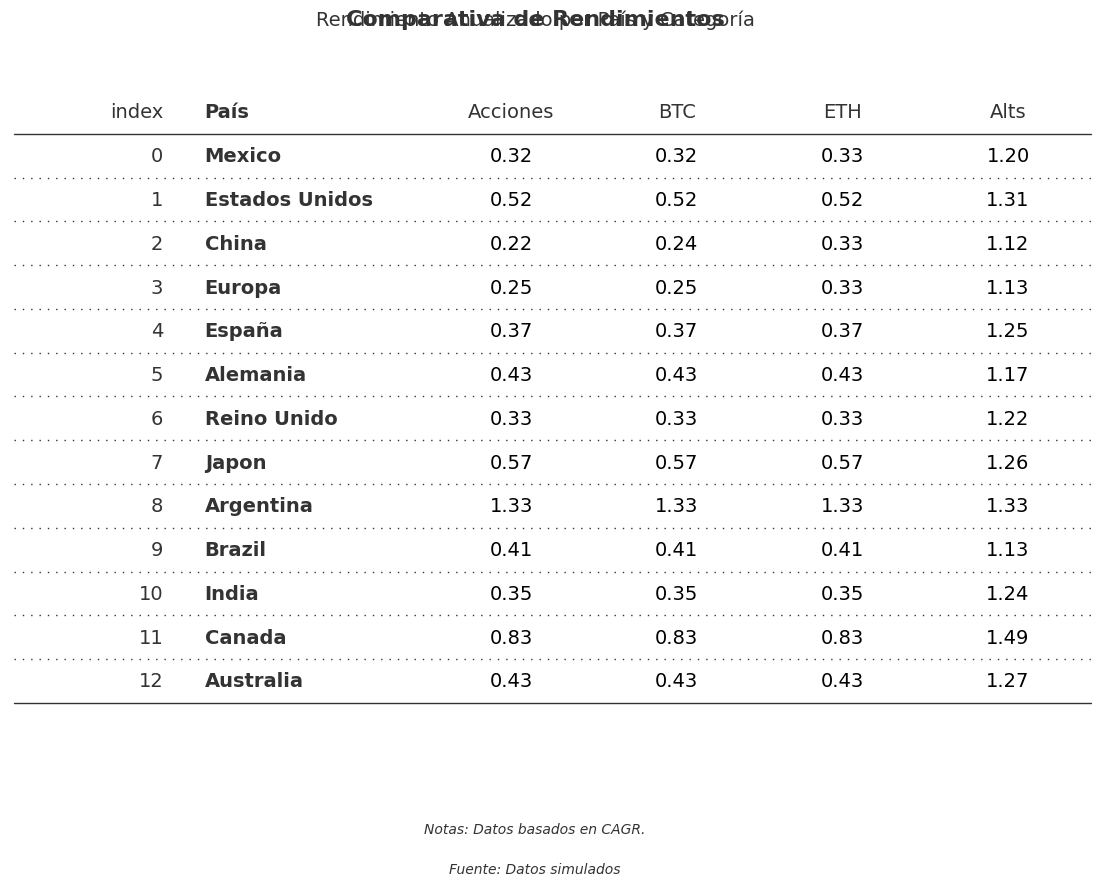

In [139]:
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.formatters import decimal_to_percent
df = pd.DataFrame(df_cagr)

# Crear la tabla usando plottable
col_defs = [
    ColumnDefinition(name="País", textprops={"ha": "left", "weight": "bold"}, width=1.5),
    ColumnDefinition(name="Acciones", formatter="{:.2f}".format, textprops={"ha": "center"}, width=1),
    ColumnDefinition(name="BTC", formatter="{:.2f}".format, textprops={"ha": "center"}, width=1),
    ColumnDefinition(name="ETH", formatter="{:.2f}".format, textprops={"ha": "center"}, width=1),
    ColumnDefinition(name="Alts", formatter="{:.2f}".format, textprops={"ha": "center"}, width=1)
]

plt.rcParams["font.family"] = ["DejaVu Sans"]
plt.rcParams["savefig.bbox"] = "tight"
fig, ax = plt.subplots(figsize=(14, 8))

table = Table(
    df,
    column_definitions=col_defs,
    row_dividers=True,
    footer_divider=True,
    ax=ax,
    textprops={"fontsize": 14},
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 1, "linestyle": "-"},
    
).autoset_fontcolors(colnames=["Acciones", "BTC", "ETH", "Alts"])

# Añadir título y subtítulo
fig.suptitle('Comparativa de Rendimientos', fontsize=16, fontweight='bold')
fig.text(0.5, 0.96, 'Rendimiento Anualizado por País y Categoría', ha='center', fontsize=14)

# Añadir notas y fuente
fig.text(0.5, -0.05, 'Notas: Datos basados en CAGR.', ha='center', fontsize=10, style='italic')
fig.text(0.5, -0.1, 'Fuente: Datos simulados', ha='center', fontsize=10, style='italic')

# Mostrar la tabla
plt.show()

###### Sharpe

In [ ]:
# Obtener sharpes de portafolios por pais
sharpes_por_pais = {
    'Mexico':{
        'Acciones': qs.stats.sharpe(mex_acc_port),
        'BTC': qs.stats.sharpe(mex_acc_btc_port),
        'ETH': qs.stats.sharpe(mex_acc_eth_port),
        'Alts': qs.stats.sharpe(mex_acc_alts_port)
    },
    'Estados Unidos':{
        'Acciones': qs.stats.sharpe(usa_acc_port),
        'BTC': qs.stats.sharpe(usa_acc_btc_port),
        'ETH': qs.stats.sharpe(usa_acc_eth_port),
        'Alts': qs.stats.sharpe(usa_acc_alts_port)
    },
    'China':{
        'Acciones': qs.stats.sharpe(china_acc_port),
        'BTC': qs.stats.sharpe(china_acc_btc_port),
        'ETH': qs.stats.sharpe(china_acc_eth_port),
        'Alts': qs.stats.sharpe(china_acc_alts_port)
    },
    'Europa':{
        'Acciones': qs.stats.sharpe(euro_acc_port),
        'BTC': qs.stats.sharpe(euro_acc_btc_port),
        'ETH': qs.stats.sharpe(euro_acc_eth_port),
        'Alts': qs.stats.sharpe(euro_acc_alts_port)
    },
    'España':{
        'Acciones': qs.stats.sharpe(es_acc_port),
        'BTC': qs.stats.sharpe(es_acc_btc_port),
        'ETH': qs.stats.sharpe(es_acc_eth_port),
        'Alts': qs.stats.sharpe(es_acc_alts_port)
    },
    'Alemania':{
        'Acciones': qs.stats.sharpe(ale_acc_port),
        'BTC': qs.stats.sharpe(ale_acc_btc_port),
        'ETH': qs.stats.sharpe(ale_acc_eth_port),
        'Alts': qs.stats.sharpe(ale_acc_alts_port)
    },
    'Reino Unido':{
        'Acciones': qs.stats.sharpe(uk_acc_port),
        'BTC': qs.stats.sharpe(uk_acc_btc_port),
        'ETH': qs.stats.sharpe(uk_acc_eth_port),
        'Alts': qs.stats.sharpe(uk_acc_alts_port)
    },
    'Japon':{
        'Acciones': qs.stats.sharpe(jp_acc_port),
        'BTC': qs.stats.sharpe(jp_acc_btc_port),
        'ETH': qs.stats.sharpe(jp_acc_eth_port),
        'Alts': qs.stats.sharpe(jp_acc_alts_port)
    },
    'Argentina':{
        'Acciones': qs.stats.sharpe(ar_acc_port),
        'BTC': qs.stats.sharpe(ar_acc_btc_port),
        'ETH': qs.stats.sharpe(ar_acc_eth_port),
        'Alts': qs.stats.sharpe(ar_acc_alts_port)
    },
    'Brazil':{
        'Acciones': qs.stats.sharpe(br_acc_port),
        'BTC': qs.stats.sharpe(br_acc_btc_port),
        'ETH': qs.stats.sharpe(br_acc_eth_port),
        'Alts': qs.stats.sharpe(br_acc_alts_port)
    },
    'Rusia':{
        'Acciones': qs.stats.sharpe(ru_acc_port),
        'BTC': qs.stats.sharpe(ru_acc_btc_port),
        'ETH': qs.stats.sharpe(ru_acc_eth_port),
        'Alts': qs.stats.sharpe(ru_acc_alts_port)
    },
    'India':{
        'Acciones': qs.stats.sharpe(in_acc_port),
        'BTC': qs.stats.sharpe(in_acc_btc_port),
        'ETH': qs.stats.sharpe(in_acc_eth_port),
        'Alts': qs.stats.sharpe(in_acc_alts_port)
    },
    'Canada':{
        'Acciones': qs.stats.sharpe(ca_acc_port),
        'BTC': qs.stats.sharpe(ca_acc_btc_port),
        'ETH': qs.stats.sharpe(ca_acc_eth_port),
        'Alts': qs.stats.sharpe(ca_acc_alts_port)
    },
    'Australia':{
        'Acciones': qs.stats.sharpe(au_acc_port),
        'BTC': qs.stats.sharpe(au_acc_btc_port),
        'ETH': qs.stats.sharpe(au_acc_eth_port),
        'Alts': qs.stats.sharpe(au_acc_alts_port)
    }
}

###### Drawdown

In [ ]:
# Obtener drawdowns de portafolios por pais
drawdowns_por_pais = {
    'Mexico':{
        'Acciones': qs.stats.max_drawdown(mex_acc_port),
        'BTC': qs.stats.max_drawdown(mex_acc_btc_port),
        'ETH': qs.stats.max_drawdown(mex_acc_eth_port),
        'Alts': qs.stats.max_drawdown(mex_acc_alts_port)
    },
    'Estados Unidos':{
        'Acciones': qs.stats.max_drawdown(usa_acc_port),
        'BTC': qs.stats.max_drawdown(usa_acc_btc_port),
        'ETH': qs.stats.max_drawdown(usa_acc_eth_port),
        'Alts': qs.stats.max_drawdown(usa_acc_alts_port)
    },
    'China':{
        'Acciones': qs.stats.max_drawdown(china_acc_port),
        'BTC': qs.stats.max_drawdown(china_acc_btc_port),
        'ETH': qs.stats.max_drawdown(china_acc_eth_port),
        'Alts': qs.stats.max_drawdown(china_acc_alts_port)
    },
    'Europa':{
        'Acciones': qs.stats.max_drawdown(euro_acc_port),
        'BTC': qs.stats.max_drawdown(euro_acc_btc_port),
        'ETH': qs.stats.max_drawdown(euro_acc_eth_port),
        'Alts': qs.stats.max_drawdown(euro_acc_alts_port)
    },
    'España':{
        'Acciones': qs.stats.max_drawdown(es_acc_port),
        'BTC': qs.stats.max_drawdown(es_acc_btc_port),
        'ETH': qs.stats.max_drawdown(es_acc_eth_port),
        'Alts': qs.stats.max_drawdown(es_acc_alts_port)
    },
    'Alemania':{
        'Acciones': qs.stats.max_drawdown(ale_acc_port),
        'BTC': qs.stats.max_drawdown(ale_acc_btc_port),
        'ETH': qs.stats.max_drawdown(ale_acc_eth_port),
        'Alts': qs.stats.max_drawdown(ale_acc_alts_port)
    },
    'Reino Unido':{
        'Acciones': qs.stats.max_drawdown(uk_acc_port),
        'BTC': qs.stats.max_drawdown(uk_acc_btc_port),
        'ETH': qs.stats.max_drawdown(uk_acc_eth_port),
        'Alts': qs.stats.max_drawdown(uk_acc_alts_port)
    },
    'Japon':{
        'Acciones': qs.stats.max_drawdown(jp_acc_port),
        'BTC': qs.stats.max_drawdown(jp_acc_btc_port),
        'ETH': qs.stats.max_drawdown(jp_acc_eth_port),
        'Alts': qs.stats.max_drawdown(jp_acc_alts_port)
    },
    'Argentina':{
        'Acciones': qs.stats.max_drawdown(ar_acc_port),
        'BTC': qs.stats.max_drawdown(ar_acc_btc_port),
        'ETH': qs.stats.max_drawdown(ar_acc_eth_port),
        'Alts': qs.stats.max_drawdown(ar_acc_alts_port)
    },
    'Brazil':{
        'Acciones': qs.stats.max_drawdown(br_acc_port),
        'BTC': qs.stats.max_drawdown(br_acc_btc_port),
        'ETH': qs.stats.max_drawdown(br_acc_eth_port),
        'Alts': qs.stats.max_drawdown(br_acc_alts_port)
    },
    'Rusia':{
        'Acciones': qs.stats.max_drawdown(ru_acc_port),
        'BTC': qs.stats.max_drawdown(ru_acc_btc_port),
        'ETH': qs.stats.max_drawdown(ru_acc_eth_port),
        'Alts': qs.stats.max_drawdown(ru_acc_alts_port)
    },
    'India':{
        'Acciones': qs.stats.max_drawdown(in_acc_port),
        'BTC': qs.stats.max_drawdown(in_acc_btc_port),
        'ETH': qs.stats.max_drawdown(in_acc_eth_port),
        'Alts': qs.stats.max_drawdown(in_acc_alts_port)
    },
    'Canada':{
        'Acciones': qs.stats.max_drawdown(ca_acc_port),
        'BTC': qs.stats.max_drawdown(ca_acc_btc_port),
        'ETH': qs.stats.max_drawdown(ca_acc_eth_port),
        'Alts': qs.stats.max_drawdown(ca_acc_alts_port)
    },
    'Australia':{
        'Acciones': qs.stats.max_drawdown(au_acc_port),
        'BTC': qs.stats.max_drawdown(au_acc_btc_port),
        'ETH': qs.stats.max_drawdown(au_acc_eth_port),
        'Alts': qs.stats.max_drawdown(au_acc_alts_port)
    }
}

###### Sortino

In [ ]:
# Obtener sortino de portafolios por pais
sortinos_por_pais = {
    'Mexico':{
        'Acciones': qs.stats.sortino(mex_acc_port),
        'BTC': qs.stats.sortino(mex_acc_btc_port),
        'ETH': qs.stats.sortino(mex_acc_eth_port),
        'Alts': qs.stats.sortino(mex_acc_alts_port)
    },
    'Estados Unidos':{
        'Acciones': qs.stats.sortino(usa_acc_port),
        'BTC': qs.stats.sortino(usa_acc_btc_port),
        'ETH': qs.stats.sortino(usa_acc_eth_port),
        'Alts': qs.stats.sortino(usa_acc_alts_port)
    },
    'China':{
        'Acciones': qs.stats.sortino(china_acc_port),
        'BTC': qs.stats.sortino(china_acc_btc_port),
        'ETH': qs.stats.sortino(china_acc_eth_port),
        'Alts': qs.stats.sortino(china_acc_alts_port)
    },
    'Europa':{
        'Acciones': qs.stats.sortino(euro_acc_port),
        'BTC': qs.stats.sortino(euro_acc_btc_port),
        'ETH': qs.stats.sortino(euro_acc_eth_port),
        'Alts': qs.stats.sortino(euro_acc_alts_port)
    },
    'España':{
        'Acciones': qs.stats.sortino(es_acc_port),
        'BTC': qs.stats.sortino(es_acc_btc_port),
        'ETH': qs.stats.sortino(es_acc_eth_port),
        'Alts': qs.stats.sortino(es_acc_alts_port)
    },
    'Alemania':{
        'Acciones': qs.stats.sortino(ale_acc_port),
        'BTC': qs.stats.sortino(ale_acc_btc_port),
        'ETH': qs.stats.sortino(ale_acc_eth_port),
        'Alts': qs.stats.sortino(ale_acc_alts_port)
    },
    'Reino Unido':{
        'Acciones': qs.stats.sortino(uk_acc_port),
        'BTC': qs.stats.sortino(uk_acc_btc_port),
        'ETH': qs.stats.sortino(uk_acc_eth_port),
        'Alts': qs.stats.sortino(uk_acc_alts_port)
    },
    'Japon':{
        'Acciones': qs.stats.sortino(jp_acc_port),
        'BTC': qs.stats.sortino(jp_acc_btc_port),
        'ETH': qs.stats.sortino(jp_acc_eth_port),
        'Alts': qs.stats.sortino(jp_acc_alts_port)
    },
    'Argentina':{
        'Acciones': qs.stats.sortino(ar_acc_port),
        'BTC': qs.stats.sortino(ar_acc_btc_port),
        'ETH': qs.stats.sortino(ar_acc_eth_port),
        'Alts': qs.stats.sortino(ar_acc_alts_port)
    },
    'Brazil':{
        'Acciones': qs.stats.sortino(br_acc_port),
        'BTC': qs.stats.sortino(br_acc_btc_port),
        'ETH': qs.stats.sortino(br_acc_eth_port),
        'Alts': qs.stats.sortino(br_acc_alts_port)
    },
    'Rusia':{
        'Acciones': qs.stats.sortino(ru_acc_port),
        'BTC': qs.stats.sortino(ru_acc_btc_port),
        'ETH': qs.stats.sortino(ru_acc_eth_port),
        'Alts': qs.stats.sortino(ru_acc_alts_port)
    },
    'India':{
        'Acciones': qs.stats.sortino(in_acc_port),
        'BTC': qs.stats.sortino(in_acc_btc_port),
        'ETH': qs.stats.sortino(in_acc_eth_port),
        'Alts': qs.stats.sortino(in_acc_alts_port)
    },
    'Canada':{
        'Acciones': qs.stats.sortino(ca_acc_port),
        'BTC': qs.stats.sortino(ca_acc_btc_port),
        'ETH': qs.stats.sortino(ca_acc_eth_port),
        'Alts': qs.stats.sortino(ca_acc_alts_port)
    },
    'Australia':{
        'Acciones': qs.stats.sortino(au_acc_port),
        'BTC': qs.stats.sortino(au_acc_btc_port),
        'ETH': qs.stats.sortino(au_acc_eth_port),
        'Alts': qs.stats.sortino(au_acc_alts_port)
    }
}

##### Graficas de metricas

In [ ]:
def plot_metric_bars(metric_por_pais, title='Rendimiento por País y Categoría', suptitle='Comparativa de Métricas', notes='Notas: ', fuente='Fuente: ', categorias_colores=None, is_percentage=False):
    # Convertir el diccionario a un DataFrame
    data = []
    for pais, categorias in metric_por_pais.items():
        for categoria, valor in categorias.items():
            if is_percentage:
                valor *= 100  # Convertir a porcentaje si es necesario
            data.append({'País': pais, 'Categoría': categoria, 'Valor': valor})
    df = pd.DataFrame(data)
    
    # Ordenar el DataFrame por Valor
    df_sorted = df.sort_values(by='Valor', ascending=False)
    
    # Dividir el DataFrame en dos partes: mayor valor y menor valor
    midpoint = len(df_sorted) // 2
    df_top = df_sorted.iloc[:midpoint]
    df_bottom = df_sorted.iloc[midpoint:]
    
    # Configurar el estilo de seaborn
    sns.set_style("whitegrid")
    
    # Crear un mapa de colores si no se proporciona
    if categorias_colores is None:
        categorias_colores = {
            'Acciones': 'blue',
            'BTC': 'orange',
            'ETH': 'green',
            'Alts': 'red'
        }
    
    # Crear la figura y los ejes
    fig, axs = plt.subplots(2, 1, figsize=(14, 12), sharex=True)
    
    # Gráfico de barras para mayor valor
    sns.barplot(x='País', y='Valor', hue='Categoría', data=df_top, palette=categorias_colores, ax=axs[0])
    axs[0].set_title('Categorías con Mayor Valor', fontsize=14, fontweight='bold')
    axs[0].set_ylabel('Valor' + (' (%)' if is_percentage else ''))
    axs[0].legend(loc='upper right')
    
    # Gráfico de barras para menor valor
    sns.barplot(x='País', y='Valor', hue='Categoría', data=df_bottom, palette=categorias_colores, ax=axs[1])
    axs[1].set_title('Categorías con Menor Valor', fontsize=14, fontweight='bold')
    axs[1].set_ylabel('Valor' + (' (%)' if is_percentage else ''))
    axs[1].legend(loc='upper right')
    
    # Ajustar el diseño
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # Añadir título y subtítulo
    fig.suptitle(suptitle, fontsize=16, fontweight='bold')
    fig.text(0.5, 0.96, title, ha='center', fontsize=14)
    
    # Añadir notas y fuente
    fig.text(0.5, 0.01, notes, ha='center', fontsize=10, style='italic')
    fig.text(0.5, 0.005, fuente, ha='center', fontsize=10, style='italic')
    
    # Mostrar el gráfico
    plt.show()

##### Tablas

In [102]:
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.formatters import decimal_to_percent
import matplotlib.pyplot as plt
# Convertir el diccionario a un DataFrame
data = []
for pais, categorias in cagr_por_pais.items():
    row = {'País': pais}
    row.update(categorias)
    data.append(row)
df = pd.DataFrame(data)

# Crear la tabla usando plottable
col_defs = [
    ColumnDefinition(name="País", textprops={"ha": "left", "weight": "bold"}, width=1.5),
    ColumnDefinition(name="Acciones", formatter=decimal_to_percent, textprops={"ha": "center"}, width=1),
    ColumnDefinition(name="BTC", formatter=decimal_to_percent, textprops={"ha": "center"}, width=1),
    ColumnDefinition(name="ETH", formatter=decimal_to_percent, textprops={"ha": "center"}, width=1),
    ColumnDefinition(name="Alts", formatter=decimal_to_percent, textprops={"ha": "center"}, width=1)
]

plt.rcParams["font.family"] = ["DejaVu Sans"]
plt.rcParams["savefig.bbox"] = "tight"
fig, ax = plt.subplots(figsize=(14, 8))

table = Table(
    df,
    column_definitions=col_defs,
    row_dividers=True,
    footer_divider=True,
    ax=ax,
    textprops={"fontsize": 14},
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 1, "linestyle": "-"},
).autoset_fontcolors(colnames=["Acciones", "BTC", "ETH", "Alts"])

# Añadir título y subtítulo
fig.suptitle('Comparativa de Rendimientos', fontsize=16, fontweight='bold')
fig.text(0.5, 0.96, 'Rendimiento Anualizado por País y Categoría', ha='center', fontsize=14)

# Añadir notas y fuente
fig.text(0.5, -0.05, 'Notas: Datos basados en CAGR.', ha='center', fontsize=10, style='italic')
fig.text(0.5, -0.1, 'Fuente: Datos simulados', ha='center', fontsize=10, style='italic')

# Mostrar la tabla
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

#### Markov analisis

In [50]:
column = 'SP500'

In [51]:
    #! Funcionan con rendimientos
test_data = markov_regresion(data_r, column=column, order=1, trend='n')
data_lvar = test_data['l_var']
data_hvar = test_data['h_var']

In [52]:
test_cry = markov_regresion(data_w_cripto_r, column=column, order=1, trend='n')
data_lvar_cry = test_cry['l_var']
data_hvar_cry = test_cry['h_var']

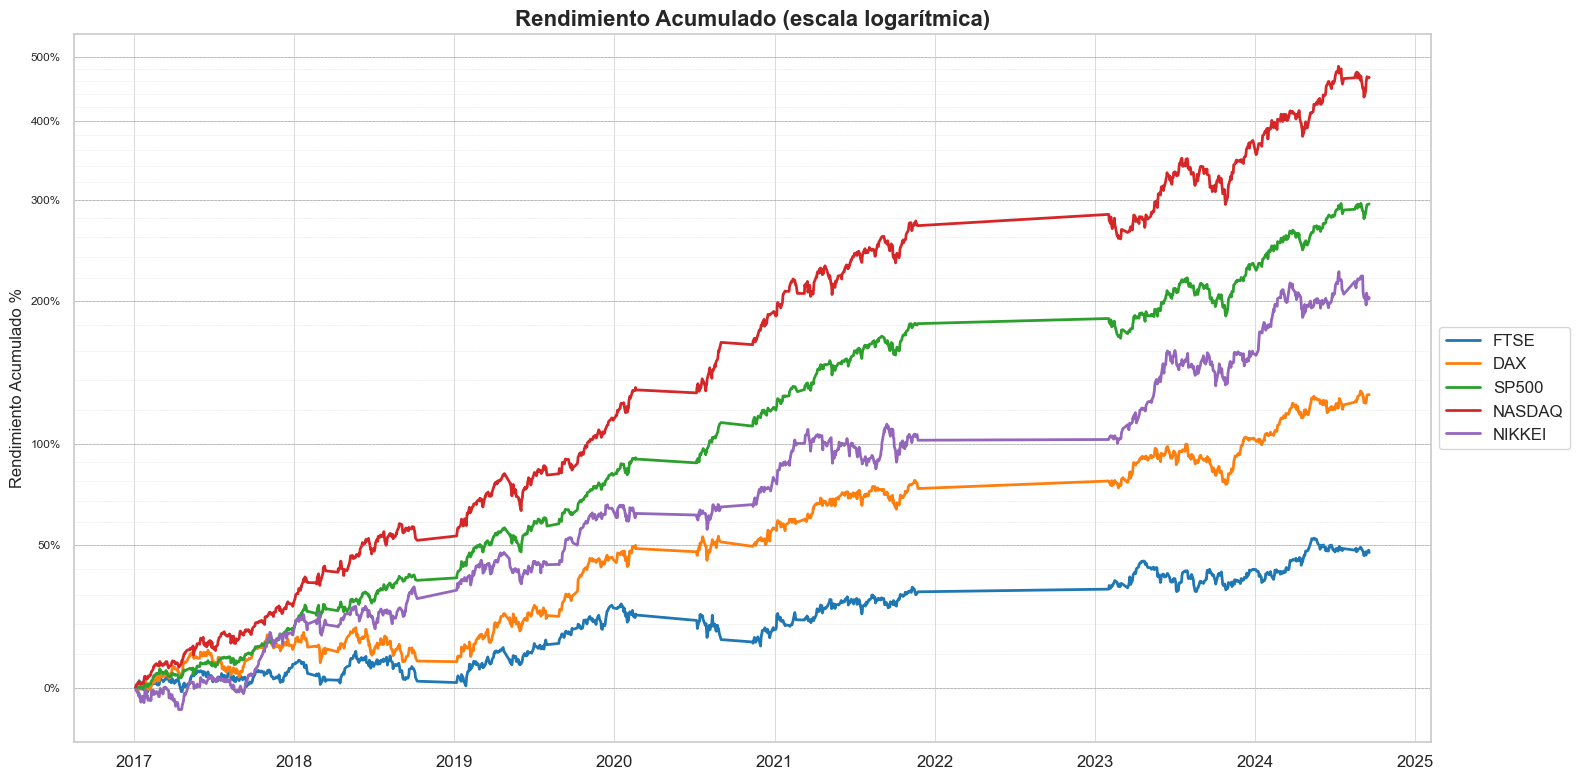

In [53]:
#rendimiento acumulado de data_hvar
plot_cumulative_returns(data_lvar, yticks=[1,1.5, 2, 3, 4, 5, 6], num_minor_ticks=4)

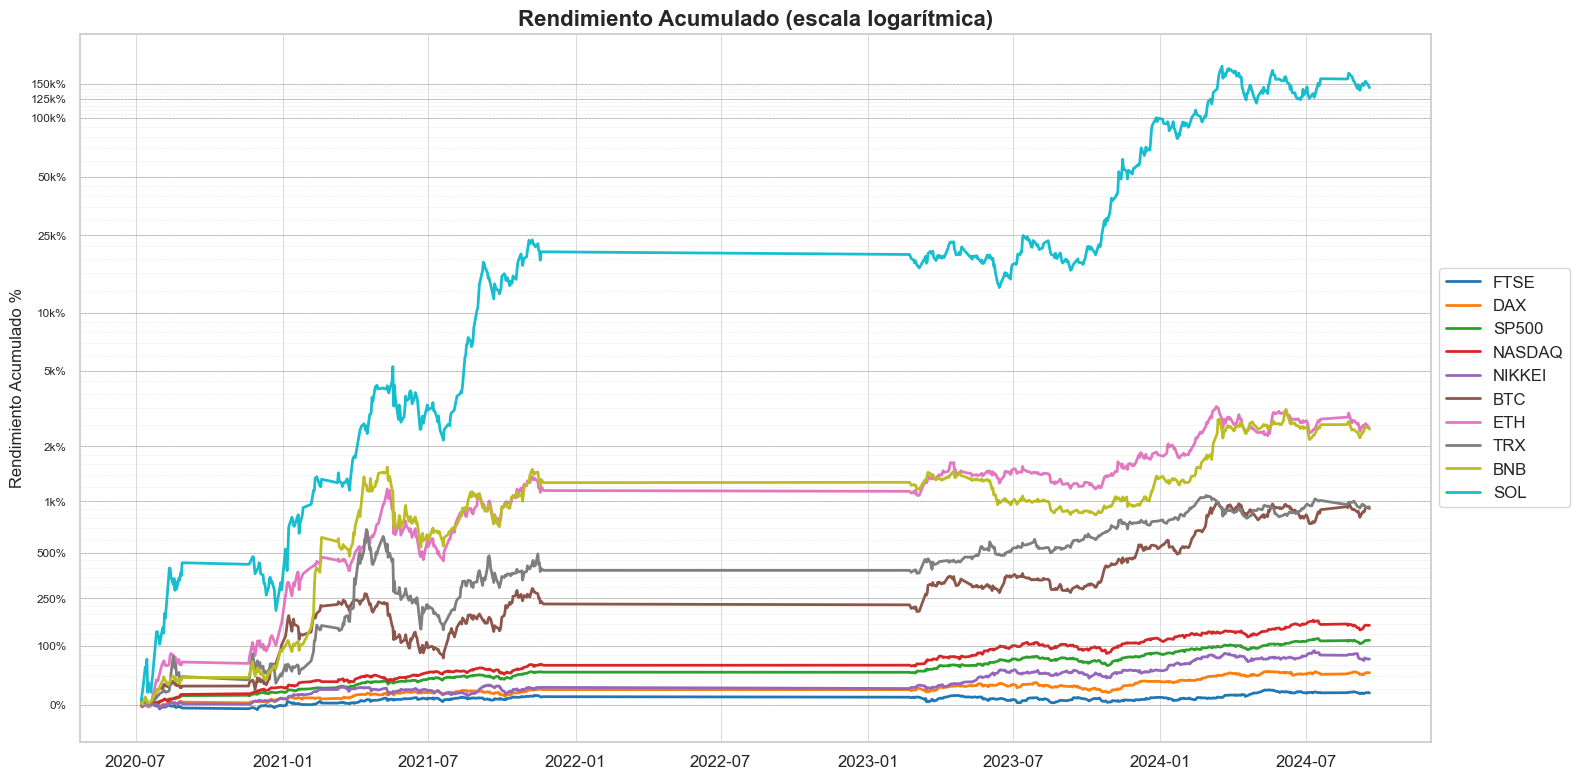

In [54]:
plot_cumulative_returns(data_lvar_cry, yticks=[1,2, 3.5, 6, 11, 21, 51, 101,251,501,1001,1251,1501], num_minor_ticks=4)

In [55]:
# Función para visualizar dos portafolios en un gráfico de barras comparativo
def plot_two_portfolios_bar(weights1, weights2, name1, name2):
    sns.set_style("whitegrid")
    sns.set_palette("husl")
    
    # Convertimos los pesos en DataFrames (por si vienen en otros formatos)
    portfolio1 = pd.Series(weights1)
    portfolio2 = pd.Series(weights2)
    
    # Unimos los nombres de los activos para asegurarnos de tener todos los posibles activos
    all_assets = list(set(portfolio1.index).union(set(portfolio2.index)))
    
    # Mapa de colores consistente para los activos
    color_map = dict(zip(all_assets, sns.color_palette("tab10", n_colors=len(all_assets))))
    
    # Configuración de la figura y subplots
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle('Comparación de Composición de Portafolios', fontsize=16, fontweight='bold')
    
    portfolios = [portfolio1, portfolio2]
    names = [name1, name2]
    
    for i, (portfolio, name) in enumerate(zip(portfolios, names)):
        # Rellenamos con ceros para los activos faltantes en cada portafolio
        portfolio = portfolio.reindex(all_assets).fillna(0)
        assets = portfolio.index
        weights = portfolio.values
        
        # Ordenar los activos por peso de mayor a menor
        sorted_indices = np.argsort(weights)[::-1]
        sorted_assets = np.array(assets)[sorted_indices]
        sorted_weights = np.array(weights)[sorted_indices]
        
        # Colores correspondientes
        colors = [color_map[asset] for asset in sorted_assets]
        
        # Crear el gráfico de columnas (barplot)
        axs[i].bar(sorted_assets, sorted_weights, color=colors)
        axs[i].set_title(f'Portafolio: {name}', fontsize=12, fontweight='bold')
        axs[i].set_ylabel('Peso (%)')
        axs[i].set_ylim(0, 1)  # Escala de 0 a 100% (si los pesos están entre 0 y 1)

    plt.tight_layout()

    # Añadir una leyenda común para ambos gráficos
    legend_elements = [plt.Rectangle((0, 0), 1, 1, facecolor=color_map[asset], edgecolor='none') for asset in all_assets]
    fig.legend(legend_elements, all_assets, loc='upper center', bbox_to_anchor=(0.5, 0.92),
               ncol=len(all_assets), fontsize=10, title='Activos', title_fontsize=12)

    plt.subplots_adjust(top=0.85, bottom=0.1)
    plt.show()

###### Sharpe

In [56]:
sharpe_data_hvar_cry = calculate_max_sharpe(data_hvar_cry, risk_free=risk_free, min_weight=min_weight)
sharpe_weight_hvar_cry = calculate_max_sharpe(data_hvar_cry, risk_free=risk_free, min_weight=min_weight, save_weights=True)



In [57]:

sharpe_data_lvar_cry = calculate_max_sharpe(data_lvar_cry, risk_free=risk_free, min_weight=min_weight)
sharpe_weight_lvar_cry = calculate_max_sharpe(data_lvar_cry, risk_free=risk_free, min_weight=min_weight, save_weights=True)


###### Risk limit

In [58]:
rl_data_hvar_cry = calculate_risk_limit(data_hvar_cry, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight)

rl_weight_hvar_cry = calculate_risk_limit(data_hvar_cry, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight, save_weights=True)

############################################################

rl_data_lvar_cry = calculate_risk_limit(data_lvar_cry, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight)

rl_weight_lvar_cry = calculate_risk_limit(data_lvar_cry, risk_free=risk_free, risk_limit=risk_limit, min_weight=min_weight, save_weights=True)

In [59]:
sharpe_weight_hvar_cry

OrderedDict([('FTSE', 0.97753),
             ('DAX', 0.0),
             ('SP500', 0.0),
             ('NASDAQ', 0.0),
             ('NIKKEI', 0.0),
             ('BTC', 0.0),
             ('ETH', 0.0),
             ('TRX', 0.01013),
             ('BNB', 0.01234),
             ('SOL', 0.0)])

###### Pie plot

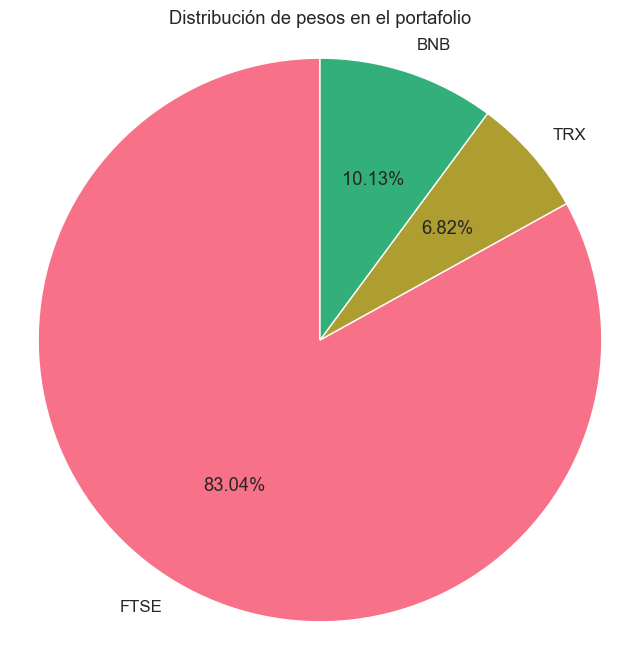

In [ ]:
#grafica de pastel con sharpe_weight_hvar_cry como entrada de pesos
pie_plot(sharpe_weight_hvar_cry)

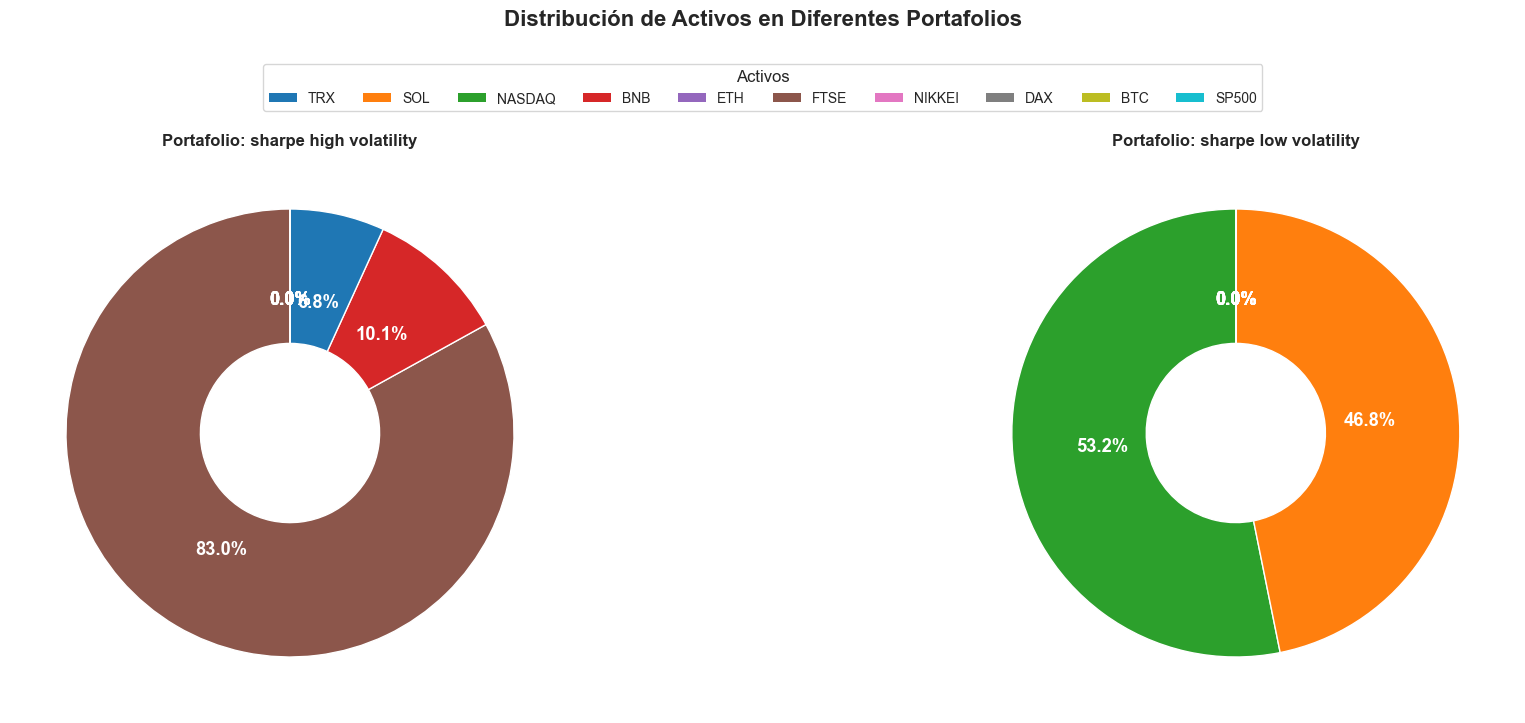

In [ ]:
pie_plot_both(sharpe_weight_hvar_cry, sharpe_weight_lvar_cry, 'sharpe high volatility', 'sharpe low volatility')

In [ ]:
pie_plot_both(rl_weight_hvar_cry, rl_weight_lvar_cry, 'sharpe high volatility', 'sharpe low volatility')

In [ ]:
key_metrics(sharpe_data_hvar_cry, risk_free=risk_free, mode='basic')

                    Strategy
------------------  ----------
Start Period        2020-04-15
End Period          2024-09-10
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   38.34%
CAGR﹪              5.21%

Sharpe              0.94
Prob. Sharpe Ratio  89.6%
Sortino             1.37
Sortino/√2          0.97
Omega               1.18

Max Drawdown        -13.78%
Longest DD Days     573

Gain/Pain Ratio     0.18
Gain/Pain (1M)      0.98

Payoff Ratio        1.02
Profit Factor       1.18
Common Sense Ratio  1.4
CPC Index           0.64
Tail Ratio          1.18
Outlier Win Ratio   3.39
Outlier Loss Ratio  4.05

MTD                 -2.3%
3M                  0.34%
6M                  0.34%
YTD                 0.34%
1Y                  0.34%
3Y (ann.)           -0.02%
5Y (ann.)           5.21%
10Y (ann.)          5.21%
All-time (ann.)     5.21%

Avg. Drawdown       -3.48%
Avg. Drawdown Days  71
Recovery Factor     2.66
Ulcer Index         0.06
Serenity Index      0.86


In [ ]:
key_metrics(sharpe_data_lvar_cry, risk_free=risk_free, mode='full')

                           Strategy
-------------------------  ----------
Start Period               2020-07-09
End Period                 2024-07-19
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          8,119.89%
CAGR﹪                     112.83%

Sharpe                     3.15
Prob. Sharpe Ratio         100.0%
Smart Sharpe               2.92
Sortino                    6.42
Smart Sortino              5.94
Sortino/√2                 4.54
Smart Sortino/√2           4.2
Omega                      1.84

Max Drawdown               -24.05%
Longest DD Days            514
Volatility (ann.)          70.82%
Calmar                     4.69
Skew                       1.67
Kurtosis                   9.71

Expected Daily %           0.79%
Expected Monthly %         14.77%
Expected Yearly %          201.1%
Kelly Criterion            25.24%
Risk of Ruin               0.0%
Daily Value-at-Risk        -6.45%
Expected Shortfall (cVaR)  -6.45%

Max Consecutive Wins

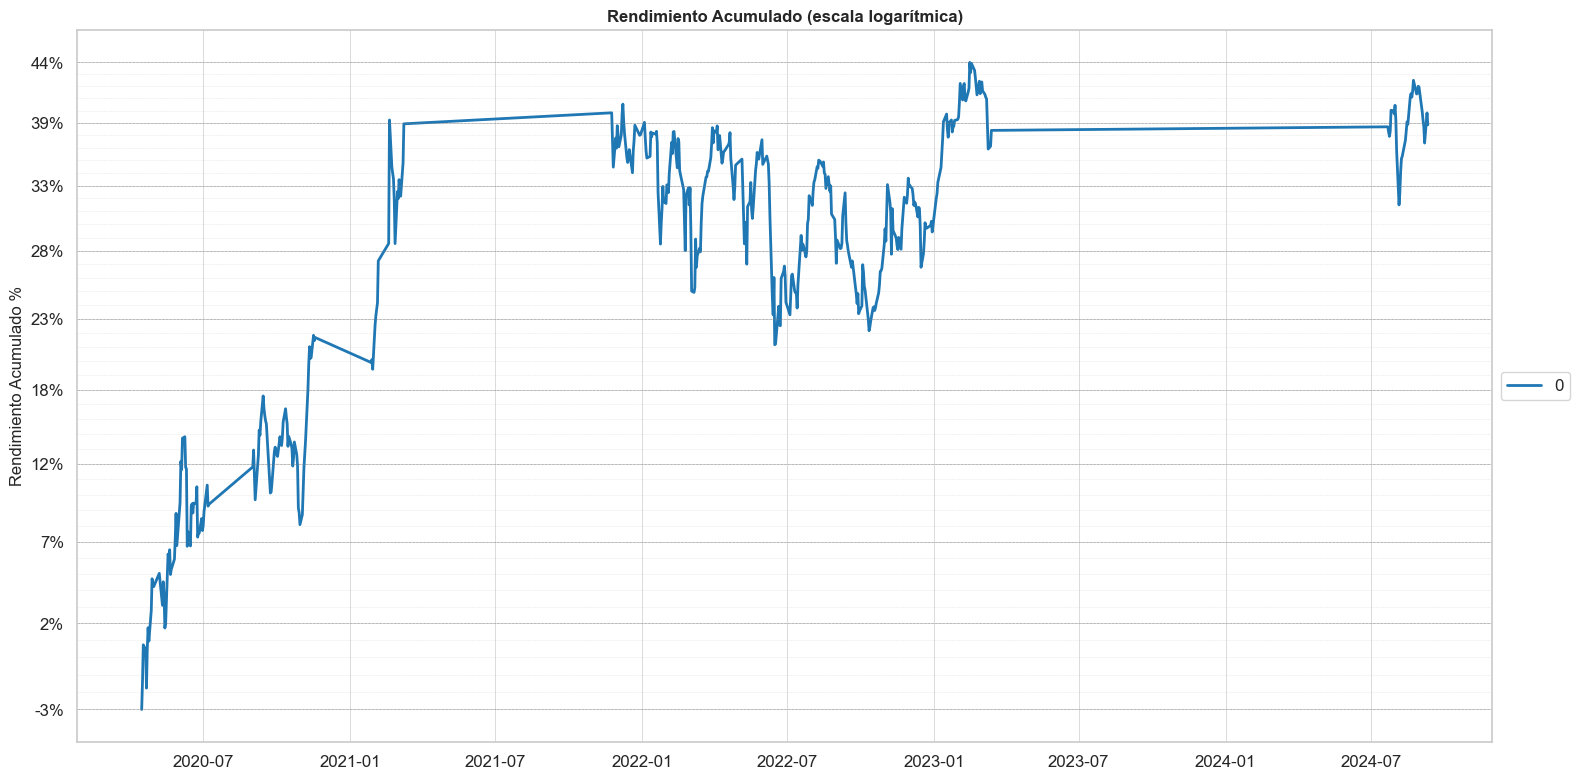

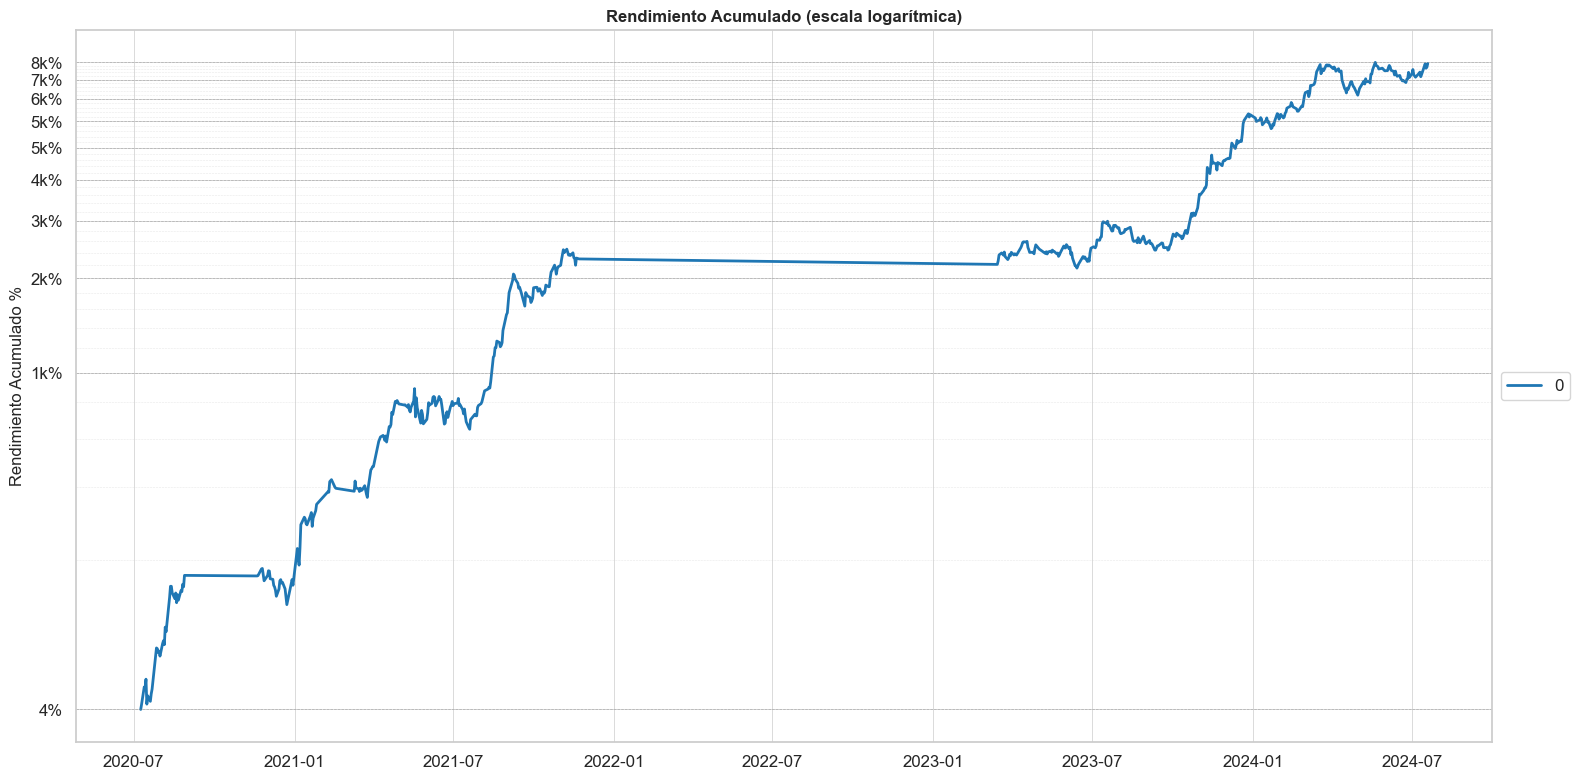

In [ ]:
plot_cumulative_returns2(pd.DataFrame(sharpe_data_hvar_cry))
plot_cumulative_returns2(pd.DataFrame(sharpe_data_lvar_cry))

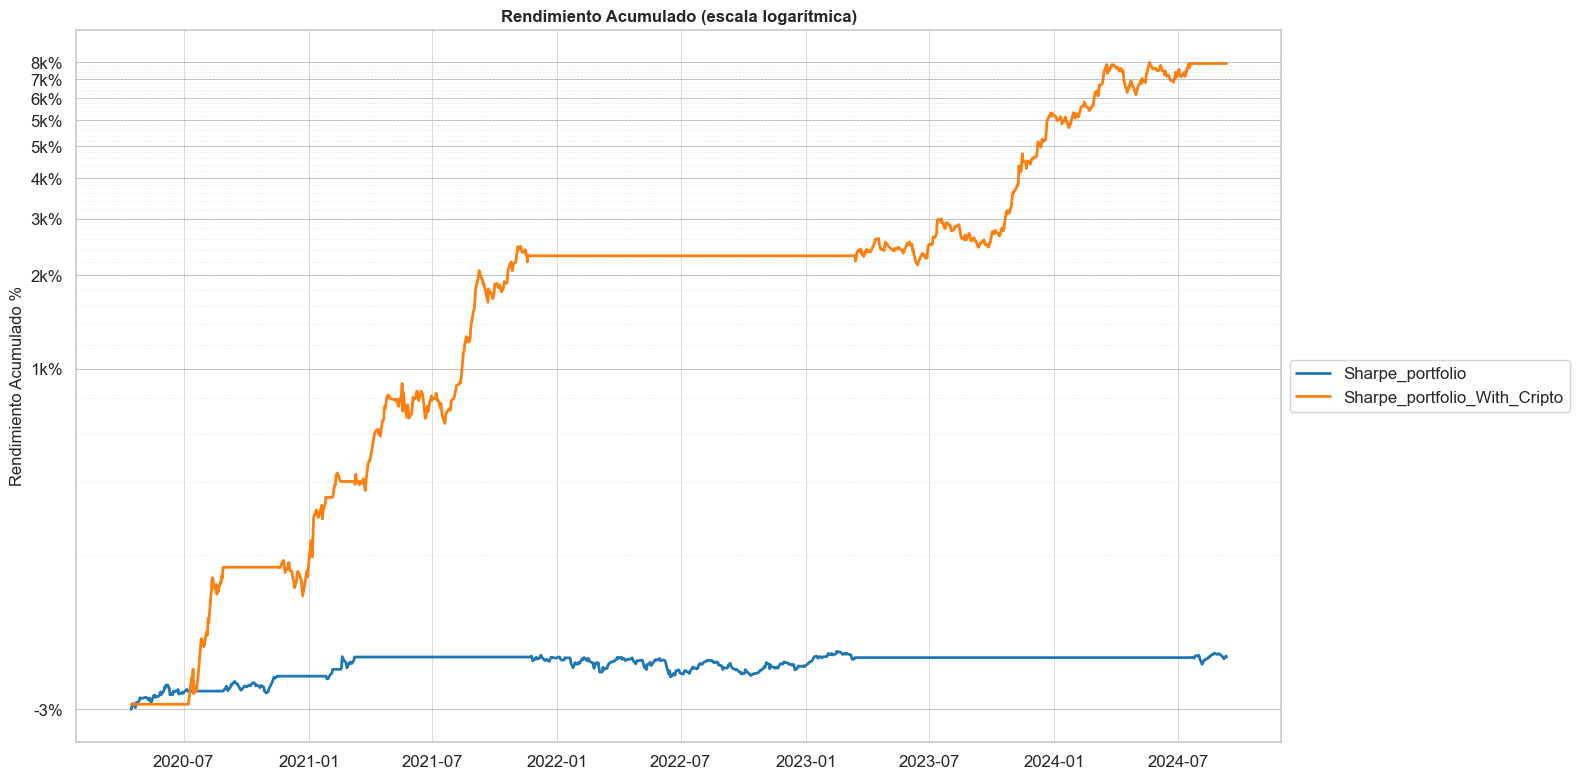

In [ ]:
plot_cumulative_returns2(pd.concat([pd.DataFrame(sharpe_data_hvar_cry, columns=['Sharpe_portfolio']), pd.DataFrame(sharpe_data_lvar_cry, columns=['Sharpe_portfolio_With_Cripto'])], axis=1).fillna(0))


In [ ]:
sharpe_data_lvar = calculate_max_sharpe(data_lvar, risk_free=risk_free, min_weight=min_weight)

In [ ]:
key_metrics(sharpe_data_hvar, risk_free=risk_free, mode='full')

In [ ]:
key_metrics(sharpe_data_lvar, risk_free=risk_free, mode='full')

                           Strategy
-------------------------  ----------
Start Period               2017-01-05
End Period                 2024-09-11
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          283.14%
CAGR﹪                     12.82%

Sharpe                     2.88
Prob. Sharpe Ratio         100.0%
Smart Sharpe               2.55
Sortino                    4.6
Smart Sortino              4.07
Sortino/√2                 3.25
Smart Sortino/√2           2.88
Omega                      1.61

Max Drawdown               -9.67%
Longest DD Days            499
Volatility (ann.)          9.75%
Calmar                     1.33
Skew                       -0.13
Kurtosis                   0.9

Expected Daily %           0.11%
Expected Monthly %         1.88%
Expected Yearly %          21.15%
Kelly Criterion            22.07%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.9%
Expected Shortfall (cVaR)  -0.9%

Max Consecutive Wins       9

In [ ]:
plot_cumulative_returns2(pd.DataFrame(sharpe_data_hvar, columns=['Sharpe portfolio High Var']))


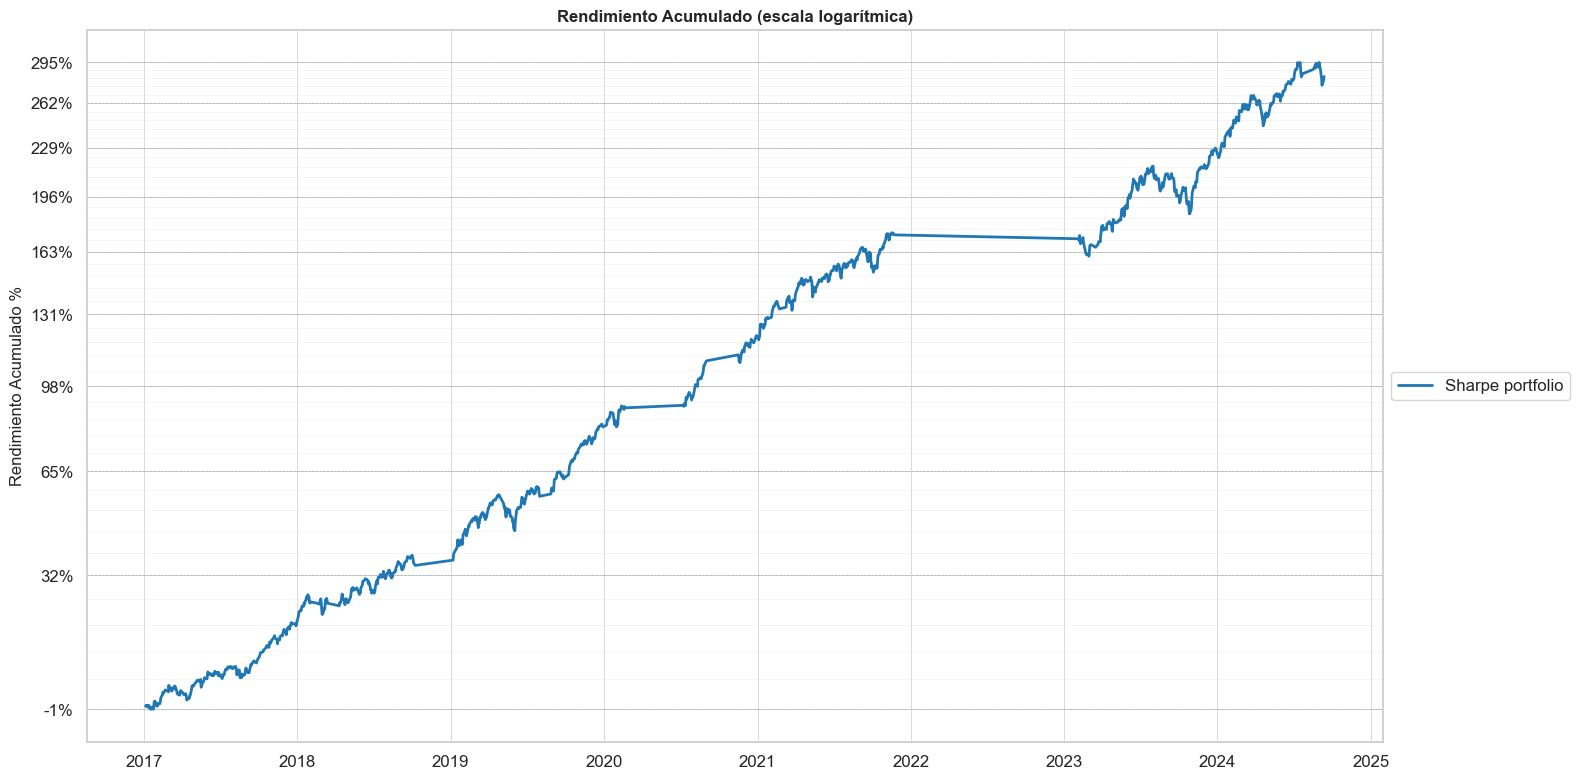

In [ ]:
plot_cumulative_returns2(pd.DataFrame(sharpe_data_lvar, columns=['Sharpe portfolio Low Var']))


In [ ]:
plot_cumulative_returns2(pd.concat([pd.DataFrame(sharpe_data_hvar, columns=['Sharpe_portfolio']), pd.DataFrame(sharpe_data_lvar, columns=['Sharpe_portfolio_With_Cripto'])], axis=1).fillna(0))

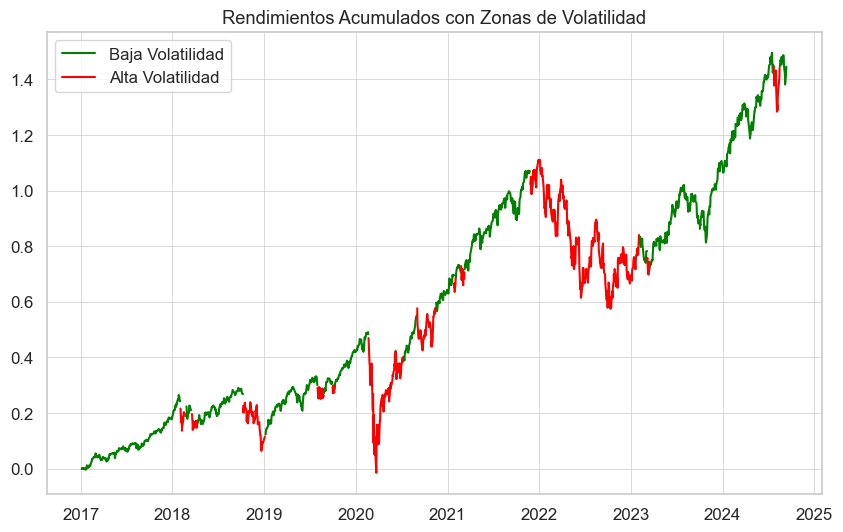

In [ ]:
    #! Funcionan con rendimientos
markov_cumrends_plot_line(data_r, column=column, order=1, trend='n')

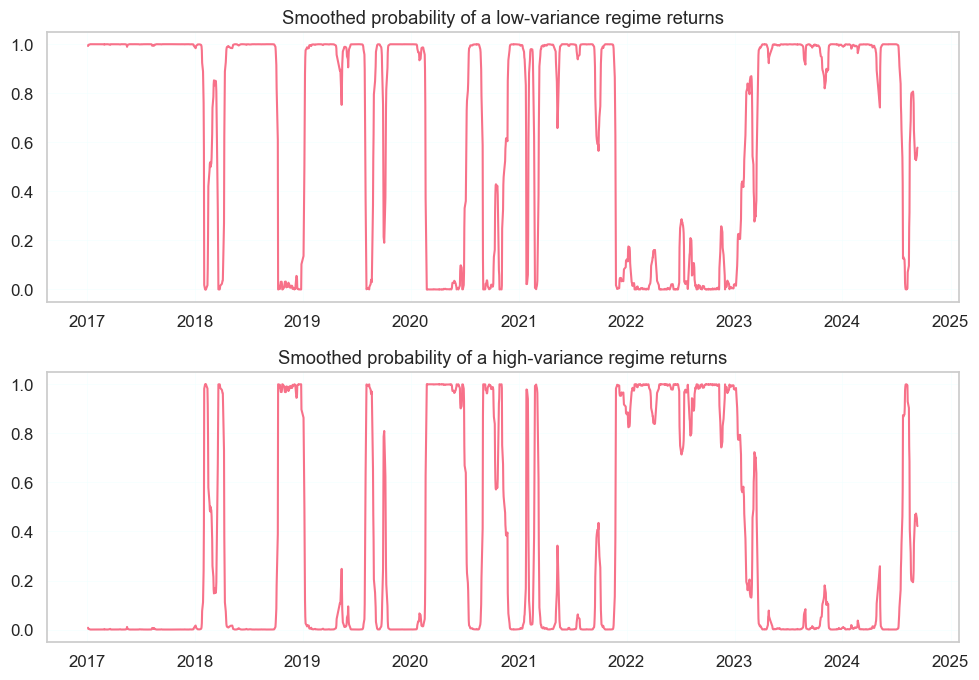

In [ ]:
    #! Funcionan con rendimientos
markov_prob_plot(data_r,column=column, order=1, trend='n')